In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
'''
class2 = gwls[['D4N0687','D4N0130']]

  
pima1 = gwls['precip_trend']
pima1= pima1.interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

ax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True, marker="o")
ax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color='blue') #precip_trend

ax1.set_ylim(-30,1)
ax2.set_ylim(0,600) #(0, 600) for precip_trend and (0,5) for discharge



ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={'size': 16});
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={'size': 16});

ax1.set_title('Groundwater levels vs Discharge',fontsize=20) #'Groundwater levels vs precip_trend'
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Groundwater level (m)',fontsize=20)
ax2.set_ylabel('Discharge (cumecs)',fontsize=20) #Discharge #precip_trend (mm)
'''

'\nclass2 = gwls[[\'D4N0687\',\'D4N0130\']]\n\n  \npima1 = gwls[\'precip_trend\']\npima1= pima1.interpolate(limit_direction=\'both\', method=\'time\').mask(pima.bfill().isna())\n\nax1 = class2.plot(figsize=(20,10), linewidth=1, fontsize = 20, grid=True, marker="o")\nax2 = pima1.plot(secondary_y=True, legend=True, linewidth=1, marker="o", grid=True, color=\'blue\') #precip_trend\n\nax1.set_ylim(-30,1)\nax2.set_ylim(0,600) #(0, 600) for precip_trend and (0,5) for discharge\n\n\n\nax1.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.12),ncol=12, prop={\'size\': 16});\nax2.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.20),ncol=12, prop={\'size\': 16});\n\nax1.set_title(\'Groundwater levels vs Discharge\',fontsize=20) #\'Groundwater levels vs precip_trend\'\nax1.set_xlabel(\'Year\',fontsize=20)\nax1.set_ylabel(\'Groundwater level (m)\',fontsize=20)\nax2.set_ylabel(\'Discharge (cumecs)\',fontsize=20) #Discharge #precip_trend (mm)\n'

In [3]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)


v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [4]:
df['Abstraction'] = w['Usage']
df['D4N0834'] = w[' D4N0834']
df['D4N0130'] = w[' D4N0130']
df['2525DD00044'] = w[' 2525DD00044']
df['D4N0687'] = w[' D4N0687']
df['D4N0832'] = w[' D4N0832']
df['D4N0835'] = w[' D4N0835']

In [5]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0834  D4N0130  \
year_month                                                            
1950-01-01                NaN                 NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN   
...                       ...                 ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN   

            2525DD00044  D4N0687  D4N0832  D4N0835  
year_month                                          
1950-01-01          NaN      NaN      NaN      NaN  
1950-02-01          NaN      NaN      NaN      NaN  
1950-03-01          NaN      NaN      NaN      NaN  
1950-04-01          NaN      NaN      NaN      NaN  
1950-05-01          NaN      NaN      NaN      NaN  
...                 ...      ...      ...      ...  
2019-08-0

In [6]:
df = df[['D4N0834', 'D4N0832' ,'D4N0835' ,'D4N0687','D4N0130','2525DD00044' ,'Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [7]:
df

D4N0834  D4N0832  D4N0835  D4N0687  D4N0130  2525DD00044  \
year_month                                                             
1950-01-01      NaN      NaN      NaN      NaN      NaN          NaN   
1950-02-01      NaN      NaN      NaN      NaN      NaN          NaN   
1950-03-01      NaN      NaN      NaN      NaN      NaN          NaN   
1950-04-01      NaN      NaN      NaN      NaN      NaN          NaN   
1950-05-01      NaN      NaN      NaN      NaN      NaN          NaN   
...             ...      ...      ...      ...      ...          ...   
2019-08-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-09-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-10-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01      NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01      NaN      NaN      NaN      NaN      NaN          NaN   

            Temperature  precip_trend  Discharge  Abstraction  
year_month                                                     
1950-01-01        23.90           NaN        NaN          NaN  
1950-02-01        25.10           NaN        NaN          NaN  
1950-03-01        23.75           NaN        NaN          NaN  
1950-04-01        19.65           NaN        NaN          NaN  
1950-05-01        14.60           NaN        NaN          NaN  
...                 ...           ...        ...          ...  
2019-08-01          NaN           NaN        NaN          NaN  
2019-09-01          NaN           NaN        NaN          NaN  
2019-10-01          NaN           NaN        NaN          NaN  
2019-11-01          NaN           NaN        NaN          NaN  
2019-12-01          NaN           NaN        NaN          NaN  

[840 rows x 10 columns]

In [8]:
f = lambda x: -x; 
gwls = df[['D4N0834', 'D4N0832' ,'D4N0835' ,'D4N0687','D4N0130','2525DD00044']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [9]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0834    D4N0832    D4N0835    D4N0687    D4N0130 2525DD00044
0 1986-09-01 1986-09-01 1986-09-01 1985-03-01 1976-04-01  1975-08-01
1 2005-01-01 2004-03-01 2005-01-01 2012-01-01 2002-12-01  2016-05-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [10]:

gwls = gwls[gwls.index > '1975-09-01']  
gwls = gwls[gwls.index < '2012-05-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

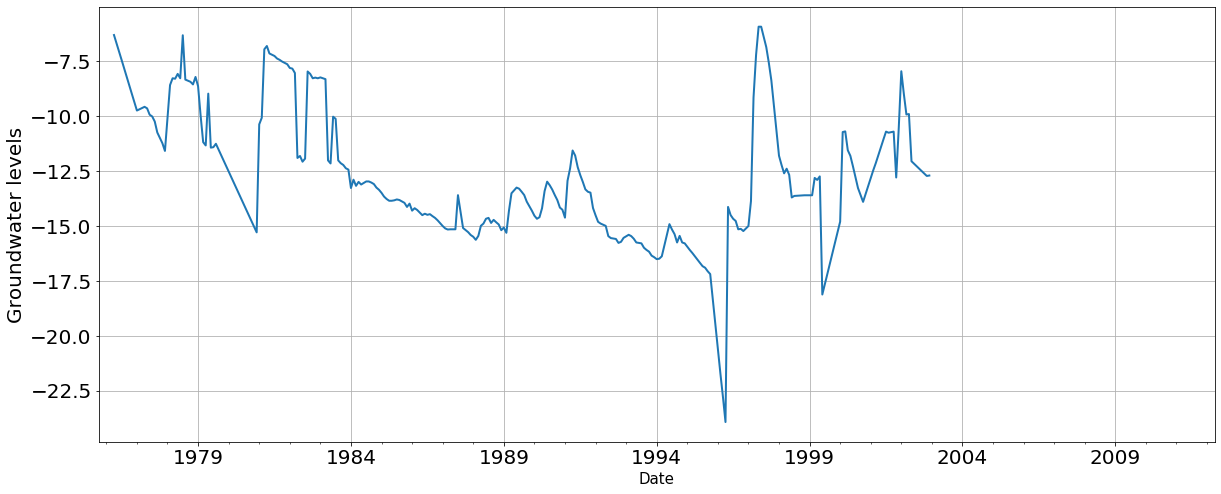

In [11]:
#visual illustration just to show all groundwater levels 

gwls['D4N0130'].plot(figsize=(20,8), linewidth=3, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [12]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0834  D4N0832  D4N0835   D4N0687  D4N0130  2525DD00044  \
year_month                                                              
1975-10-01      NaN      NaN      NaN       NaN      NaN    -1.830000   
1975-11-01      NaN      NaN      NaN       NaN      NaN    -1.820000   
1975-12-01      NaN      NaN      NaN       NaN      NaN    -1.830000   
1976-01-01      NaN      NaN      NaN       NaN      NaN    -2.140000   
1976-02-01      NaN      NaN      NaN       NaN      NaN    -1.960000   
...             ...      ...      ...       ...      ...          ...   
2011-12-01      NaN      NaN      NaN -1.590984      NaN   -12.825870   
2012-01-01      NaN      NaN      NaN -1.530000      NaN   -12.590000   
2012-02-01      NaN      NaN      NaN       NaN      NaN   -12.510000   
2012-03-01      NaN      NaN      NaN       NaN      NaN   -12.456833   
2012-04-01      NaN      NaN      NaN       NaN      NaN   -12.400000   

            Temperature  precip_trend  Discharge   Abstraction  
year_month                                                      
1975-10-01        21.10     92.108333      0.608  1.665429e+05  
1975-11-01        23.15     92.400000      0.537  1.665429e+05  
1975-12-01        22.70     92.108333      0.408  1.665429e+05  
1976-01-01        22.15     91.587500      0.579  3.271530e+05  
1976-02-01        22.05     91.691667      0.665  3.271530e+05  
...                 ...           ...        ...           ...  
2011-12-01        22.00     35.783333      0.629  2.424806e+06  
2012-01-01        23.35     34.008333      0.612  2.417254e+06  
2012-02-01        22.70     33.908333      0.588  2.417254e+06  
2012-03-01        20.60     34.675000      0.552  2.417254e+06  
2012-04-01        16.55     36.816667      0.542  2.417254e+06  

[439 rows x 10 columns]

Text(0, 0.5, 'Groundwater levels')

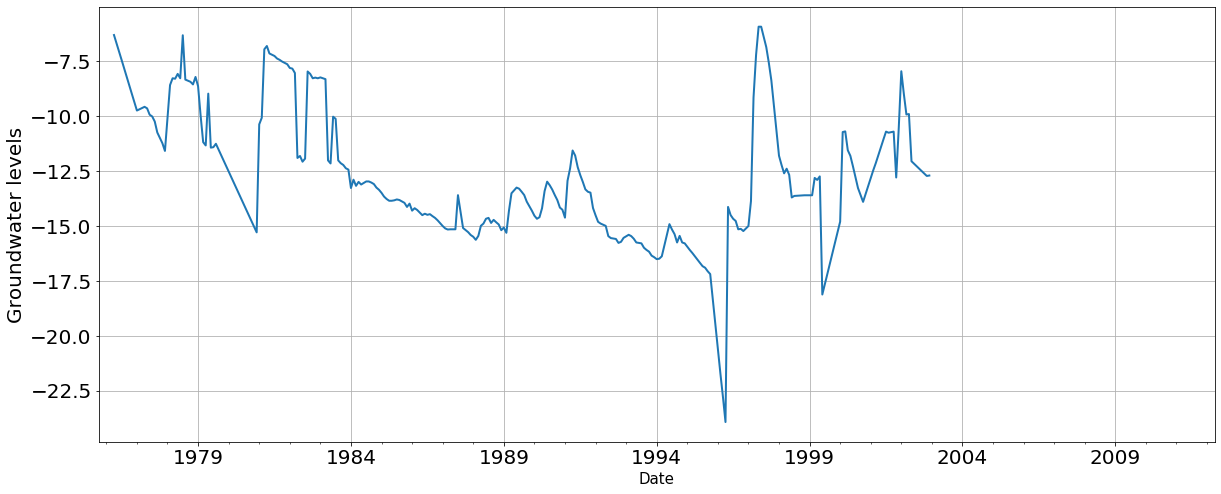

In [13]:

gwls['D4N0130'].plot(figsize=(20,8), linewidth=3, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)

### Reframing length of dataset based on bhid D4N0037 start and end dates 

In [14]:
pima = gwls.filter(['D4N0130', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1976-05-01']  
pima = pima[pima.index < '2002-12-01'] 

In [15]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0130          0
Temperature     13
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [16]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [17]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0130 Temperature precip_trend  Discharge Abstraction
0 1976-06-01  1976-06-01   1976-06-01 1976-06-01  1976-06-01
1 2002-11-01  2002-11-01   2002-11-01 2002-11-01  2002-11-01

### Mutual information stats

In [18]:
from sklearn.feature_selection import mutual_info_regression

In [19]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0130']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [20]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.042582
precip_trend    0.347826
Discharge       0.733212
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [21]:
precip037  = pima.filter(['D4N0130', 'precip_trend'])
discha037  = pima.filter(['D4N0130', 'Discharge'])
temp037    = pima.filter(['D4N0130', 'Temperature'])
abstr037   = pima.filter(['D4N0130', 'Abstraction'])

In [22]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0037 = precip037.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip037[[ 'precip_trend']].shift(t) for t in lags for col in precip037})
# disharge
discha0037 = discha037.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha037[[ 'Discharge']].shift(t) for t in lags for col in discha037})
# temperature
temp0037 = temp037.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp037[[ 'Temperature']].shift(t) for t in lags for col in temp037})
# abstraction
abstr0037 = abstr037.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr037[[ 'Abstraction']].shift(t) for t in lags for col in abstr037})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

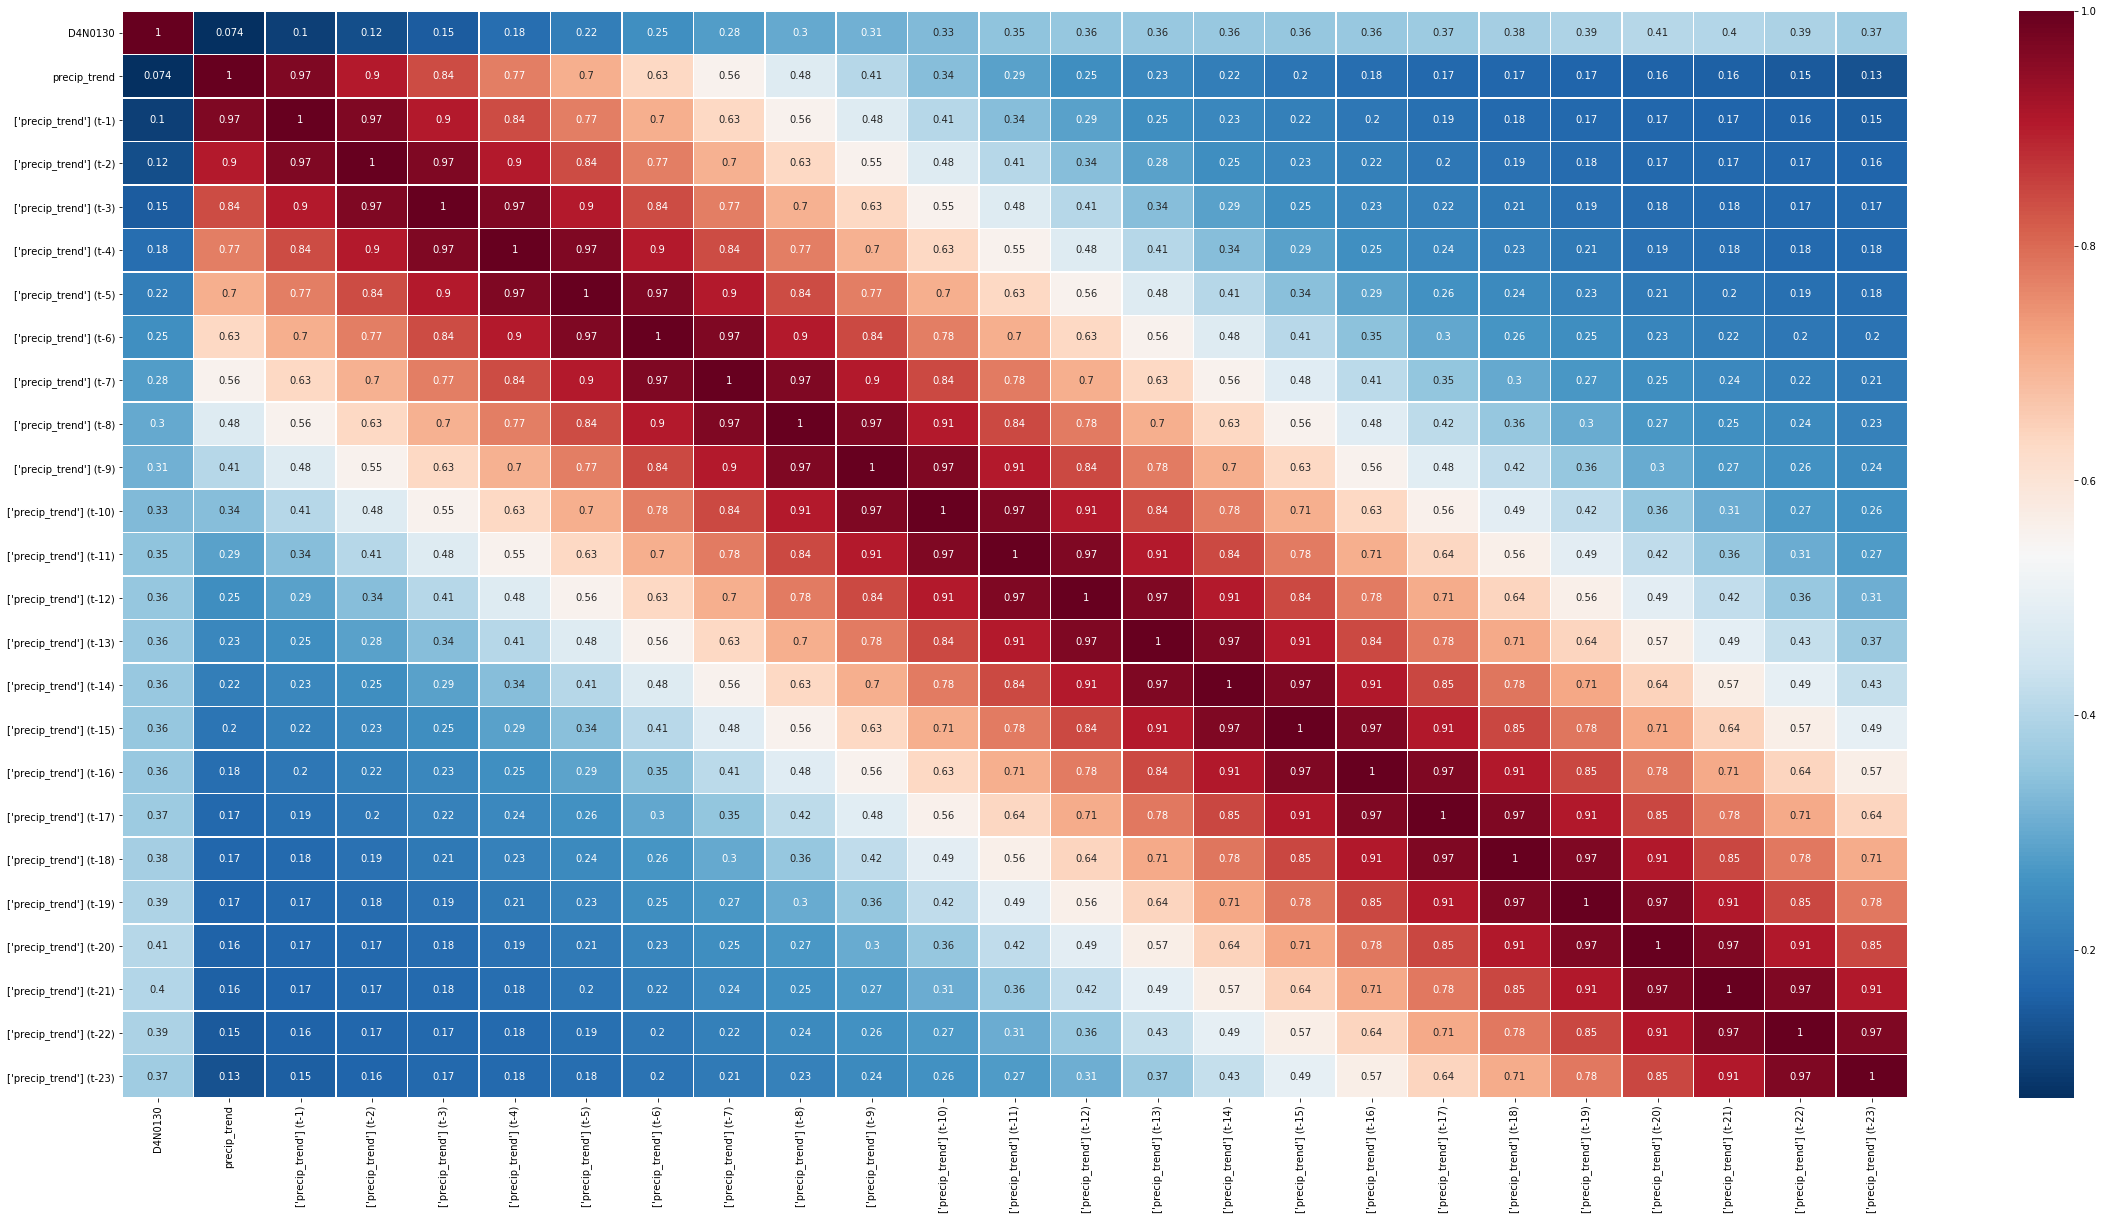

In [23]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0037.corr(method = 'spearman')
corrm2 = precip0037.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Discharge

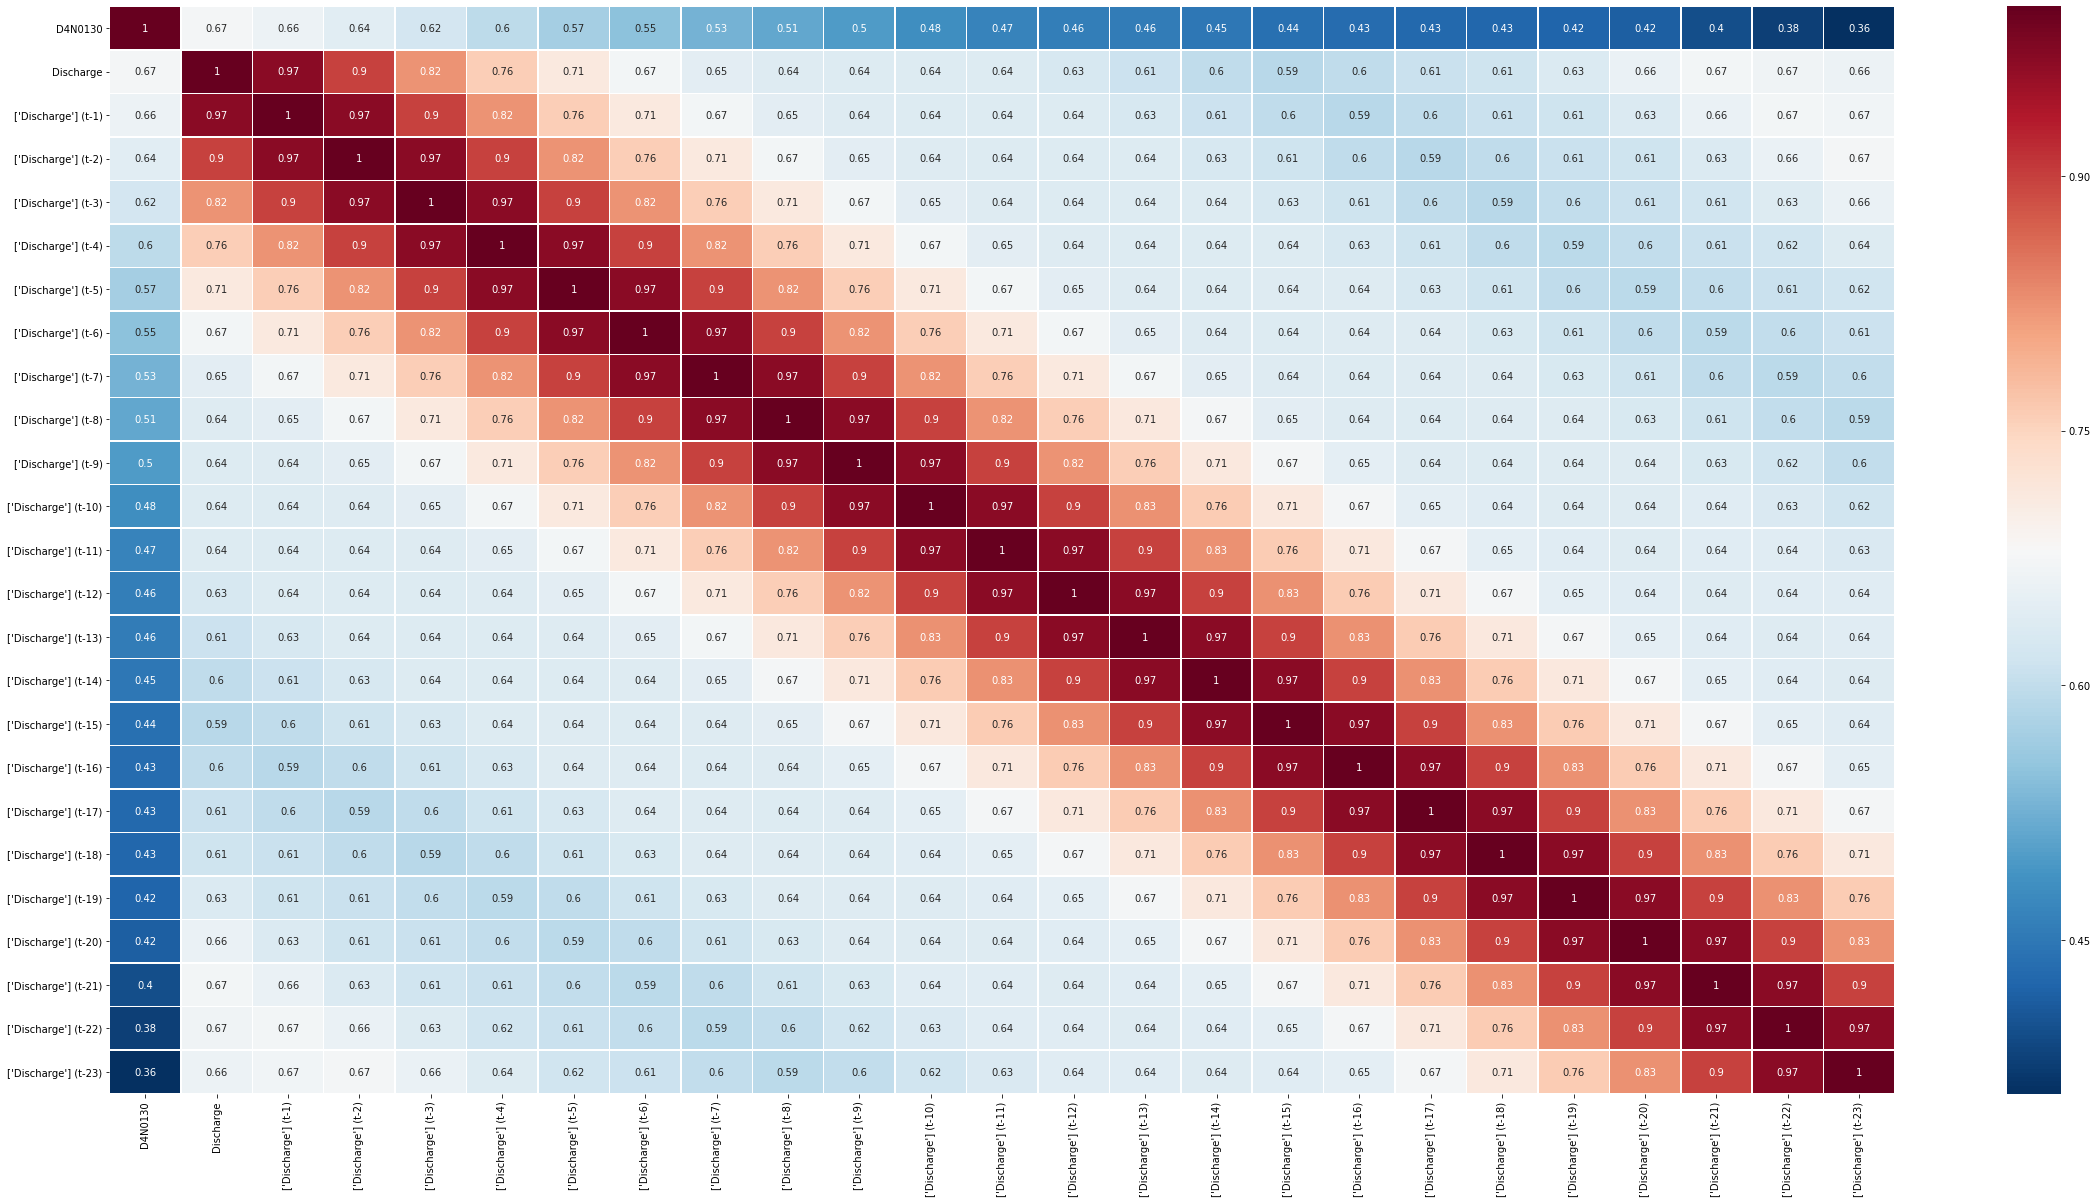

In [24]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = discha0037.corr(method = 'spearman')
corrm2 = discha0037.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

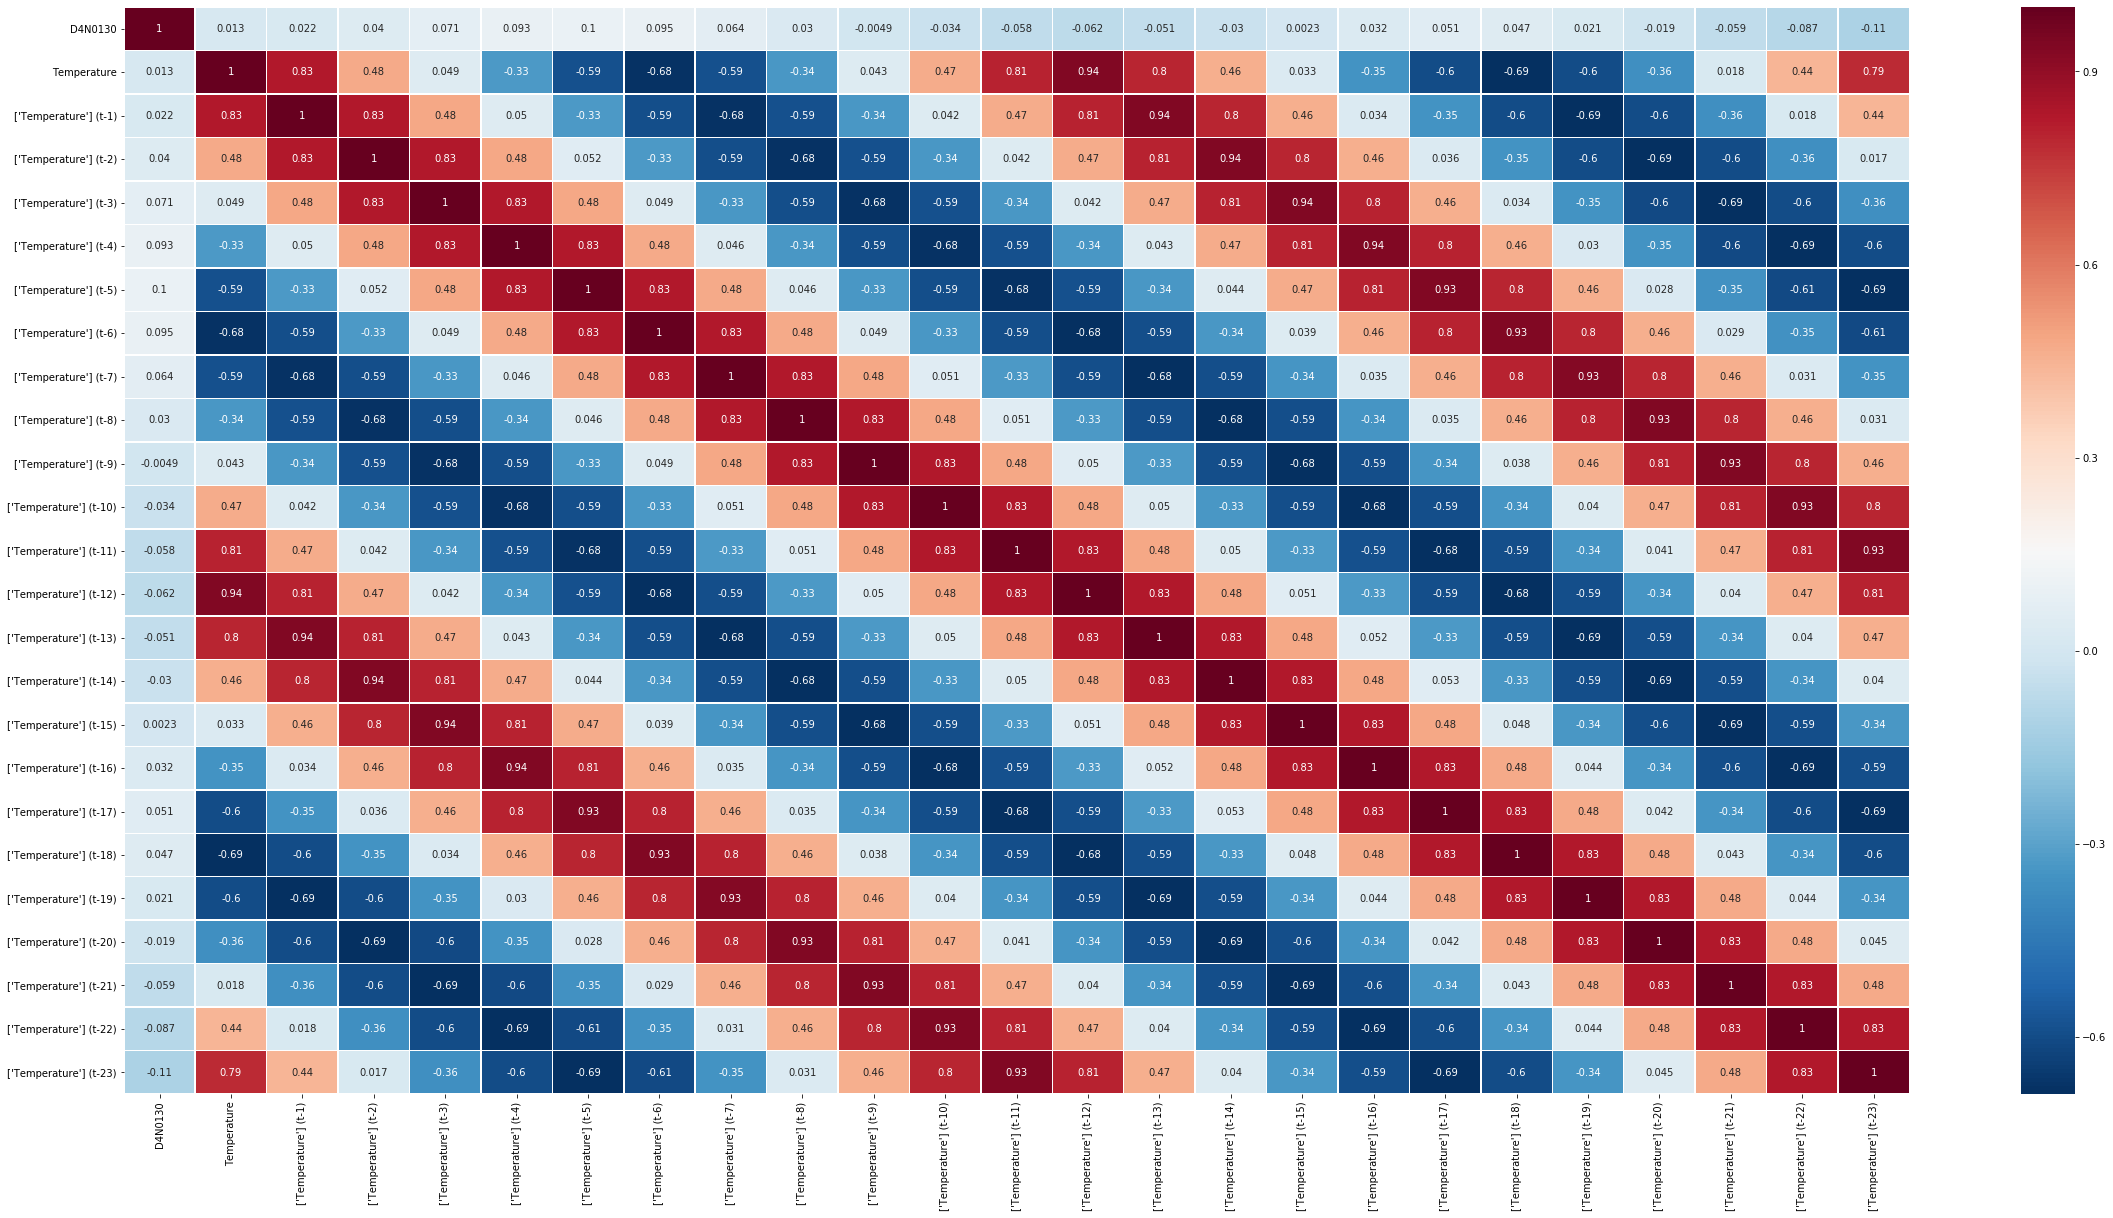

In [25]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0037.corr(method = 'spearman')
corrm2 = temp0037.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [26]:
#pima=pima.drop(['Temperature (t-4)'], axis=1)
#pima=pima.drop(['precip_trend (t-3)'], axis=1)
#pima

In [27]:
pima['Temperature (t-3)'] = pima.Temperature.shift(7)
pima['precip_trend (t-3)'] = pima.precip_trend.shift(3)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0130  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                 
1976-06-01  -7.063055        11.95     76.854167      2.038     327153.0   
1976-07-01  -7.438327        12.25     68.283333      1.876     327153.0   
1976-08-01  -7.826109        14.30     62.845833      1.637     327153.0   
1976-09-01  -8.213891        19.15     55.791667      1.531     327153.0   
1976-10-01  -8.589164        20.60     51.279167      1.389     327153.0   
...               ...          ...           ...        ...          ...   
2002-07-01 -12.272120        10.05     34.441667      0.514    2568580.0   
2002-08-01 -12.385000        14.50     39.850000      0.510    2568580.0   
2002-09-01 -12.497880        16.50     41.625000      0.509    2568580.0   
2002-10-01 -12.607120        20.10     40.700000      0.501    2568580.0   
2002-11-01 -12.720000        20.20     36.725000      0.471    2568580.0   

            Temperature (t-3)  precip_trend (t-3)  
year_month                                         
1976-06-01                NaN                 NaN  
1976-07-01                NaN                 NaN  
1976-08-01                NaN                 NaN  
1976-09-01                NaN           76.854167  
1976-10-01                NaN           68.283333  
...                       ...                 ...  
2002-07-01              20.95           39.583333  
2002-08-01              22.15           34.383333  
2002-09-01              21.35           32.116667  
2002-10-01              20.75           34.441667  
2002-11-01              18.75           39.850000  

[318 rows x 7 columns]

In [28]:
X = pima[['Temperature (t-3)', 'precip_trend (t-3)', 'Discharge','Abstraction', 'D4N0130']] # Features
y = pima[['D4N0130']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [29]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [30]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.011150
precip_trend (t-3)    0.064544
Discharge             0.192643
Abstraction           0.262494
D4N0130               1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [32]:
rainfall = X['precip_trend (t-3)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0130']

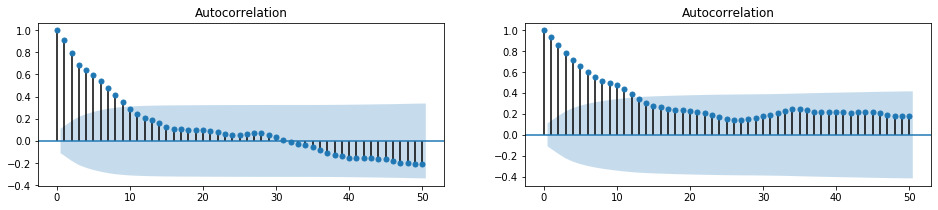

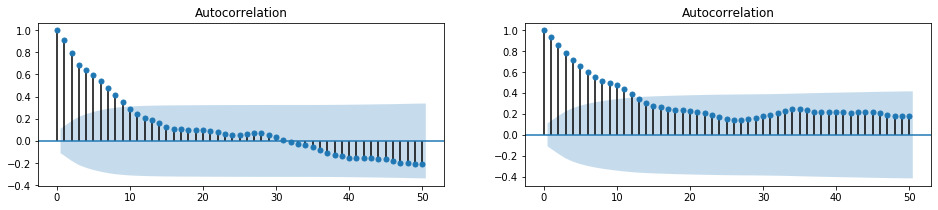

In [33]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

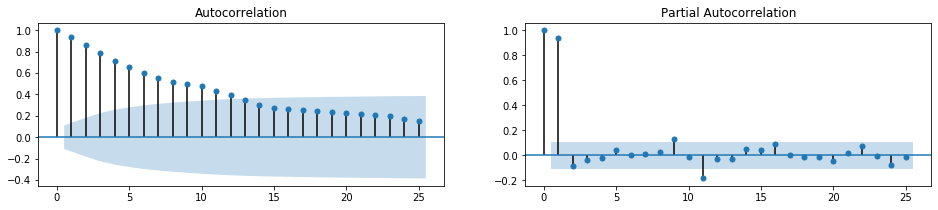

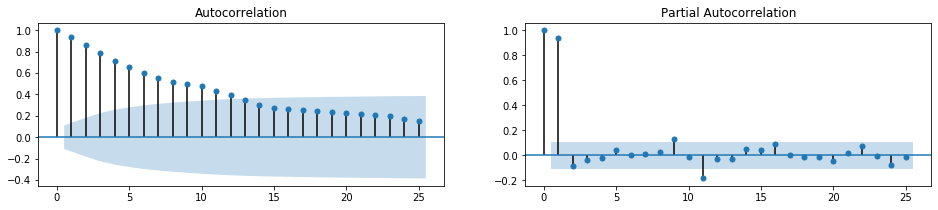

In [34]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

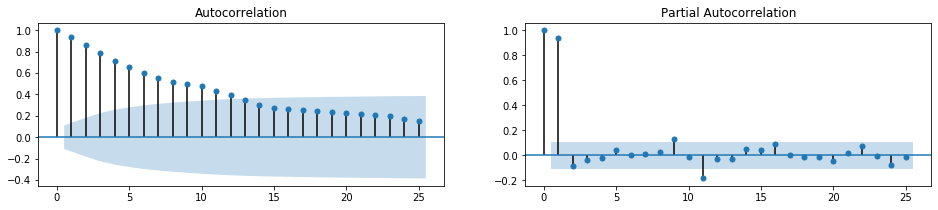

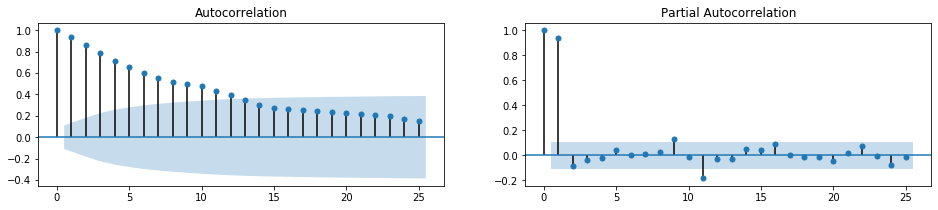

In [35]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

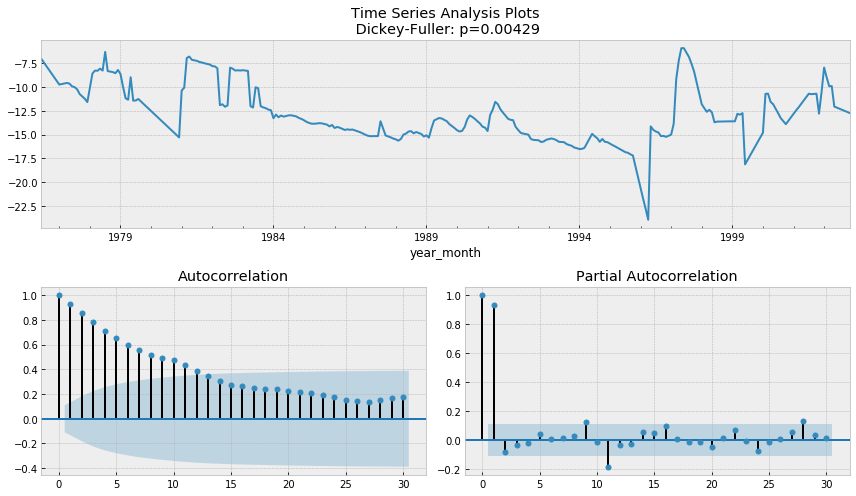

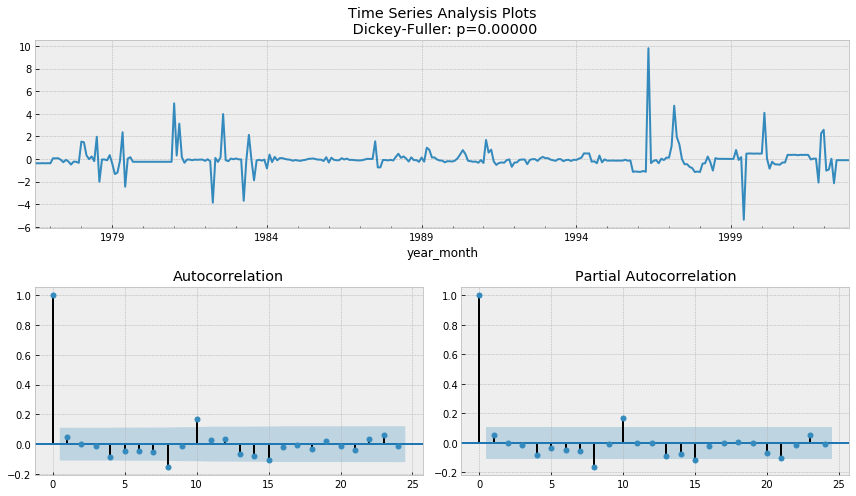

In [36]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0037_diff = bhid - bhid.shift(1)

tsplot(D4N0037_diff[1:], lags=24)

#### Rainfall

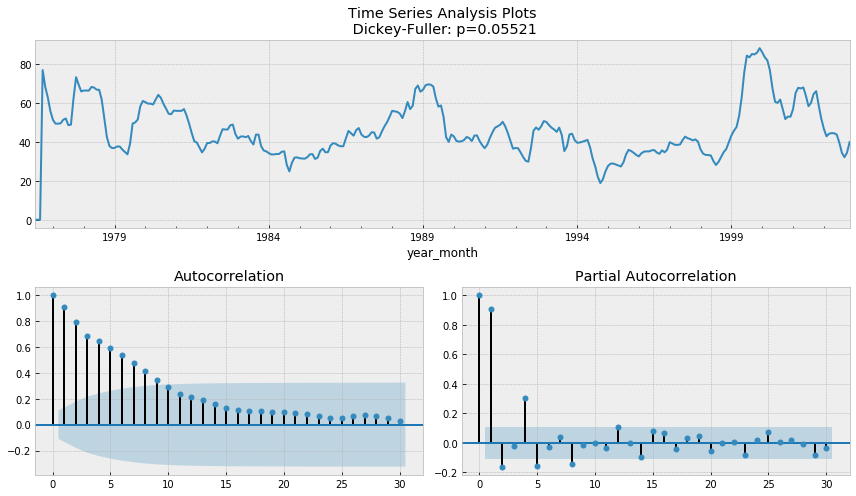

In [37]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

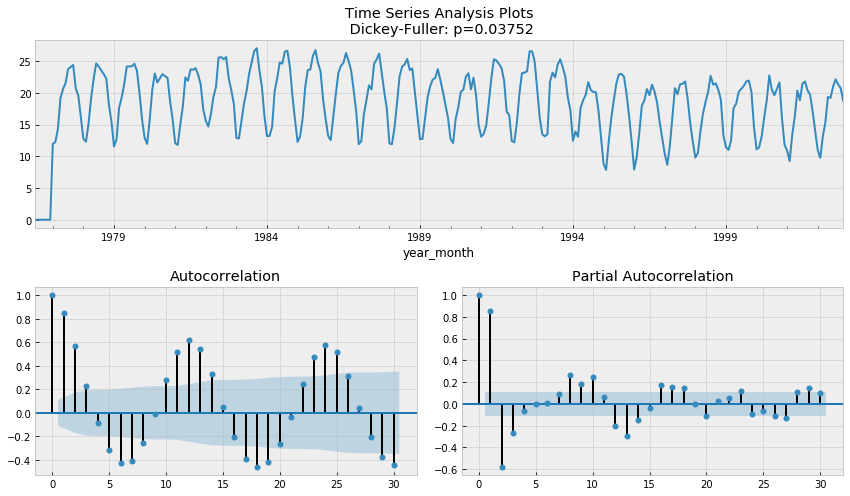

In [38]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)


#### Discharge

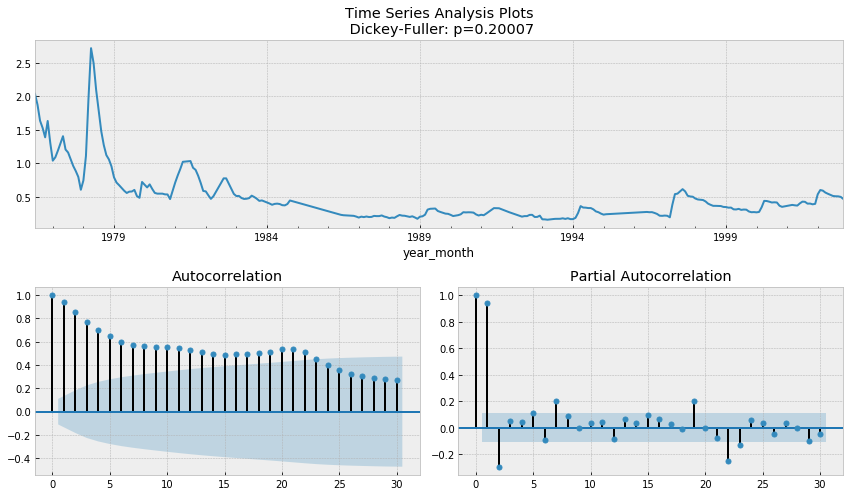

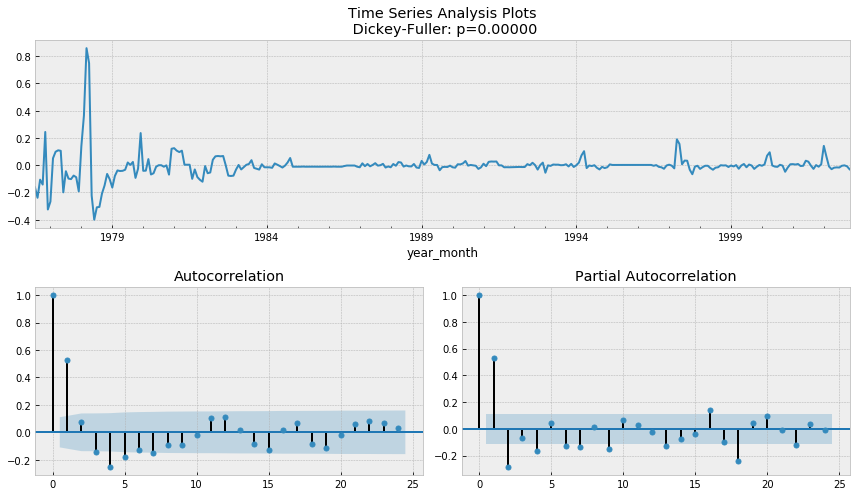

In [39]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

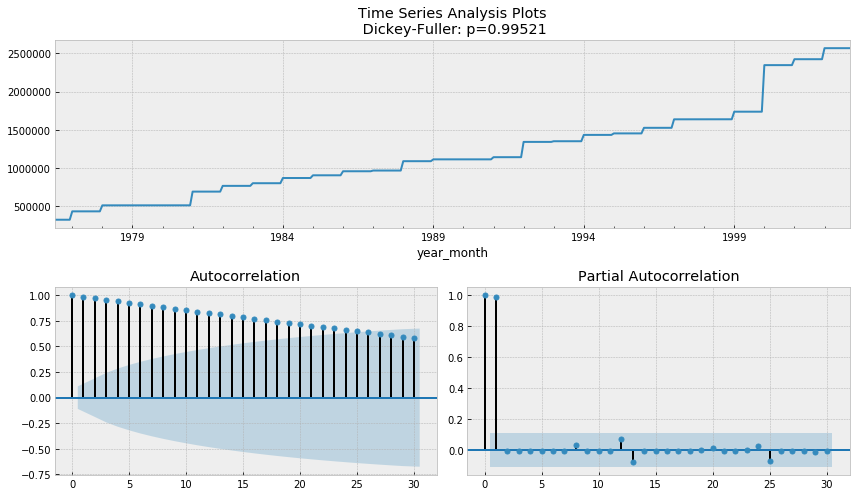

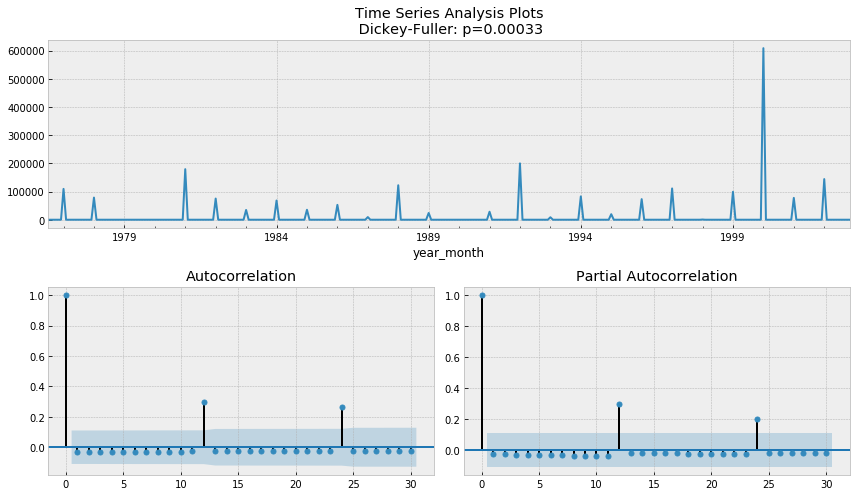

In [40]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [41]:
pima_diff = pd.DataFrame({'D4N0037': D4N0037_diff ,'Temperature': temperature,  'Rainfall': rainfall,  'Discharge': dis_diff, 'Abstraction': usage_diff}, columns=['D4N0037','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0037           1
Temperature       0
precip_trend    318
Discharge         1
Abstraction       1
dtype: int64

In [42]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

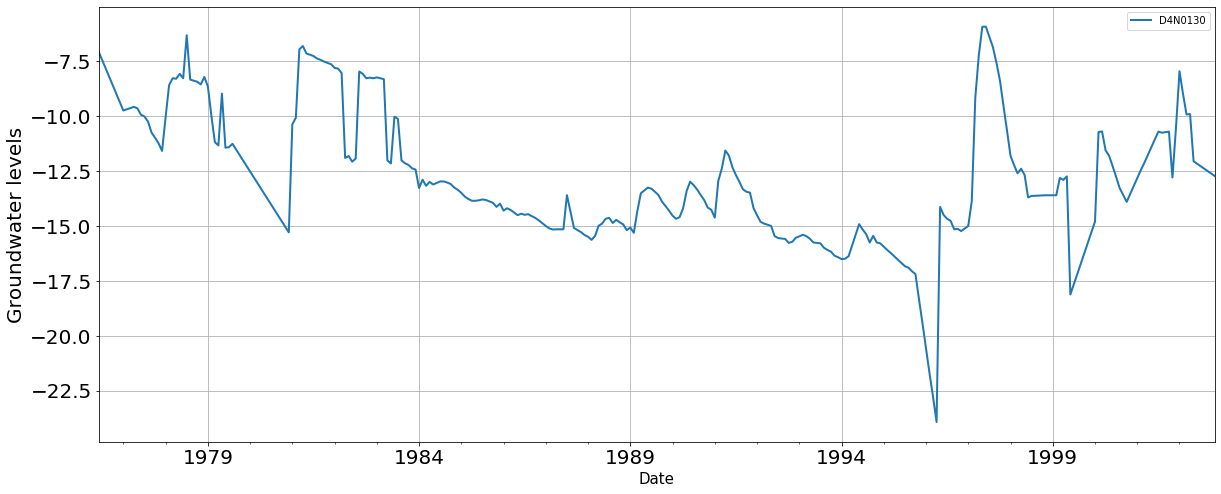

In [43]:
pima[['D4N0130']].plot(figsize=(20,8), linewidth=3, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [44]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-3)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [45]:
pima

D4N0130  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                 
1976-06-01  -7.063055        11.95     76.854167      2.038     327153.0   
1976-07-01  -7.438327        12.25     68.283333      1.876     327153.0   
1976-08-01  -7.826109        14.30     62.845833      1.637     327153.0   
1976-09-01  -8.213891        19.15     55.791667      1.531     327153.0   
1976-10-01  -8.589164        20.60     51.279167      1.389     327153.0   
...               ...          ...           ...        ...          ...   
2002-07-01 -12.272120        10.05     34.441667      0.514    2568580.0   
2002-08-01 -12.385000        14.50     39.850000      0.510    2568580.0   
2002-09-01 -12.497880        16.50     41.625000      0.509    2568580.0   
2002-10-01 -12.607120        20.10     40.700000      0.501    2568580.0   
2002-11-01 -12.720000        20.20     36.725000      0.471    2568580.0   

            Temperature (t-3)  precip_trend (t-3)  precip_trend_log  \
year_month                                                            
1976-06-01                NaN                 NaN               NaN   
1976-07-01                NaN                 NaN               NaN   
1976-08-01                NaN                 NaN               NaN   
1976-09-01                NaN           76.854167          5.354837   
1976-10-01                NaN           68.283333          5.238204   
...                       ...                 ...               ...   
2002-07-01              20.95           39.583333          4.703357   
2002-08-01              22.15           34.383333          4.566241   
2002-09-01              21.35           32.116667          4.500037   
2002-10-01              20.75           34.441667          4.567888   
2002-11-01              18.75           39.850000          4.709907   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1976-06-01              NaN       2.111199        13.698186  
1976-07-01              NaN       2.056400        13.698186  
1976-08-01              NaN       1.969642        13.698186  
1976-09-01              NaN       1.928614        13.698186  
1976-10-01              NaN       1.870875        13.698186  
...                     ...            ...              ...  
2002-07-01         4.088767       1.414755        15.758864  
2002-08-01         4.141995       1.412110        15.758864  
2002-09-01         4.106826       1.411447        15.758864  
2002-10-01         4.079614       1.406132        15.758864  
2002-11-01         3.983153       1.385942        15.758864  

[318 rows x 11 columns]

In [46]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0130.shift(obs)
pima.fillna(0, inplace=True)

In [47]:
pima

D4N0130  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                 
1976-06-01  -7.063055        11.95     76.854167      2.038     327153.0   
1976-07-01  -7.438327        12.25     68.283333      1.876     327153.0   
1976-08-01  -7.826109        14.30     62.845833      1.637     327153.0   
1976-09-01  -8.213891        19.15     55.791667      1.531     327153.0   
1976-10-01  -8.589164        20.60     51.279167      1.389     327153.0   
...               ...          ...           ...        ...          ...   
2002-07-01 -12.272120        10.05     34.441667      0.514    2568580.0   
2002-08-01 -12.385000        14.50     39.850000      0.510    2568580.0   
2002-09-01 -12.497880        16.50     41.625000      0.509    2568580.0   
2002-10-01 -12.607120        20.10     40.700000      0.501    2568580.0   
2002-11-01 -12.720000        20.20     36.725000      0.471    2568580.0   

            Temperature (t-3)  precip_trend (t-3)  precip_trend_log  \
year_month                                                            
1976-06-01               0.00            0.000000          0.000000   
1976-07-01               0.00            0.000000          0.000000   
1976-08-01               0.00            0.000000          0.000000   
1976-09-01               0.00           76.854167          5.354837   
1976-10-01               0.00           68.283333          5.238204   
...                       ...                 ...               ...   
2002-07-01              20.95           39.583333          4.703357   
2002-08-01              22.15           34.383333          4.566241   
2002-09-01              21.35           32.116667          4.500037   
2002-10-01              20.75           34.441667          4.567888   
2002-11-01              18.75           39.850000          4.709907   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1976-06-01         0.000000       2.111199        13.698186   0.000000   
1976-07-01         0.000000       2.056400        13.698186  -7.063055   
1976-08-01         0.000000       1.969642        13.698186  -7.438327   
1976-09-01         0.000000       1.928614        13.698186  -7.826109   
1976-10-01         0.000000       1.870875        13.698186  -8.213891   
...                     ...            ...              ...        ...   
2002-07-01         4.088767       1.414755        15.758864 -12.162880   
2002-08-01         4.141995       1.412110        15.758864 -12.272120   
2002-09-01         4.106826       1.411447        15.758864 -12.385000   
2002-10-01         4.079614       1.406132        15.758864 -12.497880   
2002-11-01         3.983153       1.385942        15.758864 -12.607120   

                  t_2        t_3        t_4  
year_month                                   
1976-06-01   0.000000   0.000000   0.000000  
1976-07-01   0.000000   0.000000   0.000000  
1976-08-01  -7.063055   0.000000   0.000000  
1976-09-01  -7.438327  -7.063055   0.000000  
1976-10-01  -7.826109  -7.438327  -7.063055  
...               ...        ...        ...  
2002-07-01 -12.050000  -9.900000  -9.920000  
2002-08-01 -12.162880 -12.050000  -9.900000  
2002-09-01 -12.272120 -12.162880 -12.050000  
2002-10-01 -12.385000 -12.272120 -12.162880  
2002-11-01 -12.497880 -12.385000 -12.272120  

[318 rows x 15 columns]

In [48]:
pima.shape

(318, 15)

In [49]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0130']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [50]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0130']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.048450
precip_trend_log    0.181388
Discharge_log       0.455678
Abstraction_log     0.607856
t_1                 1.000000
t_2                 0.746800
dtype: float64

In [51]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0130'].values
y = y.reshape(-1,1)

In [52]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(265, 6) (265, 1)
(53, 6) (53, 1)


In [53]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [54]:
y_test[0]

array([-0.25530117])

### LSTM

In [55]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorf

In [56]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(53, 6)
    
    #running function
    gwl = -0.1297075
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)

    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(265, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 265 samples, validate on 53 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/265 [=========>....................] - ETA: 4s - loss: 1.2368 - mean_squared_error: 1.2368
Epoch 00001: val_loss improved from inf to 0.49696, saving model to model.h5
265/265 [==============================] - 3s 12ms/sample - loss: 1.1254 - mean_squared_error: 1.1254 - val_loss: 0.4970 - val_mean_squared_error: 0.4970
Epoch 2/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.9480 - mean_squared_error: 0.9480
Epoch 00002: val_loss improved from 0.49696 to 0.48421, saving model to model.h5
265/265 [==============================] - 0s 272us/sample - loss: 0.9958 - mean_squared_error: 0.9958 - val_loss: 0.4842 - val_mean_squared_error: 0.4842
Epoch 3/1000
 96/265 [=========>....

265/265 [==============================] - 0s 345us/sample - loss: 0.2856 - mean_squared_error: 0.2856 - val_loss: 0.3706 - val_mean_squared_error: 0.3706
Epoch 23/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3622 - mean_squared_error: 0.3622
Epoch 00023: val_loss improved from 0.37065 to 0.35993, saving model to model.h5
265/265 [==============================] - 0s 313us/sample - loss: 0.2766 - mean_squared_error: 0.2766 - val_loss: 0.3599 - val_mean_squared_error: 0.3599
Epoch 24/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2210 - mean_squared_error: 0.2210
Epoch 00024: val_loss improved from 0.35993 to 0.34730, saving model to model.h5
265/265 [==============================] - 0s 327us/sample - loss: 0.2594 - mean_squared_error: 0.2594 - val_loss: 0.3473 - val_mean_squared_error: 0.3473
Epoch 25/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2682 - mean_squared_error: 0.2682
Epoch 00025: val_loss improved from 0.34730 to

 96/265 [=========>....................] - ETA: 0s - loss: 0.1300 - mean_squared_error: 0.1300
Epoch 00046: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 167us/sample - loss: 0.1420 - mean_squared_error: 0.1420 - val_loss: 0.1882 - val_mean_squared_error: 0.1882
Epoch 47/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00047: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 154us/sample - loss: 0.1408 - mean_squared_error: 0.1408 - val_loss: 0.1888 - val_mean_squared_error: 0.1888
Epoch 48/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1966 - mean_squared_error: 0.1966
Epoch 00048: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 129us/sample - loss: 0.1480 - mean_squared_error: 0.1480 - val_loss: 0.1895 - val_mean_squared_error: 0.1895
Epoch 49/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1398 - mean_squared_error: 0.1398
Epoch 00072: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 200us/sample - loss: 0.1174 - mean_squared_error: 0.1174 - val_loss: 0.2485 - val_mean_squared_error: 0.2485
Epoch 73/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 00073: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 129us/sample - loss: 0.1198 - mean_squared_error: 0.1198 - val_loss: 0.2520 - val_mean_squared_error: 0.2520
Epoch 74/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 00074: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 125us/sample - loss: 0.1229 - mean_squared_error: 0.1229 - val_loss: 0.2551 - val_mean_squared_error: 0.2551
Epoch 75/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1328 - mean_squared_error: 0.1328
Epoch 00098: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 124us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.2584 - val_mean_squared_error: 0.2584
Epoch 99/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1438 - mean_squared_error: 0.1438
Epoch 00099: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 142us/sample - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.2573 - val_mean_squared_error: 0.2573
Epoch 100/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 00100: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 119us/sample - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.2572 - val_mean_squared_error: 0.2572
Epoch 101/1000
 96/265 [=========>....................] - ETA: 0s - 

Epoch 124/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 00124: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 140us/sample - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.2422 - val_mean_squared_error: 0.2422
Epoch 125/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 00125: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 151us/sample - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.2427 - val_mean_squared_error: 0.2427
Epoch 126/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0454 - mean_squared_error: 0.0454
Epoch 00126: val_loss did not improve from 0.18798
265/265 [==============================] - 0s 153us/sample - loss: 0.1071 - mean_squared_error: 0.1071 - val_loss: 0.2397 - val_mean_squared_error: 0.2397
Epoch 127/1000
 96/265 [=========>..................

Epoch 5/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.7965 - mean_squared_error: 0.7965
Epoch 00005: val_loss improved from 0.44789 to 0.44101, saving model to model.h5
265/265 [==============================] - 0s 220us/sample - loss: 0.7768 - mean_squared_error: 0.7768 - val_loss: 0.4410 - val_mean_squared_error: 0.4410
Epoch 6/1000
 96/265 [=========>....................] - ETA: 0s - loss: 1.0093 - mean_squared_error: 1.0093
Epoch 00006: val_loss improved from 0.44101 to 0.43549, saving model to model.h5
265/265 [==============================] - 0s 169us/sample - loss: 0.7159 - mean_squared_error: 0.7159 - val_loss: 0.4355 - val_mean_squared_error: 0.4355
Epoch 7/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.6071 - mean_squared_error: 0.6071
Epoch 00007: val_loss improved from 0.43549 to 0.42957, saving model to model.h5
265/265 [==============================] - 0s 183us/sample - loss: 0.6699 - mean_squared_error: 0.6699 - val_loss: 0.4296 -

Epoch 29/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2592 - mean_squared_error: 0.2592
Epoch 00029: val_loss improved from 0.31470 to 0.30211, saving model to model.h5
265/265 [==============================] - 0s 187us/sample - loss: 0.2213 - mean_squared_error: 0.2213 - val_loss: 0.3021 - val_mean_squared_error: 0.3021
Epoch 30/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2473 - mean_squared_error: 0.2473
Epoch 00030: val_loss improved from 0.30211 to 0.29013, saving model to model.h5
265/265 [==============================] - 0s 660us/sample - loss: 0.2048 - mean_squared_error: 0.2048 - val_loss: 0.2901 - val_mean_squared_error: 0.2901
Epoch 31/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1580 - mean_squared_error: 0.1580
Epoch 00031: val_loss improved from 0.29013 to 0.27694, saving model to model.h5
265/265 [==============================] - 0s 269us/sample - loss: 0.2081 - mean_squared_error: 0.2081 - val_loss: 0.276

 96/265 [=========>....................] - ETA: 0s - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 00053: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 130us/sample - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.1927 - val_mean_squared_error: 0.1927
Epoch 54/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1496 - mean_squared_error: 0.1496
Epoch 00054: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 116us/sample - loss: 0.1325 - mean_squared_error: 0.1325 - val_loss: 0.1937 - val_mean_squared_error: 0.1937
Epoch 55/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1171 - mean_squared_error: 0.1171
Epoch 00055: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 123us/sample - loss: 0.1417 - mean_squared_error: 0.1417 - val_loss: 0.1966 - val_mean_squared_error: 0.1966
Epoch 56/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0906 - mean_squared_error: 0.0906
Epoch 00079: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 139us/sample - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 0.2403 - val_mean_squared_error: 0.2403
Epoch 80/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0863 - mean_squared_error: 0.0863
Epoch 00080: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 131us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.2432 - val_mean_squared_error: 0.2432
Epoch 81/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 00081: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 143us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.2425 - val_mean_squared_error: 0.2425
Epoch 82/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1347 - mean_squared_error: 0.1347
Epoch 00105: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 225us/sample - loss: 0.1134 - mean_squared_error: 0.1134 - val_loss: 0.2371 - val_mean_squared_error: 0.2371
Epoch 106/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1276 - mean_squared_error: 0.1276
Epoch 00106: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 243us/sample - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.2388 - val_mean_squared_error: 0.2388
Epoch 107/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1408 - mean_squared_error: 0.1408
Epoch 00107: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 204us/sample - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.2371 - val_mean_squared_error: 0.2371
Epoch 108/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 131/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0885 - mean_squared_error: 0.0885
Epoch 00131: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 134us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.2211 - val_mean_squared_error: 0.2211
Epoch 132/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00132: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 125us/sample - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.2231 - val_mean_squared_error: 0.2231
Epoch 133/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 00133: val_loss did not improve from 0.18485
265/265 [==============================] - 0s 141us/sample - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.2192 - val_mean_squared_error: 0.2192
Epoch 134/1000
 96/265 [=========>..................

 96/265 [=========>....................] - ETA: 0s - loss: 0.4718 - mean_squared_error: 0.4718
Epoch 00009: val_loss improved from 0.34040 to 0.33494, saving model to model.h5
265/265 [==============================] - 0s 163us/sample - loss: 0.4467 - mean_squared_error: 0.4467 - val_loss: 0.3349 - val_mean_squared_error: 0.3349
Epoch 10/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3681 - mean_squared_error: 0.3681
Epoch 00010: val_loss improved from 0.33494 to 0.32977, saving model to model.h5
265/265 [==============================] - 0s 167us/sample - loss: 0.4272 - mean_squared_error: 0.4272 - val_loss: 0.3298 - val_mean_squared_error: 0.3298
Epoch 11/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3528 - mean_squared_error: 0.3528
Epoch 00011: val_loss improved from 0.32977 to 0.32512, saving model to model.h5
265/265 [==============================] - 0s 163us/sample - loss: 0.3851 - mean_squared_error: 0.3851 - val_loss: 0.3251 - val_mean_s

Epoch 33/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1484 - mean_squared_error: 0.1484
Epoch 00033: val_loss improved from 0.19843 to 0.19452, saving model to model.h5
265/265 [==============================] - 0s 174us/sample - loss: 0.1532 - mean_squared_error: 0.1532 - val_loss: 0.1945 - val_mean_squared_error: 0.1945
Epoch 34/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1629 - mean_squared_error: 0.1629
Epoch 00034: val_loss improved from 0.19452 to 0.19071, saving model to model.h5
265/265 [==============================] - 0s 226us/sample - loss: 0.1561 - mean_squared_error: 0.1561 - val_loss: 0.1907 - val_mean_squared_error: 0.1907
Epoch 35/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1422 - mean_squared_error: 0.1422
Epoch 00035: val_loss improved from 0.19071 to 0.18802, saving model to model.h5
265/265 [==============================] - 0s 175us/sample - loss: 0.1586 - mean_squared_error: 0.1586 - val_loss: 0.188

Epoch 59/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1109 - mean_squared_error: 0.1109
Epoch 00059: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 145us/sample - loss: 0.1231 - mean_squared_error: 0.1231 - val_loss: 0.2370 - val_mean_squared_error: 0.2370
Epoch 60/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1538 - mean_squared_error: 0.1538
Epoch 00060: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 130us/sample - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.2362 - val_mean_squared_error: 0.2362
Epoch 61/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1494 - mean_squared_error: 0.1494
Epoch 00061: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 189us/sample - loss: 0.1253 - mean_squared_error: 0.1253 - val_loss: 0.2422 - val_mean_squared_error: 0.2422
Epoch 62/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.1470 - mean_squared_error: 0.1470
Epoch 00085: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 205us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.2584 - val_mean_squared_error: 0.2584
Epoch 86/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1171 - mean_squared_error: 0.1171
Epoch 00086: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 250us/sample - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.2565 - val_mean_squared_error: 0.2565
Epoch 87/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 00087: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 166us/sample - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.2580 - val_mean_squared_error: 0.2580
Epoch 88/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 00111: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 127us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.2407 - val_mean_squared_error: 0.2407
Epoch 112/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0407 - mean_squared_error: 0.0407
Epoch 00112: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 131us/sample - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.2386 - val_mean_squared_error: 0.2386
Epoch 113/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 00113: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 130us/sample - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.2385 - val_mean_squared_error: 0.2385
Epoch 114/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 137/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00137: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 141us/sample - loss: 0.0982 - mean_squared_error: 0.0982 - val_loss: 0.2221 - val_mean_squared_error: 0.2221
Epoch 138/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 00138: val_loss did not improve from 0.18411
265/265 [==============================] - 0s 130us/sample - loss: 0.1016 - mean_squared_error: 0.1016 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Running fold 4
(265, 6)
Train on 265 samples, validate on 53 samples
Epoch 1/1000
 96/265 [=========>....................] - ETA: 4s - loss: 0.9304 - mean_squared_error: 0.9304
Epoch 00001: val_loss improved from inf to 0.40579, saving model to model.h5
265/265 [==============================] - 4s 14ms/sample - loss: 0.9178 - mean_squared_error: 0.9178 - val_loss: 

Epoch 23/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2668 - mean_squared_error: 0.2668
Epoch 00023: val_loss improved from 0.29085 to 0.28217, saving model to model.h5
265/265 [==============================] - 0s 183us/sample - loss: 0.2350 - mean_squared_error: 0.2350 - val_loss: 0.2822 - val_mean_squared_error: 0.2822
Epoch 24/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3162 - mean_squared_error: 0.3162
Epoch 00024: val_loss improved from 0.28217 to 0.27237, saving model to model.h5
265/265 [==============================] - 0s 184us/sample - loss: 0.2233 - mean_squared_error: 0.2233 - val_loss: 0.2724 - val_mean_squared_error: 0.2724
Epoch 25/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2436 - mean_squared_error: 0.2436
Epoch 00025: val_loss improved from 0.27237 to 0.26360, saving model to model.h5
265/265 [==============================] - 0s 181us/sample - loss: 0.2175 - mean_squared_error: 0.2175 - val_loss: 0.263

 96/265 [=========>....................] - ETA: 0s - loss: 0.1307 - mean_squared_error: 0.1307
Epoch 00047: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 115us/sample - loss: 0.1368 - mean_squared_error: 0.1368 - val_loss: 0.1864 - val_mean_squared_error: 0.1864
Epoch 48/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 00048: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 163us/sample - loss: 0.1326 - mean_squared_error: 0.1326 - val_loss: 0.1883 - val_mean_squared_error: 0.1883
Epoch 49/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1423 - mean_squared_error: 0.1423
Epoch 00049: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 109us/sample - loss: 0.1253 - mean_squared_error: 0.1253 - val_loss: 0.1912 - val_mean_squared_error: 0.1912
Epoch 50/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0682 - mean_squared_error: 0.0682
Epoch 00073: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 152us/sample - loss: 0.1143 - mean_squared_error: 0.1143 - val_loss: 0.2429 - val_mean_squared_error: 0.2429
Epoch 74/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 00074: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 184us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.2437 - val_mean_squared_error: 0.2437
Epoch 75/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 00075: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 162us/sample - loss: 0.1163 - mean_squared_error: 0.1163 - val_loss: 0.2441 - val_mean_squared_error: 0.2441
Epoch 76/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0792 - mean_squared_error: 0.0792
Epoch 00099: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 147us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.2466 - val_mean_squared_error: 0.2466
Epoch 100/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 00100: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 160us/sample - loss: 0.1036 - mean_squared_error: 0.1036 - val_loss: 0.2484 - val_mean_squared_error: 0.2484
Epoch 101/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1569 - mean_squared_error: 0.1569
Epoch 00101: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 141us/sample - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.2460 - val_mean_squared_error: 0.2460
Epoch 102/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 125/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 00125: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 212us/sample - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.2339 - val_mean_squared_error: 0.2339
Epoch 126/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 00126: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 296us/sample - loss: 0.1098 - mean_squared_error: 0.1098 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 127/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1467 - mean_squared_error: 0.1467
Epoch 00127: val_loss did not improve from 0.17733
265/265 [==============================] - 0s 211us/sample - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 128/1000
 96/265 [=========>..................

 96/265 [=========>....................] - ETA: 0s - loss: 0.7252 - mean_squared_error: 0.7252
Epoch 00009: val_loss improved from 0.44719 to 0.44406, saving model to model.h5
265/265 [==============================] - 0s 197us/sample - loss: 0.6025 - mean_squared_error: 0.6025 - val_loss: 0.4441 - val_mean_squared_error: 0.4441
Epoch 10/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.6322 - mean_squared_error: 0.6322
Epoch 00010: val_loss improved from 0.44406 to 0.44107, saving model to model.h5
265/265 [==============================] - 0s 176us/sample - loss: 0.5658 - mean_squared_error: 0.5658 - val_loss: 0.4411 - val_mean_squared_error: 0.4411
Epoch 11/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.5870 - mean_squared_error: 0.5870
Epoch 00011: val_loss improved from 0.44107 to 0.43797, saving model to model.h5
265/265 [==============================] - 0s 237us/sample - loss: 0.5407 - mean_squared_error: 0.5407 - val_loss: 0.4380 - val_mean_s

Epoch 33/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 00033: val_loss improved from 0.29643 to 0.28475, saving model to model.h5
265/265 [==============================] - 0s 222us/sample - loss: 0.2180 - mean_squared_error: 0.2180 - val_loss: 0.2847 - val_mean_squared_error: 0.2847
Epoch 34/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2193 - mean_squared_error: 0.2193
Epoch 00034: val_loss improved from 0.28475 to 0.27430, saving model to model.h5
265/265 [==============================] - 0s 180us/sample - loss: 0.2070 - mean_squared_error: 0.2070 - val_loss: 0.2743 - val_mean_squared_error: 0.2743
Epoch 35/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2171 - mean_squared_error: 0.2171
Epoch 00035: val_loss improved from 0.27430 to 0.26416, saving model to model.h5
265/265 [==============================] - 0s 178us/sample - loss: 0.2066 - mean_squared_error: 0.2066 - val_loss: 0.264

 96/265 [=========>....................] - ETA: 0s - loss: 0.1399 - mean_squared_error: 0.1399
Epoch 00057: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 147us/sample - loss: 0.1439 - mean_squared_error: 0.1439 - val_loss: 0.1995 - val_mean_squared_error: 0.1995
Epoch 58/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1536 - mean_squared_error: 0.1536
Epoch 00058: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 119us/sample - loss: 0.1406 - mean_squared_error: 0.1406 - val_loss: 0.2007 - val_mean_squared_error: 0.2007
Epoch 59/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1605 - mean_squared_error: 0.1605
Epoch 00059: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 108us/sample - loss: 0.1435 - mean_squared_error: 0.1435 - val_loss: 0.2027 - val_mean_squared_error: 0.2027
Epoch 60/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0887 - mean_squared_error: 0.0887
Epoch 00083: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 215us/sample - loss: 0.1226 - mean_squared_error: 0.1226 - val_loss: 0.2480 - val_mean_squared_error: 0.2480
Epoch 84/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 00084: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 177us/sample - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.2499 - val_mean_squared_error: 0.2499
Epoch 85/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0816 - mean_squared_error: 0.0816
Epoch 00085: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 166us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.2491 - val_mean_squared_error: 0.2491
Epoch 86/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1816 - mean_squared_error: 0.1816
Epoch 00109: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 120us/sample - loss: 0.1156 - mean_squared_error: 0.1156 - val_loss: 0.2457 - val_mean_squared_error: 0.2457
Epoch 110/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1679 - mean_squared_error: 0.1679
Epoch 00110: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 143us/sample - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.2423 - val_mean_squared_error: 0.2423
Epoch 111/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 00111: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 166us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.2422 - val_mean_squared_error: 0.2422
Epoch 112/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 135/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1335 - mean_squared_error: 0.1335
Epoch 00135: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 136us/sample - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.2271 - val_mean_squared_error: 0.2271
Epoch 136/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 00136: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 119us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.2264 - val_mean_squared_error: 0.2264
Epoch 137/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 00137: val_loss did not improve from 0.19176
265/265 [==============================] - 0s 113us/sample - loss: 0.1072 - mean_squared_error: 0.1072 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 138/1000
 96/265 [=========>..................

Epoch 10/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.4670 - mean_squared_error: 0.4670
Epoch 00010: val_loss improved from 0.47317 to 0.47221, saving model to model.h5
265/265 [==============================] - 0s 213us/sample - loss: 0.5085 - mean_squared_error: 0.5085 - val_loss: 0.4722 - val_mean_squared_error: 0.4722
Epoch 11/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.4101 - mean_squared_error: 0.4101
Epoch 00011: val_loss improved from 0.47221 to 0.47157, saving model to model.h5
265/265 [==============================] - 0s 184us/sample - loss: 0.4703 - mean_squared_error: 0.4703 - val_loss: 0.4716 - val_mean_squared_error: 0.4716
Epoch 12/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.4479 - mean_squared_error: 0.4479
Epoch 00012: val_loss improved from 0.47157 to 0.47063, saving model to model.h5
265/265 [==============================] - 0s 173us/sample - loss: 0.4476 - mean_squared_error: 0.4476 - val_loss: 0.470

Epoch 34/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2050 - mean_squared_error: 0.2050
Epoch 00034: val_loss improved from 0.27755 to 0.26605, saving model to model.h5
265/265 [==============================] - 0s 245us/sample - loss: 0.1810 - mean_squared_error: 0.1810 - val_loss: 0.2661 - val_mean_squared_error: 0.2661
Epoch 35/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1544 - mean_squared_error: 0.1544
Epoch 00035: val_loss improved from 0.26605 to 0.25418, saving model to model.h5
265/265 [==============================] - 0s 248us/sample - loss: 0.1744 - mean_squared_error: 0.1744 - val_loss: 0.2542 - val_mean_squared_error: 0.2542
Epoch 36/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1304 - mean_squared_error: 0.1304
Epoch 00036: val_loss improved from 0.25418 to 0.24403, saving model to model.h5
265/265 [==============================] - 0s 256us/sample - loss: 0.1792 - mean_squared_error: 0.1792 - val_loss: 0.244

Epoch 59/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 00059: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 132us/sample - loss: 0.1304 - mean_squared_error: 0.1304 - val_loss: 0.1904 - val_mean_squared_error: 0.1904
Epoch 60/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 00060: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 130us/sample - loss: 0.1298 - mean_squared_error: 0.1298 - val_loss: 0.1932 - val_mean_squared_error: 0.1932
Epoch 61/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 00061: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 146us/sample - loss: 0.1172 - mean_squared_error: 0.1172 - val_loss: 0.1957 - val_mean_squared_error: 0.1957
Epoch 62/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.1317 - mean_squared_error: 0.1317
Epoch 00085: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 156us/sample - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 86/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1180 - mean_squared_error: 0.1180
Epoch 00086: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 142us/sample - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 87/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 00087: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 124us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2323 - val_mean_squared_error: 0.2323
Epoch 88/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0887 - mean_squared_error: 0.0887
Epoch 00111: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 123us/sample - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.2338 - val_mean_squared_error: 0.2338
Epoch 112/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1363 - mean_squared_error: 0.1363
Epoch 00112: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 120us/sample - loss: 0.1010 - mean_squared_error: 0.1010 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 113/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1049 - mean_squared_error: 0.1049
Epoch 00113: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 129us/sample - loss: 0.0994 - mean_squared_error: 0.0994 - val_loss: 0.2275 - val_mean_squared_error: 0.2275
Epoch 114/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 137/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1537 - mean_squared_error: 0.1537
Epoch 00137: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 124us/sample - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.2158 - val_mean_squared_error: 0.2158
Epoch 138/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 00138: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 122us/sample - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 139/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 00139: val_loss did not improve from 0.17921
265/265 [==============================] - 0s 128us/sample - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.2129 - val_mean_squared_error: 0.2129
Epoch 140/1000
 96/265 [=========>..................

Epoch 13/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.4248 - mean_squared_error: 0.4248
Epoch 00013: val_loss improved from 0.38812 to 0.38353, saving model to model.h5
265/265 [==============================] - 0s 244us/sample - loss: 0.3808 - mean_squared_error: 0.3808 - val_loss: 0.3835 - val_mean_squared_error: 0.3835
Epoch 14/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3543 - mean_squared_error: 0.3543
Epoch 00014: val_loss improved from 0.38353 to 0.37968, saving model to model.h5
265/265 [==============================] - 0s 165us/sample - loss: 0.3596 - mean_squared_error: 0.3596 - val_loss: 0.3797 - val_mean_squared_error: 0.3797
Epoch 15/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3951 - mean_squared_error: 0.3951
Epoch 00015: val_loss improved from 0.37968 to 0.37637, saving model to model.h5
265/265 [==============================] - 0s 188us/sample - loss: 0.3446 - mean_squared_error: 0.3446 - val_loss: 0.376

Epoch 37/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2222 - mean_squared_error: 0.2222
Epoch 00037: val_loss improved from 0.19956 to 0.19597, saving model to model.h5
265/265 [==============================] - 0s 171us/sample - loss: 0.1629 - mean_squared_error: 0.1629 - val_loss: 0.1960 - val_mean_squared_error: 0.1960
Epoch 38/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 00038: val_loss improved from 0.19597 to 0.19268, saving model to model.h5
265/265 [==============================] - 0s 172us/sample - loss: 0.1544 - mean_squared_error: 0.1544 - val_loss: 0.1927 - val_mean_squared_error: 0.1927
Epoch 39/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1166 - mean_squared_error: 0.1166
Epoch 00039: val_loss improved from 0.19268 to 0.19007, saving model to model.h5
265/265 [==============================] - 0s 193us/sample - loss: 0.1539 - mean_squared_error: 0.1539 - val_loss: 0.190

Epoch 63/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0976 - mean_squared_error: 0.0976
Epoch 00063: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 129us/sample - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.2359 - val_mean_squared_error: 0.2359
Epoch 64/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1447 - mean_squared_error: 0.1447
Epoch 00064: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 123us/sample - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.2378 - val_mean_squared_error: 0.2378
Epoch 65/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1886 - mean_squared_error: 0.1886
Epoch 00065: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 164us/sample - loss: 0.1202 - mean_squared_error: 0.1202 - val_loss: 0.2396 - val_mean_squared_error: 0.2396
Epoch 66/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 00089: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 134us/sample - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.2556 - val_mean_squared_error: 0.2556
Epoch 90/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0877 - mean_squared_error: 0.0877
Epoch 00090: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 115us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.2548 - val_mean_squared_error: 0.2548
Epoch 91/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0972 - mean_squared_error: 0.0972
Epoch 00091: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 138us/sample - loss: 0.1192 - mean_squared_error: 0.1192 - val_loss: 0.2576 - val_mean_squared_error: 0.2576
Epoch 92/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1071 - mean_squared_error: 0.1071
Epoch 00115: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 118us/sample - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.2418 - val_mean_squared_error: 0.2418
Epoch 116/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 00116: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 117us/sample - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.2406 - val_mean_squared_error: 0.2406
Epoch 117/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1567 - mean_squared_error: 0.1567
Epoch 00117: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 116us/sample - loss: 0.1107 - mean_squared_error: 0.1107 - val_loss: 0.2379 - val_mean_squared_error: 0.2379
Epoch 118/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 141/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1704 - mean_squared_error: 0.1704
Epoch 00141: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 148us/sample - loss: 0.1064 - mean_squared_error: 0.1064 - val_loss: 0.2210 - val_mean_squared_error: 0.2210
Epoch 142/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0553 - mean_squared_error: 0.0553
Epoch 00142: val_loss did not improve from 0.18697
265/265 [==============================] - 0s 135us/sample - loss: 0.0978 - mean_squared_error: 0.0978 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Running fold 8
(265, 6)
Train on 265 samples, validate on 53 samples
Epoch 1/1000
 96/265 [=========>....................] - ETA: 4s - loss: 0.9443 - mean_squared_error: 0.9443
Epoch 00001: val_loss improved from inf to 0.45327, saving model to model.h5
265/265 [==============================] - 5s 18ms/sample - loss: 1.0560 - mean_squared_error: 1.0560 - val_loss: 

Epoch 23/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2748 - mean_squared_error: 0.2748
Epoch 00023: val_loss improved from 0.31078 to 0.30314, saving model to model.h5
265/265 [==============================] - 0s 182us/sample - loss: 0.2693 - mean_squared_error: 0.2693 - val_loss: 0.3031 - val_mean_squared_error: 0.3031
Epoch 24/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2633 - mean_squared_error: 0.2633
Epoch 00024: val_loss improved from 0.30314 to 0.29457, saving model to model.h5
265/265 [==============================] - 0s 165us/sample - loss: 0.2559 - mean_squared_error: 0.2559 - val_loss: 0.2946 - val_mean_squared_error: 0.2946
Epoch 25/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2626 - mean_squared_error: 0.2626
Epoch 00025: val_loss improved from 0.29457 to 0.28709, saving model to model.h5
265/265 [==============================] - 0s 228us/sample - loss: 0.2474 - mean_squared_error: 0.2474 - val_loss: 0.287

 96/265 [=========>....................] - ETA: 0s - loss: 0.1244 - mean_squared_error: 0.1244
Epoch 00047: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 190us/sample - loss: 0.1330 - mean_squared_error: 0.1330 - val_loss: 0.1886 - val_mean_squared_error: 0.1886
Epoch 48/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1462 - mean_squared_error: 0.1462
Epoch 00048: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 169us/sample - loss: 0.1372 - mean_squared_error: 0.1372 - val_loss: 0.1909 - val_mean_squared_error: 0.1909
Epoch 49/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1783 - mean_squared_error: 0.1783
Epoch 00049: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 157us/sample - loss: 0.1381 - mean_squared_error: 0.1381 - val_loss: 0.1935 - val_mean_squared_error: 0.1935
Epoch 50/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1069 - mean_squared_error: 0.1069
Epoch 00073: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 125us/sample - loss: 0.1190 - mean_squared_error: 0.1190 - val_loss: 0.2582 - val_mean_squared_error: 0.2582
Epoch 74/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1413 - mean_squared_error: 0.1413
Epoch 00074: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 137us/sample - loss: 0.1142 - mean_squared_error: 0.1142 - val_loss: 0.2592 - val_mean_squared_error: 0.2592
Epoch 75/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00075: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 137us/sample - loss: 0.1196 - mean_squared_error: 0.1196 - val_loss: 0.2634 - val_mean_squared_error: 0.2634
Epoch 76/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 00099: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 198us/sample - loss: 0.1063 - mean_squared_error: 0.1063 - val_loss: 0.2518 - val_mean_squared_error: 0.2518
Epoch 100/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 00100: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 147us/sample - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.2499 - val_mean_squared_error: 0.2499
Epoch 101/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0792 - mean_squared_error: 0.0792
Epoch 00101: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 131us/sample - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.2483 - val_mean_squared_error: 0.2483
Epoch 102/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 125/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1097 - mean_squared_error: 0.1097
Epoch 00125: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 261us/sample - loss: 0.1041 - mean_squared_error: 0.1041 - val_loss: 0.2350 - val_mean_squared_error: 0.2350
Epoch 126/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0934 - mean_squared_error: 0.0934
Epoch 00126: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 280us/sample - loss: 0.1004 - mean_squared_error: 0.1004 - val_loss: 0.2387 - val_mean_squared_error: 0.2387
Epoch 127/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 00127: val_loss did not improve from 0.18457
265/265 [==============================] - 0s 381us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.2388 - val_mean_squared_error: 0.2388
Epoch 128/1000
 96/265 [=========>..................

 96/265 [=========>....................] - ETA: 0s - loss: 0.6198 - mean_squared_error: 0.6198
Epoch 00007: val_loss improved from 0.41439 to 0.41051, saving model to model.h5
265/265 [==============================] - 0s 182us/sample - loss: 0.6219 - mean_squared_error: 0.6219 - val_loss: 0.4105 - val_mean_squared_error: 0.4105
Epoch 8/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.4956 - mean_squared_error: 0.4956
Epoch 00008: val_loss improved from 0.41051 to 0.40626, saving model to model.h5
265/265 [==============================] - 0s 183us/sample - loss: 0.5753 - mean_squared_error: 0.5753 - val_loss: 0.4063 - val_mean_squared_error: 0.4063
Epoch 9/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.5205 - mean_squared_error: 0.5205
Epoch 00009: val_loss improved from 0.40626 to 0.40322, saving model to model.h5
265/265 [==============================] - 0s 234us/sample - loss: 0.5428 - mean_squared_error: 0.5428 - val_loss: 0.4032 - val_mean_squ

Epoch 31/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 00031: val_loss improved from 0.28715 to 0.27641, saving model to model.h5
265/265 [==============================] - 0s 167us/sample - loss: 0.2028 - mean_squared_error: 0.2028 - val_loss: 0.2764 - val_mean_squared_error: 0.2764
Epoch 32/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 00032: val_loss improved from 0.27641 to 0.26514, saving model to model.h5
265/265 [==============================] - 0s 171us/sample - loss: 0.1877 - mean_squared_error: 0.1877 - val_loss: 0.2651 - val_mean_squared_error: 0.2651
Epoch 33/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2183 - mean_squared_error: 0.2183
Epoch 00033: val_loss improved from 0.26514 to 0.25421, saving model to model.h5
265/265 [==============================] - 0s 172us/sample - loss: 0.1965 - mean_squared_error: 0.1965 - val_loss: 0.254

 96/265 [=========>....................] - ETA: 0s - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 00055: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 108us/sample - loss: 0.1327 - mean_squared_error: 0.1327 - val_loss: 0.1892 - val_mean_squared_error: 0.1892
Epoch 56/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1206 - mean_squared_error: 0.1206
Epoch 00056: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 104us/sample - loss: 0.1311 - mean_squared_error: 0.1311 - val_loss: 0.1918 - val_mean_squared_error: 0.1918
Epoch 57/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 00057: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 99us/sample - loss: 0.1252 - mean_squared_error: 0.1252 - val_loss: 0.1939 - val_mean_squared_error: 0.1939
Epoch 58/1000
 96/265 [=========>....................] - ETA: 0s - los

 96/265 [=========>....................] - ETA: 0s - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 00081: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 122us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 82/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 00082: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 121us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.2315 - val_mean_squared_error: 0.2315
Epoch 83/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1130 - mean_squared_error: 0.1130
Epoch 00083: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 115us/sample - loss: 0.1187 - mean_squared_error: 0.1187 - val_loss: 0.2325 - val_mean_squared_error: 0.2325
Epoch 84/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 00107: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 110us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.2314 - val_mean_squared_error: 0.2314
Epoch 108/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0959 - mean_squared_error: 0.0959
Epoch 00108: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 158us/sample - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.2328 - val_mean_squared_error: 0.2328
Epoch 109/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1290 - mean_squared_error: 0.1290
Epoch 00109: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 221us/sample - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.2298 - val_mean_squared_error: 0.2298
Epoch 110/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 133/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1525 - mean_squared_error: 0.1525
Epoch 00133: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 173us/sample - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.2175 - val_mean_squared_error: 0.2175
Epoch 134/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1427 - mean_squared_error: 0.1427
Epoch 00134: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 175us/sample - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.2183 - val_mean_squared_error: 0.2183
Epoch 135/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 00135: val_loss did not improve from 0.18180
265/265 [==============================] - 0s 164us/sample - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 136/1000
 96/265 [=========>..................

Epoch 10/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3325 - mean_squared_error: 0.3325
Epoch 00010: val_loss improved from 0.38117 to 0.37694, saving model to model.h5
265/265 [==============================] - 0s 262us/sample - loss: 0.3863 - mean_squared_error: 0.3863 - val_loss: 0.3769 - val_mean_squared_error: 0.3769
Epoch 11/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3332 - mean_squared_error: 0.3332
Epoch 00011: val_loss improved from 0.37694 to 0.37357, saving model to model.h5
265/265 [==============================] - 0s 215us/sample - loss: 0.3651 - mean_squared_error: 0.3651 - val_loss: 0.3736 - val_mean_squared_error: 0.3736
Epoch 12/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.4326 - mean_squared_error: 0.4326
Epoch 00012: val_loss improved from 0.37357 to 0.36936, saving model to model.h5
265/265 [==============================] - 0s 213us/sample - loss: 0.3435 - mean_squared_error: 0.3435 - val_loss: 0.369

Epoch 34/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1931 - mean_squared_error: 0.1931
Epoch 00034: val_loss improved from 0.19928 to 0.19637, saving model to model.h5
265/265 [==============================] - 0s 332us/sample - loss: 0.1608 - mean_squared_error: 0.1608 - val_loss: 0.1964 - val_mean_squared_error: 0.1964
Epoch 35/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1241 - mean_squared_error: 0.1241
Epoch 00035: val_loss improved from 0.19637 to 0.19432, saving model to model.h5
265/265 [==============================] - 0s 268us/sample - loss: 0.1718 - mean_squared_error: 0.1718 - val_loss: 0.1943 - val_mean_squared_error: 0.1943
Epoch 36/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1487 - mean_squared_error: 0.1487
Epoch 00036: val_loss improved from 0.19432 to 0.19326, saving model to model.h5
265/265 [==============================] - 0s 260us/sample - loss: 0.1614 - mean_squared_error: 0.1614 - val_loss: 0.193

Epoch 60/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1312 - mean_squared_error: 0.1312
Epoch 00060: val_loss did not improve from 0.19287
265/265 [==============================] - 0s 153us/sample - loss: 0.1263 - mean_squared_error: 0.1263 - val_loss: 0.2611 - val_mean_squared_error: 0.2611
Epoch 61/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1358 - mean_squared_error: 0.1358
Epoch 00061: val_loss did not improve from 0.19287
265/265 [==============================] - 0s 118us/sample - loss: 0.1295 - mean_squared_error: 0.1295 - val_loss: 0.2628 - val_mean_squared_error: 0.2628
Epoch 62/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 00062: val_loss did not improve from 0.19287
265/265 [==============================] - 0s 113us/sample - loss: 0.1262 - mean_squared_error: 0.1262 - val_loss: 0.2662 - val_mean_squared_error: 0.2662
Epoch 63/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 00086: val_loss did not improve from 0.19287
265/265 [==============================] - 0s 328us/sample - loss: 0.1126 - mean_squared_error: 0.1126 - val_loss: 0.2755 - val_mean_squared_error: 0.2755
Epoch 87/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 00087: val_loss did not improve from 0.19287
265/265 [==============================] - 0s 197us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.2772 - val_mean_squared_error: 0.2772
Epoch 88/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0923 - mean_squared_error: 0.0923
Epoch 00088: val_loss did not improve from 0.19287
265/265 [==============================] - 0s 177us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.2728 - val_mean_squared_error: 0.2728
Epoch 89/1000
192/265 [====================>.........] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 00112: val_loss did not improve from 0.19287
265/265 [==============================] - 0s 168us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.2520 - val_mean_squared_error: 0.2520
Epoch 113/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0886 - mean_squared_error: 0.0886
Epoch 00113: val_loss did not improve from 0.19287
265/265 [==============================] - 0s 148us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.2494 - val_mean_squared_error: 0.2494
Epoch 114/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1205 - mean_squared_error: 0.1205
Epoch 00114: val_loss did not improve from 0.19287
265/265 [==============================] - 0s 149us/sample - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.2477 - val_mean_squared_error: 0.2477
Epoch 115/1000
 96/265 [=========>....................] - ETA: 0s -

In [57]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.235      0.485    0.508     0.360
1   Iteration_2     0.221      0.470    0.539     0.342
2   Iteration_3     0.229      0.479    0.521     0.352
3   Iteration_4     0.219      0.467    0.543     0.336
4   Iteration_5     0.229      0.478    0.522     0.348
5   Iteration_6     0.204      0.452    0.573     0.311
6   Iteration_7     0.229      0.479    0.521     0.347
7   Iteration_8     0.230      0.480    0.519     0.352
8   Iteration_9     0.212      0.461    0.557     0.328
9  Iteration_10     0.235      0.485    0.508     0.353

In [58]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:265, 6].values

In [59]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[265:318, 6].values

In [60]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:265]

a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[265:318]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.098
Root mean squared error is: 0.314
Mean absolute error is: 0.166
R^2 score is:  0.911

The model performance for the test set
--------------------------------------
R^2 score is:  0.531
Mean squared error is: 0.224
Root mean squared error is: 0.474
Mean absolute error is: 0.343
Stdv    0.014
dtype: float32


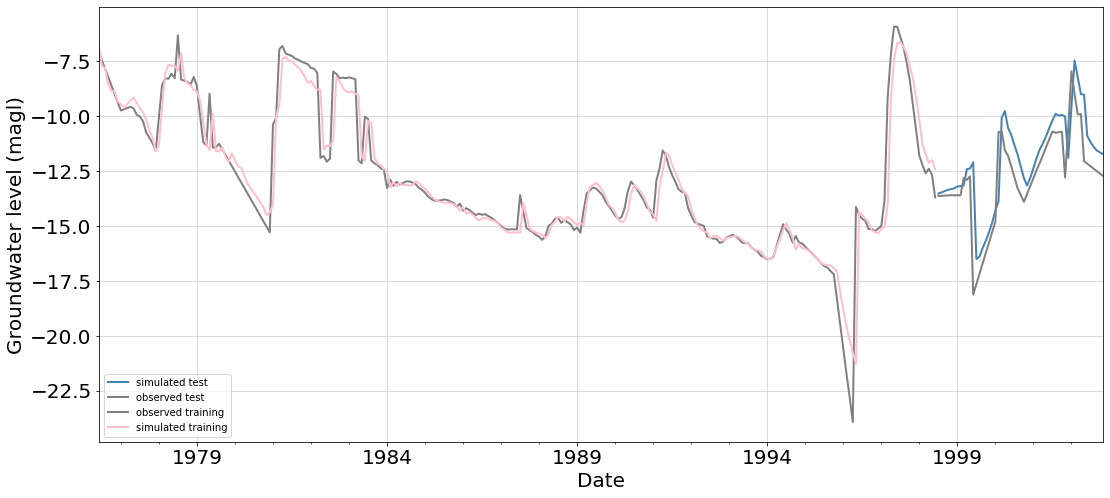

In [61]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[265:318].index)
df1['observed test']      = pima.iloc[265:318, 0].values

df2 = pd.DataFrame(pima.iloc[0:265, 0].values, columns = ['observed training'],index =pima.iloc[0:265].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [62]:
y_lstm = out_df['simulated test']

### GRU

In [63]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [64]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(53, 6)

    #running function
    gwl = -0.1297075
    test_forecast = X_test
    steps_ahead = 53
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_pred
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(265, 6)
Train on 265 samples, validate on 53 samples
Epoch 1/1000
 96/265 [=========>....................] - ETA: 3s - loss: 0.7192 - mean_squared_error: 0.7192
Epoch 00001: val_loss improved from inf to 0.46411, saving model to model.h5
265/265 [==============================] - 5s 18ms/sample - loss: 0.6646 - mean_squared_error: 0.6646 - val_loss: 0.4641 - val_mean_squared_error: 0.4641
Epoch 2/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.6144 - mean_squared_error: 0.6144
Epoch 00002: val_loss did not improve from 0.46411
265/265 [==============================] - 0s 122us/sample - loss: 0.5321 - mean_squared_error: 0.5321 - val_loss: 0.4675 - val_mean_squared_error: 0.4675
Epoch 3/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.5255 - mean_squared_error: 0.5255
Epoch 00003: val_loss did not improve from 0.46411
265/265 [==============================] - 0s 184us/sample - loss: 0.4825 - mean_squared_error: 0.4825 - val_loss: 0.47

 96/265 [=========>....................] - ETA: 0s - loss: 0.1811 - mean_squared_error: 0.1811
Epoch 00025: val_loss improved from 0.25140 to 0.24120, saving model to model.h5
265/265 [==============================] - 0s 151us/sample - loss: 0.1795 - mean_squared_error: 0.1795 - val_loss: 0.2412 - val_mean_squared_error: 0.2412
Epoch 26/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2060 - mean_squared_error: 0.2060
Epoch 00026: val_loss improved from 0.24120 to 0.23232, saving model to model.h5
265/265 [==============================] - 0s 271us/sample - loss: 0.1599 - mean_squared_error: 0.1599 - val_loss: 0.2323 - val_mean_squared_error: 0.2323
Epoch 27/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2019 - mean_squared_error: 0.2019
Epoch 00027: val_loss improved from 0.23232 to 0.22229, saving model to model.h5
265/265 [==============================] - 0s 190us/sample - loss: 0.1664 - mean_squared_error: 0.1664 - val_loss: 0.2223 - val_mean_s

Epoch 50/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0742 - mean_squared_error: 0.0742
Epoch 00050: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 104us/sample - loss: 0.1363 - mean_squared_error: 0.1363 - val_loss: 0.1784 - val_mean_squared_error: 0.1784
Epoch 51/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1599 - mean_squared_error: 0.1599
Epoch 00051: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 90us/sample - loss: 0.1365 - mean_squared_error: 0.1365 - val_loss: 0.1799 - val_mean_squared_error: 0.1799
Epoch 52/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1499 - mean_squared_error: 0.1499
Epoch 00052: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 91us/sample - loss: 0.1273 - mean_squared_error: 0.1273 - val_loss: 0.1818 - val_mean_squared_error: 0.1818
Epoch 53/1000
 96/265 [=========>....................] - 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00076: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 91us/sample - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.2085 - val_mean_squared_error: 0.2085
Epoch 77/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1493 - mean_squared_error: 0.1493
Epoch 00077: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 101us/sample - loss: 0.1175 - mean_squared_error: 0.1175 - val_loss: 0.2114 - val_mean_squared_error: 0.2114
Epoch 78/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1195 - mean_squared_error: 0.1195
Epoch 00078: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 94us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.2101 - val_mean_squared_error: 0.2101
Epoch 79/1000
 96/265 [=========>....................] - ETA: 0s - loss

 96/265 [=========>....................] - ETA: 0s - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 00102: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 94us/sample - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 103/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0835 - mean_squared_error: 0.0835
Epoch 00103: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 82us/sample - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.2194 - val_mean_squared_error: 0.2194
Epoch 104/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 00104: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 88us/sample - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.2195 - val_mean_squared_error: 0.2195
Epoch 105/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00128: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 123us/sample - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.2157 - val_mean_squared_error: 0.2157
Epoch 129/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1059 - mean_squared_error: 0.1059
Epoch 00129: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 112us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.2164 - val_mean_squared_error: 0.2164
Epoch 130/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 00130: val_loss did not improve from 0.16973
265/265 [==============================] - 0s 125us/sample - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.2163 - val_mean_squared_error: 0.2163
Epoch 131/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 11/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3194 - mean_squared_error: 0.3194
Epoch 00011: val_loss improved from 0.32026 to 0.31473, saving model to model.h5
265/265 [==============================] - 0s 224us/sample - loss: 0.4883 - mean_squared_error: 0.4883 - val_loss: 0.3147 - val_mean_squared_error: 0.3147
Epoch 12/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.4991 - mean_squared_error: 0.4991
Epoch 00012: val_loss improved from 0.31473 to 0.31046, saving model to model.h5
265/265 [==============================] - 0s 188us/sample - loss: 0.4618 - mean_squared_error: 0.4618 - val_loss: 0.3105 - val_mean_squared_error: 0.3105
Epoch 13/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2398 - mean_squared_error: 0.2398
Epoch 00013: val_loss improved from 0.31046 to 0.30554, saving model to model.h5
265/265 [==============================] - 0s 201us/sample - loss: 0.4165 - mean_squared_error: 0.4165 - val_loss: 0.305

Epoch 35/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2462 - mean_squared_error: 0.2462
Epoch 00035: val_loss improved from 0.18335 to 0.17861, saving model to model.h5
265/265 [==============================] - 0s 172us/sample - loss: 0.1770 - mean_squared_error: 0.1770 - val_loss: 0.1786 - val_mean_squared_error: 0.1786
Epoch 36/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2671 - mean_squared_error: 0.2671
Epoch 00036: val_loss improved from 0.17861 to 0.17494, saving model to model.h5
265/265 [==============================] - 0s 185us/sample - loss: 0.1808 - mean_squared_error: 0.1808 - val_loss: 0.1749 - val_mean_squared_error: 0.1749
Epoch 37/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1629 - mean_squared_error: 0.1629
Epoch 00037: val_loss improved from 0.17494 to 0.17190, saving model to model.h5
265/265 [==============================] - 0s 310us/sample - loss: 0.1730 - mean_squared_error: 0.1730 - val_loss: 0.171

Epoch 61/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2086 - mean_squared_error: 0.2086
Epoch 00061: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 106us/sample - loss: 0.1312 - mean_squared_error: 0.1312 - val_loss: 0.2223 - val_mean_squared_error: 0.2223
Epoch 62/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1419 - mean_squared_error: 0.1419
Epoch 00062: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 105us/sample - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.2251 - val_mean_squared_error: 0.2251
Epoch 63/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1674 - mean_squared_error: 0.1674
Epoch 00063: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 101us/sample - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.2268 - val_mean_squared_error: 0.2268
Epoch 64/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 00087: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 91us/sample - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.2392 - val_mean_squared_error: 0.2392
Epoch 88/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0991 - mean_squared_error: 0.0991
Epoch 00088: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 96us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.2423 - val_mean_squared_error: 0.2423
Epoch 89/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1808 - mean_squared_error: 0.1808
Epoch 00089: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 99us/sample - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.2427 - val_mean_squared_error: 0.2427
Epoch 90/1000
 96/265 [=========>....................] - ETA: 0s - loss:

 96/265 [=========>....................] - ETA: 0s - loss: 0.1480 - mean_squared_error: 0.1480
Epoch 00113: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 122us/sample - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.2310 - val_mean_squared_error: 0.2310
Epoch 114/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 00114: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 133us/sample - loss: 0.1114 - mean_squared_error: 0.1114 - val_loss: 0.2333 - val_mean_squared_error: 0.2333
Epoch 115/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00115: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 117us/sample - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.2278 - val_mean_squared_error: 0.2278
Epoch 116/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 139/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1318 - mean_squared_error: 0.1318
Epoch 00139: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 99us/sample - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.2217 - val_mean_squared_error: 0.2217
Epoch 140/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1186 - mean_squared_error: 0.1186
Epoch 00140: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 89us/sample - loss: 0.1007 - mean_squared_error: 0.1007 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 141/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0450 - mean_squared_error: 0.0450
Epoch 00141: val_loss did not improve from 0.16624
265/265 [==============================] - 0s 98us/sample - loss: 0.1052 - mean_squared_error: 0.1052 - val_loss: 0.2246 - val_mean_squared_error: 0.2246
Running fold 3
(265, 6)
Train on 265 samples, validate 

Epoch 22/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.5601 - mean_squared_error: 0.5601
Epoch 00022: val_loss improved from 0.57345 to 0.56905, saving model to model.h5
265/265 [==============================] - 0s 168us/sample - loss: 0.5510 - mean_squared_error: 0.5510 - val_loss: 0.5690 - val_mean_squared_error: 0.5690
Epoch 23/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.5485 - mean_squared_error: 0.5485
Epoch 00023: val_loss improved from 0.56905 to 0.56396, saving model to model.h5
265/265 [==============================] - 0s 174us/sample - loss: 0.5241 - mean_squared_error: 0.5241 - val_loss: 0.5640 - val_mean_squared_error: 0.5640
Epoch 24/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.4531 - mean_squared_error: 0.4531
Epoch 00024: val_loss improved from 0.56396 to 0.56129, saving model to model.h5
265/265 [==============================] - 0s 166us/sample - loss: 0.4930 - mean_squared_error: 0.4930 - val_loss: 0.561

Epoch 46/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1536 - mean_squared_error: 0.1536
Epoch 00046: val_loss improved from 0.31665 to 0.30228, saving model to model.h5
265/265 [==============================] - 0s 222us/sample - loss: 0.2041 - mean_squared_error: 0.2041 - val_loss: 0.3023 - val_mean_squared_error: 0.3023
Epoch 47/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2379 - mean_squared_error: 0.2379
Epoch 00047: val_loss improved from 0.30228 to 0.28947, saving model to model.h5
265/265 [==============================] - 0s 164us/sample - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.2895 - val_mean_squared_error: 0.2895
Epoch 48/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2007 - mean_squared_error: 0.2007
Epoch 00048: val_loss improved from 0.28947 to 0.27800, saving model to model.h5
265/265 [==============================] - 0s 176us/sample - loss: 0.1883 - mean_squared_error: 0.1883 - val_loss: 0.278

Epoch 70/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1662 - mean_squared_error: 0.1662
Epoch 00070: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 104us/sample - loss: 0.1337 - mean_squared_error: 0.1337 - val_loss: 0.1731 - val_mean_squared_error: 0.1731
Epoch 71/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 00071: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 90us/sample - loss: 0.1400 - mean_squared_error: 0.1400 - val_loss: 0.1735 - val_mean_squared_error: 0.1735
Epoch 72/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1780 - mean_squared_error: 0.1780
Epoch 00072: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 97us/sample - loss: 0.1378 - mean_squared_error: 0.1378 - val_loss: 0.1743 - val_mean_squared_error: 0.1743
Epoch 73/1000
 96/265 [=========>....................] - 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00096: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 94us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 97/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1436 - mean_squared_error: 0.1436
Epoch 00097: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 105us/sample - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 98/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1289 - mean_squared_error: 0.1289
Epoch 00098: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 97us/sample - loss: 0.1178 - mean_squared_error: 0.1178 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 99/1000
 96/265 [=========>....................] - ETA: 0s - loss

 96/265 [=========>....................] - ETA: 0s - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 00122: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 86us/sample - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.2381 - val_mean_squared_error: 0.2381
Epoch 123/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1141 - mean_squared_error: 0.1141
Epoch 00123: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 82us/sample - loss: 0.1023 - mean_squared_error: 0.1023 - val_loss: 0.2411 - val_mean_squared_error: 0.2411
Epoch 124/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00124: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 84us/sample - loss: 0.1173 - mean_squared_error: 0.1173 - val_loss: 0.2439 - val_mean_squared_error: 0.2439
Epoch 125/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0713 - mean_squared_error: 0.0713
Epoch 00148: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 87us/sample - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.2256 - val_mean_squared_error: 0.2256
Epoch 149/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00149: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 100us/sample - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 150/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1246 - mean_squared_error: 0.1246
Epoch 00150: val_loss did not improve from 0.17246
265/265 [==============================] - 0s 98us/sample - loss: 0.1057 - mean_squared_error: 0.1057 - val_loss: 0.2260 - val_mean_squared_error: 0.2260
Epoch 151/1000
 96/265 [=========>....................] - ETA: 0s - l

Epoch 6/1000
 96/265 [=========>....................] - ETA: 0s - loss: 1.0002 - mean_squared_error: 1.0002
Epoch 00006: val_loss improved from 0.86166 to 0.85744, saving model to model.h5
265/265 [==============================] - 0s 167us/sample - loss: 1.0700 - mean_squared_error: 1.0700 - val_loss: 0.8574 - val_mean_squared_error: 0.8574
Epoch 7/1000
 96/265 [=========>....................] - ETA: 0s - loss: 1.2018 - mean_squared_error: 1.2018
Epoch 00007: val_loss improved from 0.85744 to 0.85432, saving model to model.h5
265/265 [==============================] - 0s 147us/sample - loss: 1.0035 - mean_squared_error: 1.0035 - val_loss: 0.8543 - val_mean_squared_error: 0.8543
Epoch 8/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.7339 - mean_squared_error: 0.7339
Epoch 00008: val_loss improved from 0.85432 to 0.85191, saving model to model.h5
265/265 [==============================] - 0s 160us/sample - loss: 0.9443 - mean_squared_error: 0.9443 - val_loss: 0.8519 -

Epoch 30/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3031 - mean_squared_error: 0.3031
Epoch 00030: val_loss improved from 0.72449 to 0.70740, saving model to model.h5
265/265 [==============================] - 0s 150us/sample - loss: 0.3295 - mean_squared_error: 0.3295 - val_loss: 0.7074 - val_mean_squared_error: 0.7074
Epoch 31/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3227 - mean_squared_error: 0.3227
Epoch 00031: val_loss improved from 0.70740 to 0.69035, saving model to model.h5
265/265 [==============================] - 0s 182us/sample - loss: 0.3240 - mean_squared_error: 0.3240 - val_loss: 0.6903 - val_mean_squared_error: 0.6903
Epoch 32/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3118 - mean_squared_error: 0.3118
Epoch 00032: val_loss improved from 0.69035 to 0.67099, saving model to model.h5
265/265 [==============================] - 0s 157us/sample - loss: 0.3030 - mean_squared_error: 0.3030 - val_loss: 0.671

Epoch 54/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1823 - mean_squared_error: 0.1823
Epoch 00054: val_loss improved from 0.28916 to 0.27959, saving model to model.h5
265/265 [==============================] - 0s 153us/sample - loss: 0.1631 - mean_squared_error: 0.1631 - val_loss: 0.2796 - val_mean_squared_error: 0.2796
Epoch 55/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1957 - mean_squared_error: 0.1957
Epoch 00055: val_loss improved from 0.27959 to 0.26907, saving model to model.h5
265/265 [==============================] - 0s 161us/sample - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.2691 - val_mean_squared_error: 0.2691
Epoch 56/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2299 - mean_squared_error: 0.2299
Epoch 00056: val_loss improved from 0.26907 to 0.25957, saving model to model.h5
265/265 [==============================] - 0s 157us/sample - loss: 0.1827 - mean_squared_error: 0.1827 - val_loss: 0.259

 96/265 [=========>....................] - ETA: 0s - loss: 0.2238 - mean_squared_error: 0.2238
Epoch 00078: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 106us/sample - loss: 0.1315 - mean_squared_error: 0.1315 - val_loss: 0.1954 - val_mean_squared_error: 0.1954
Epoch 79/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1696 - mean_squared_error: 0.1696
Epoch 00079: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 107us/sample - loss: 0.1359 - mean_squared_error: 0.1359 - val_loss: 0.1957 - val_mean_squared_error: 0.1957
Epoch 80/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1398 - mean_squared_error: 0.1398
Epoch 00080: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 88us/sample - loss: 0.1284 - mean_squared_error: 0.1284 - val_loss: 0.1967 - val_mean_squared_error: 0.1967
Epoch 81/1000
 96/265 [=========>....................] - ETA: 0s - los

 96/265 [=========>....................] - ETA: 0s - loss: 0.1392 - mean_squared_error: 0.1392
Epoch 00104: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 89us/sample - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.2098 - val_mean_squared_error: 0.2098
Epoch 105/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1349 - mean_squared_error: 0.1349
Epoch 00105: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 123us/sample - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 0.2103 - val_mean_squared_error: 0.2103
Epoch 106/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1213 - mean_squared_error: 0.1213
Epoch 00106: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 82us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.2103 - val_mean_squared_error: 0.2103
Epoch 107/1000
 96/265 [=========>....................] - ETA: 0s - l

 96/265 [=========>....................] - ETA: 0s - loss: 0.1527 - mean_squared_error: 0.1527
Epoch 00130: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 161us/sample - loss: 0.1116 - mean_squared_error: 0.1116 - val_loss: 0.2159 - val_mean_squared_error: 0.2159
Epoch 131/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00131: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 134us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2138 - val_mean_squared_error: 0.2138
Epoch 132/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 00132: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 220us/sample - loss: 0.1126 - mean_squared_error: 0.1126 - val_loss: 0.2138 - val_mean_squared_error: 0.2138
Epoch 133/1000
 96/265 [=========>....................] - ETA: 0s -

 96/265 [=========>....................] - ETA: 0s - loss: 0.2005 - mean_squared_error: 0.2005
Epoch 00156: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 118us/sample - loss: 0.1062 - mean_squared_error: 0.1062 - val_loss: 0.2038 - val_mean_squared_error: 0.2038
Epoch 157/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00157: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 101us/sample - loss: 0.1028 - mean_squared_error: 0.1028 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 158/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1316 - mean_squared_error: 0.1316
Epoch 00158: val_loss did not improve from 0.19262
265/265 [==============================] - 0s 112us/sample - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.2060 - val_mean_squared_error: 0.2060
Epoch 159/1000
 96/265 [=========>....................] - ETA: 0s -

 96/265 [=========>....................] - ETA: 0s - loss: 0.8977 - mean_squared_error: 0.8977
Epoch 00007: val_loss improved from 0.42943 to 0.41745, saving model to model.h5
265/265 [==============================] - 0s 157us/sample - loss: 0.9848 - mean_squared_error: 0.9848 - val_loss: 0.4175 - val_mean_squared_error: 0.4175
Epoch 8/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.9210 - mean_squared_error: 0.9210
Epoch 00008: val_loss improved from 0.41745 to 0.40604, saving model to model.h5
265/265 [==============================] - 0s 159us/sample - loss: 0.9389 - mean_squared_error: 0.9389 - val_loss: 0.4060 - val_mean_squared_error: 0.4060
Epoch 9/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.7441 - mean_squared_error: 0.7441
Epoch 00009: val_loss improved from 0.40604 to 0.39541, saving model to model.h5
265/265 [==============================] - 0s 155us/sample - loss: 0.8967 - mean_squared_error: 0.8967 - val_loss: 0.3954 - val_mean_squ

Epoch 31/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1916 - mean_squared_error: 0.1916
Epoch 00031: val_loss improved from 0.24464 to 0.23942, saving model to model.h5
265/265 [==============================] - 0s 186us/sample - loss: 0.2210 - mean_squared_error: 0.2210 - val_loss: 0.2394 - val_mean_squared_error: 0.2394
Epoch 32/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3160 - mean_squared_error: 0.3160
Epoch 00032: val_loss improved from 0.23942 to 0.23402, saving model to model.h5
265/265 [==============================] - 0s 302us/sample - loss: 0.2246 - mean_squared_error: 0.2246 - val_loss: 0.2340 - val_mean_squared_error: 0.2340
Epoch 33/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2730 - mean_squared_error: 0.2730
Epoch 00033: val_loss improved from 0.23402 to 0.22840, saving model to model.h5
265/265 [==============================] - 0s 213us/sample - loss: 0.2031 - mean_squared_error: 0.2031 - val_loss: 0.228

 96/265 [=========>....................] - ETA: 0s - loss: 0.1630 - mean_squared_error: 0.1630
Epoch 00055: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 140us/sample - loss: 0.1525 - mean_squared_error: 0.1525 - val_loss: 0.1851 - val_mean_squared_error: 0.1851
Epoch 56/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1485 - mean_squared_error: 0.1485
Epoch 00056: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 198us/sample - loss: 0.1399 - mean_squared_error: 0.1399 - val_loss: 0.1872 - val_mean_squared_error: 0.1872
Epoch 57/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1399 - mean_squared_error: 0.1399
Epoch 00057: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 171us/sample - loss: 0.1316 - mean_squared_error: 0.1316 - val_loss: 0.1887 - val_mean_squared_error: 0.1887
Epoch 58/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1510 - mean_squared_error: 0.1510
Epoch 00081: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 134us/sample - loss: 0.1280 - mean_squared_error: 0.1280 - val_loss: 0.2253 - val_mean_squared_error: 0.2253
Epoch 82/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1247 - mean_squared_error: 0.1247
Epoch 00082: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 117us/sample - loss: 0.1312 - mean_squared_error: 0.1312 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 83/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00083: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 118us/sample - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 84/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1132 - mean_squared_error: 0.1132
Epoch 00107: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 140us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.2303 - val_mean_squared_error: 0.2303
Epoch 108/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1092 - mean_squared_error: 0.1092
Epoch 00108: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 101us/sample - loss: 0.1103 - mean_squared_error: 0.1103 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 109/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1879 - mean_squared_error: 0.1879
Epoch 00109: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 131us/sample - loss: 0.1175 - mean_squared_error: 0.1175 - val_loss: 0.2241 - val_mean_squared_error: 0.2241
Epoch 110/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 133/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1089 - mean_squared_error: 0.1089
Epoch 00133: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 109us/sample - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.2226 - val_mean_squared_error: 0.2226
Epoch 134/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1522 - mean_squared_error: 0.1522
Epoch 00134: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 100us/sample - loss: 0.1136 - mean_squared_error: 0.1136 - val_loss: 0.2225 - val_mean_squared_error: 0.2225
Epoch 135/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0878 - mean_squared_error: 0.0878
Epoch 00135: val_loss did not improve from 0.17942
265/265 [==============================] - 0s 158us/sample - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.2223 - val_mean_squared_error: 0.2223
Epoch 136/1000
 96/265 [=========>..................

 96/265 [=========>....................] - ETA: 0s - loss: 0.3947 - mean_squared_error: 0.3947
Epoch 00008: val_loss improved from 0.38891 to 0.38225, saving model to model.h5
265/265 [==============================] - 0s 144us/sample - loss: 0.5121 - mean_squared_error: 0.5121 - val_loss: 0.3823 - val_mean_squared_error: 0.3823
Epoch 9/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.5525 - mean_squared_error: 0.5525
Epoch 00009: val_loss improved from 0.38225 to 0.37663, saving model to model.h5
265/265 [==============================] - 0s 247us/sample - loss: 0.4794 - mean_squared_error: 0.4794 - val_loss: 0.3766 - val_mean_squared_error: 0.3766
Epoch 10/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.5191 - mean_squared_error: 0.5191
Epoch 00010: val_loss improved from 0.37663 to 0.37095, saving model to model.h5
265/265 [==============================] - 0s 245us/sample - loss: 0.4379 - mean_squared_error: 0.4379 - val_loss: 0.3709 - val_mean_sq

Epoch 32/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2759 - mean_squared_error: 0.2759
Epoch 00032: val_loss improved from 0.21857 to 0.21304, saving model to model.h5
265/265 [==============================] - 0s 146us/sample - loss: 0.1984 - mean_squared_error: 0.1984 - val_loss: 0.2130 - val_mean_squared_error: 0.2130
Epoch 33/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1936 - mean_squared_error: 0.1936
Epoch 00033: val_loss improved from 0.21304 to 0.20825, saving model to model.h5
265/265 [==============================] - 0s 161us/sample - loss: 0.1750 - mean_squared_error: 0.1750 - val_loss: 0.2082 - val_mean_squared_error: 0.2082
Epoch 34/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 00034: val_loss improved from 0.20825 to 0.20348, saving model to model.h5
265/265 [==============================] - 0s 146us/sample - loss: 0.1931 - mean_squared_error: 0.1931 - val_loss: 0.203

 96/265 [=========>....................] - ETA: 0s - loss: 0.1189 - mean_squared_error: 0.1189
Epoch 00057: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 88us/sample - loss: 0.1390 - mean_squared_error: 0.1390 - val_loss: 0.2291 - val_mean_squared_error: 0.2291
Epoch 58/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1516 - mean_squared_error: 0.1516
Epoch 00058: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 81us/sample - loss: 0.1358 - mean_squared_error: 0.1358 - val_loss: 0.2319 - val_mean_squared_error: 0.2319
Epoch 59/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1775 - mean_squared_error: 0.1775
Epoch 00059: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 90us/sample - loss: 0.1322 - mean_squared_error: 0.1322 - val_loss: 0.2335 - val_mean_squared_error: 0.2335
Epoch 60/1000
 96/265 [=========>....................] - ETA: 0s - loss:

 96/265 [=========>....................] - ETA: 0s - loss: 0.0727 - mean_squared_error: 0.0727
Epoch 00083: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 91us/sample - loss: 0.1258 - mean_squared_error: 0.1258 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 84/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1526 - mean_squared_error: 0.1526
Epoch 00084: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 103us/sample - loss: 0.1284 - mean_squared_error: 0.1284 - val_loss: 0.2675 - val_mean_squared_error: 0.2675
Epoch 85/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 00085: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 98us/sample - loss: 0.1183 - mean_squared_error: 0.1183 - val_loss: 0.2677 - val_mean_squared_error: 0.2677
Epoch 86/1000
 96/265 [=========>....................] - ETA: 0s - loss

 96/265 [=========>....................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00109: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 114us/sample - loss: 0.1105 - mean_squared_error: 0.1105 - val_loss: 0.2617 - val_mean_squared_error: 0.2617
Epoch 110/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1139 - mean_squared_error: 0.1139
Epoch 00110: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 114us/sample - loss: 0.1152 - mean_squared_error: 0.1152 - val_loss: 0.2605 - val_mean_squared_error: 0.2605
Epoch 111/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1151 - mean_squared_error: 0.1151
Epoch 00111: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 105us/sample - loss: 0.1270 - mean_squared_error: 0.1270 - val_loss: 0.2592 - val_mean_squared_error: 0.2592
Epoch 112/1000
 96/265 [=========>....................] - ETA: 0s -

 96/265 [=========>....................] - ETA: 0s - loss: 0.0779 - mean_squared_error: 0.0779
Epoch 00135: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 103us/sample - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.2442 - val_mean_squared_error: 0.2442
Epoch 136/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1496 - mean_squared_error: 0.1496
Epoch 00136: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 114us/sample - loss: 0.1202 - mean_squared_error: 0.1202 - val_loss: 0.2427 - val_mean_squared_error: 0.2427
Epoch 137/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00137: val_loss did not improve from 0.19098
265/265 [==============================] - 0s 96us/sample - loss: 0.1077 - mean_squared_error: 0.1077 - val_loss: 0.2434 - val_mean_squared_error: 0.2434
Epoch 138/1000
 96/265 [=========>....................] - ETA: 0s - 

 96/265 [=========>....................] - ETA: 0s - loss: 0.2084 - mean_squared_error: 0.2084
Epoch 00019: val_loss improved from 0.27592 to 0.26509, saving model to model.h5
265/265 [==============================] - 0s 207us/sample - loss: 0.2520 - mean_squared_error: 0.2520 - val_loss: 0.2651 - val_mean_squared_error: 0.2651
Epoch 20/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1934 - mean_squared_error: 0.1934
Epoch 00020: val_loss improved from 0.26509 to 0.25491, saving model to model.h5
265/265 [==============================] - 0s 256us/sample - loss: 0.2452 - mean_squared_error: 0.2452 - val_loss: 0.2549 - val_mean_squared_error: 0.2549
Epoch 21/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2472 - mean_squared_error: 0.2472
Epoch 00021: val_loss improved from 0.25491 to 0.24558, saving model to model.h5
265/265 [==============================] - 0s 294us/sample - loss: 0.2306 - mean_squared_error: 0.2306 - val_loss: 0.2456 - val_mean_s

Epoch 44/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1486 - mean_squared_error: 0.1486
Epoch 00044: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 101us/sample - loss: 0.1395 - mean_squared_error: 0.1395 - val_loss: 0.1938 - val_mean_squared_error: 0.1938
Epoch 45/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1180 - mean_squared_error: 0.1180
Epoch 00045: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 144us/sample - loss: 0.1402 - mean_squared_error: 0.1402 - val_loss: 0.1996 - val_mean_squared_error: 0.1996
Epoch 46/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1172 - mean_squared_error: 0.1172
Epoch 00046: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 92us/sample - loss: 0.1387 - mean_squared_error: 0.1387 - val_loss: 0.2011 - val_mean_squared_error: 0.2011
Epoch 47/1000
 96/265 [=========>....................] -

 96/265 [=========>....................] - ETA: 0s - loss: 0.1359 - mean_squared_error: 0.1359
Epoch 00070: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 101us/sample - loss: 0.1142 - mean_squared_error: 0.1142 - val_loss: 0.2552 - val_mean_squared_error: 0.2552
Epoch 71/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1758 - mean_squared_error: 0.1758
Epoch 00071: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 99us/sample - loss: 0.1361 - mean_squared_error: 0.1361 - val_loss: 0.2528 - val_mean_squared_error: 0.2528
Epoch 72/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1151 - mean_squared_error: 0.1151
Epoch 00072: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 98us/sample - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.2571 - val_mean_squared_error: 0.2571
Epoch 73/1000
 96/265 [=========>....................] - ETA: 0s - loss

 96/265 [=========>....................] - ETA: 0s - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 00096: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 168us/sample - loss: 0.1251 - mean_squared_error: 0.1251 - val_loss: 0.2452 - val_mean_squared_error: 0.2452
Epoch 97/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 00097: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 120us/sample - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.2460 - val_mean_squared_error: 0.2460
Epoch 98/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0917 - mean_squared_error: 0.0917
Epoch 00098: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 96us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2416 - val_mean_squared_error: 0.2416
Epoch 99/1000
 96/265 [=========>....................] - ETA: 0s - los

 96/265 [=========>....................] - ETA: 0s - loss: 0.1582 - mean_squared_error: 0.1582
Epoch 00122: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 88us/sample - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 123/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1573 - mean_squared_error: 0.1573
Epoch 00123: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 101us/sample - loss: 0.1054 - mean_squared_error: 0.1054 - val_loss: 0.2148 - val_mean_squared_error: 0.2148
Epoch 124/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1027 - mean_squared_error: 0.1027
Epoch 00124: val_loss did not improve from 0.17708
265/265 [==============================] - 0s 97us/sample - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.2184 - val_mean_squared_error: 0.2184
Epoch 125/1000
 96/265 [=========>....................] - ETA: 0s - l

 96/265 [=========>....................] - ETA: 0s - loss: 0.7489 - mean_squared_error: 0.7489
Epoch 00010: val_loss improved from 0.52836 to 0.52048, saving model to model.h5
265/265 [==============================] - 0s 457us/sample - loss: 0.8477 - mean_squared_error: 0.8477 - val_loss: 0.5205 - val_mean_squared_error: 0.5205
Epoch 11/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.8045 - mean_squared_error: 0.8045
Epoch 00011: val_loss improved from 0.52048 to 0.51314, saving model to model.h5
265/265 [==============================] - 0s 235us/sample - loss: 0.8029 - mean_squared_error: 0.8029 - val_loss: 0.5131 - val_mean_squared_error: 0.5131
Epoch 12/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.6221 - mean_squared_error: 0.6221
Epoch 00012: val_loss improved from 0.51314 to 0.50609, saving model to model.h5
265/265 [==============================] - 0s 183us/sample - loss: 0.7272 - mean_squared_error: 0.7272 - val_loss: 0.5061 - val_mean_s

Epoch 34/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2523 - mean_squared_error: 0.2523
Epoch 00034: val_loss improved from 0.38267 to 0.37267, saving model to model.h5
265/265 [==============================] - 0s 426us/sample - loss: 0.2656 - mean_squared_error: 0.2656 - val_loss: 0.3727 - val_mean_squared_error: 0.3727
Epoch 35/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3772 - mean_squared_error: 0.3772
Epoch 00035: val_loss improved from 0.37267 to 0.36248, saving model to model.h5
265/265 [==============================] - 0s 267us/sample - loss: 0.2695 - mean_squared_error: 0.2695 - val_loss: 0.3625 - val_mean_squared_error: 0.3625
Epoch 36/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3579 - mean_squared_error: 0.3579
Epoch 00036: val_loss improved from 0.36248 to 0.35130, saving model to model.h5
265/265 [==============================] - 0s 235us/sample - loss: 0.2645 - mean_squared_error: 0.2645 - val_loss: 0.351

265/265 [==============================] - 0s 332us/sample - loss: 0.1595 - mean_squared_error: 0.1595 - val_loss: 0.1987 - val_mean_squared_error: 0.1987
Epoch 58/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1511 - mean_squared_error: 0.1511
Epoch 00058: val_loss improved from 0.19871 to 0.19499, saving model to model.h5
265/265 [==============================] - 0s 287us/sample - loss: 0.1773 - mean_squared_error: 0.1773 - val_loss: 0.1950 - val_mean_squared_error: 0.1950
Epoch 59/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2236 - mean_squared_error: 0.2236
Epoch 00059: val_loss improved from 0.19499 to 0.19137, saving model to model.h5
265/265 [==============================] - 0s 400us/sample - loss: 0.1488 - mean_squared_error: 0.1488 - val_loss: 0.1914 - val_mean_squared_error: 0.1914
Epoch 60/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1516 - mean_squared_error: 0.1516
Epoch 00060: val_loss improved from 0.19137 to

Epoch 83/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 00083: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 148us/sample - loss: 0.1280 - mean_squared_error: 0.1280 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
Epoch 84/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 00084: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 111us/sample - loss: 0.1385 - mean_squared_error: 0.1385 - val_loss: 0.2086 - val_mean_squared_error: 0.2086
Epoch 85/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1052 - mean_squared_error: 0.1052
Epoch 00085: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 160us/sample - loss: 0.1405 - mean_squared_error: 0.1405 - val_loss: 0.2123 - val_mean_squared_error: 0.2123
Epoch 86/1000
 96/265 [=========>....................] 

Epoch 109/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 00109: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 121us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 110/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1528 - mean_squared_error: 0.1528
Epoch 00110: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 113us/sample - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 0.2676 - val_mean_squared_error: 0.2676
Epoch 111/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1484 - mean_squared_error: 0.1484
Epoch 00111: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 118us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.2668 - val_mean_squared_error: 0.2668
Epoch 112/1000
 96/265 [=========>..................

Epoch 135/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 00135: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 99us/sample - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.2737 - val_mean_squared_error: 0.2737
Epoch 136/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1575 - mean_squared_error: 0.1575
Epoch 00136: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 119us/sample - loss: 0.1132 - mean_squared_error: 0.1132 - val_loss: 0.2736 - val_mean_squared_error: 0.2736
Epoch 137/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00137: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 158us/sample - loss: 0.1147 - mean_squared_error: 0.1147 - val_loss: 0.2755 - val_mean_squared_error: 0.2755
Epoch 138/1000
 96/265 [=========>...................

Epoch 161/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1438 - mean_squared_error: 0.1438
Epoch 00161: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 106us/sample - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.2567 - val_mean_squared_error: 0.2567
Epoch 162/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1549 - mean_squared_error: 0.1549
Epoch 00162: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 119us/sample - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.2568 - val_mean_squared_error: 0.2568
Epoch 163/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 00163: val_loss did not improve from 0.18096
265/265 [==============================] - 0s 100us/sample - loss: 0.1060 - mean_squared_error: 0.1060 - val_loss: 0.2587 - val_mean_squared_error: 0.2587
Epoch 164/1000
 96/265 [=========>..................

 96/265 [=========>....................] - ETA: 0s - loss: 0.1924 - mean_squared_error: 0.1924
Epoch 00018: val_loss improved from 0.20879 to 0.20841, saving model to model.h5
265/265 [==============================] - 0s 150us/sample - loss: 0.2092 - mean_squared_error: 0.2092 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 19/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2041 - mean_squared_error: 0.2041
Epoch 00019: val_loss improved from 0.20841 to 0.20741, saving model to model.h5
265/265 [==============================] - 0s 149us/sample - loss: 0.2062 - mean_squared_error: 0.2062 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 20/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1460 - mean_squared_error: 0.1460
Epoch 00020: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 76us/sample - loss: 0.1824 - mean_squared_error: 0.1824 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 21/1

Epoch 44/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1589 - mean_squared_error: 0.1589
Epoch 00044: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 87us/sample - loss: 0.1425 - mean_squared_error: 0.1425 - val_loss: 0.3013 - val_mean_squared_error: 0.3013
Epoch 45/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1833 - mean_squared_error: 0.1833
Epoch 00045: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 80us/sample - loss: 0.1390 - mean_squared_error: 0.1390 - val_loss: 0.3005 - val_mean_squared_error: 0.3005
Epoch 46/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1271 - mean_squared_error: 0.1271
Epoch 00046: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 89us/sample - loss: 0.1430 - mean_squared_error: 0.1430 - val_loss: 0.3039 - val_mean_squared_error: 0.3039
Epoch 47/1000
 96/265 [=========>....................] - E

 96/265 [=========>....................] - ETA: 0s - loss: 0.1605 - mean_squared_error: 0.1605
Epoch 00070: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 93us/sample - loss: 0.1247 - mean_squared_error: 0.1247 - val_loss: 0.3150 - val_mean_squared_error: 0.3150
Epoch 71/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1288 - mean_squared_error: 0.1288
Epoch 00071: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 93us/sample - loss: 0.1302 - mean_squared_error: 0.1302 - val_loss: 0.3105 - val_mean_squared_error: 0.3105
Epoch 72/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1927 - mean_squared_error: 0.1927
Epoch 00072: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 95us/sample - loss: 0.1223 - mean_squared_error: 0.1223 - val_loss: 0.3118 - val_mean_squared_error: 0.3118
Epoch 73/1000
 96/265 [=========>....................] - ETA: 0s - loss:

 96/265 [=========>....................] - ETA: 0s - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 00096: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 106us/sample - loss: 0.1168 - mean_squared_error: 0.1168 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 97/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1787 - mean_squared_error: 0.1787
Epoch 00097: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 122us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.2700 - val_mean_squared_error: 0.2700
Epoch 98/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1178 - mean_squared_error: 0.1178
Epoch 00098: val_loss did not improve from 0.20741
265/265 [==============================] - 0s 108us/sample - loss: 0.1225 - mean_squared_error: 0.1225 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 99/1000
 96/265 [=========>....................] - ETA: 0s - lo

Epoch 3/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.9139 - mean_squared_error: 0.9139
Epoch 00003: val_loss improved from 0.42319 to 0.40630, saving model to model.h5
265/265 [==============================] - 0s 244us/sample - loss: 1.1933 - mean_squared_error: 1.1933 - val_loss: 0.4063 - val_mean_squared_error: 0.4063
Epoch 4/1000
 96/265 [=========>....................] - ETA: 0s - loss: 1.1079 - mean_squared_error: 1.1079
Epoch 00004: val_loss improved from 0.40630 to 0.39220, saving model to model.h5
265/265 [==============================] - 0s 241us/sample - loss: 1.1043 - mean_squared_error: 1.1043 - val_loss: 0.3922 - val_mean_squared_error: 0.3922
Epoch 5/1000
 96/265 [=========>....................] - ETA: 0s - loss: 1.1777 - mean_squared_error: 1.1777
Epoch 00005: val_loss improved from 0.39220 to 0.37996, saving model to model.h5
265/265 [==============================] - 0s 244us/sample - loss: 1.0315 - mean_squared_error: 1.0315 - val_loss: 0.3800 -

Epoch 27/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2706 - mean_squared_error: 0.2706
Epoch 00027: val_loss improved from 0.22455 to 0.22150, saving model to model.h5
265/265 [==============================] - 0s 191us/sample - loss: 0.2590 - mean_squared_error: 0.2590 - val_loss: 0.2215 - val_mean_squared_error: 0.2215
Epoch 28/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2329 - mean_squared_error: 0.2329
Epoch 00028: val_loss improved from 0.22150 to 0.21881, saving model to model.h5
265/265 [==============================] - 0s 208us/sample - loss: 0.2439 - mean_squared_error: 0.2439 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 29/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2370 - mean_squared_error: 0.2370
Epoch 00029: val_loss improved from 0.21881 to 0.21640, saving model to model.h5
265/265 [==============================] - 0s 174us/sample - loss: 0.2352 - mean_squared_error: 0.2352 - val_loss: 0.216

Epoch 52/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00052: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 237us/sample - loss: 0.1571 - mean_squared_error: 0.1571 - val_loss: 0.2456 - val_mean_squared_error: 0.2456
Epoch 53/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1557 - mean_squared_error: 0.1557
Epoch 00053: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 198us/sample - loss: 0.1522 - mean_squared_error: 0.1522 - val_loss: 0.2502 - val_mean_squared_error: 0.2502
Epoch 54/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1663 - mean_squared_error: 0.1663
Epoch 00054: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 175us/sample - loss: 0.1709 - mean_squared_error: 0.1709 - val_loss: 0.2545 - val_mean_squared_error: 0.2545
Epoch 55/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0744 - mean_squared_error: 0.0744
Epoch 00078: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 155us/sample - loss: 0.1346 - mean_squared_error: 0.1346 - val_loss: 0.3021 - val_mean_squared_error: 0.3021
Epoch 79/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1633 - mean_squared_error: 0.1633
Epoch 00079: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 162us/sample - loss: 0.1442 - mean_squared_error: 0.1442 - val_loss: 0.3052 - val_mean_squared_error: 0.3052
Epoch 80/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1232 - mean_squared_error: 0.1232
Epoch 00080: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 238us/sample - loss: 0.1379 - mean_squared_error: 0.1379 - val_loss: 0.3048 - val_mean_squared_error: 0.3048
Epoch 81/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1532 - mean_squared_error: 0.1532
Epoch 00104: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 189us/sample - loss: 0.1281 - mean_squared_error: 0.1281 - val_loss: 0.2966 - val_mean_squared_error: 0.2966
Epoch 105/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0744 - mean_squared_error: 0.0744
Epoch 00105: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 176us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.2999 - val_mean_squared_error: 0.2999
Epoch 106/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 00106: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 144us/sample - loss: 0.1229 - mean_squared_error: 0.1229 - val_loss: 0.2999 - val_mean_squared_error: 0.2999
Epoch 107/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 130/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1694 - mean_squared_error: 0.1694
Epoch 00130: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 174us/sample - loss: 0.1192 - mean_squared_error: 0.1192 - val_loss: 0.2697 - val_mean_squared_error: 0.2697
Epoch 131/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1561 - mean_squared_error: 0.1561
Epoch 00131: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 263us/sample - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.2686 - val_mean_squared_error: 0.2686
Epoch 132/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1158 - mean_squared_error: 0.1158
Epoch 00132: val_loss did not improve from 0.20686
265/265 [==============================] - 0s 154us/sample - loss: 0.1118 - mean_squared_error: 0.1118 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 133/1000
 96/265 [=========>..................

In [65]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.235     0.485   0.508    0.353
1   Iteration_2    0.235     0.485   0.508    0.353
2   Iteration_3    0.235     0.485   0.508    0.353
3   Iteration_4    0.235     0.485   0.508    0.353
4   Iteration_5    0.235     0.485   0.508    0.353
5   Iteration_6    0.235     0.485   0.508    0.353
6   Iteration_7    0.235     0.485   0.508    0.353
7   Iteration_8    0.235     0.485   0.508    0.353
8   Iteration_9    0.235     0.485   0.508    0.353
9  Iteration_10    0.235     0.485   0.508    0.353

In [66]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:265, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      2.247378    2.107034    2.080490    2.153977    2.049070    1.953835   
1      1.849733    1.809682    1.804028    1.683463    1.755808    1.754256   
2      1.732695    1.635996    1.656287    1.682514    1.635372    1.585387   
3      1.465025    1.457708    1.442201    1.427253    1.483042    1.408663   
4      1.352729    1.352367    1.340501    1.328261    1.390457    1.300902   
..          ...         ...         ...         ...         ...         ...   
260    0.487773    0.542805    0.530020    0.515127    0.560127    0.547962   
261    0.360900    0.410799    0.394704    0.354636    0.408897    0.385102   
262    0.239255    0.281149    0.263655    0.221497    0.276221    0.257674   
263    0.284481    0.336675    0.313630    0.259875    0.319003    0.283729   
264    0.138962    0.192937    0.166861    0.124126    0.185923    0.151513   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      2.020166    2.081877    2.288647  2.109164  0.100308  2.209472   
1      1.645292    1.713597    1.701274  1.746348  0.062760  1.809108   
2      1.636377    1.571705    1.586755  1.635899  0.048358  1.684256   
3      1.461667    1.395534    1.462388  1.444831  0.027243  1.472074   
4      1.363891    1.312164    1.350463  1.343526  0.025540  1.369067   
..          ...         ...         ...       ...       ...       ...   
260    0.538081    0.563765    0.670455  0.550679  0.047706  0.598385   
261    0.399634    0.418246    0.485509  0.402047  0.035962  0.438010   
262    0.272126    0.294986    0.352264  0.273203  0.034892  0.308095   
263    0.320200    0.327391    0.359398  0.311598  0.028835  0.340433   
264    0.184484    0.192203    0.245852  0.175873  0.033903  0.209777   

          Min    actual  
0    2.008855  1.965741  
1    1.683588  1.838818  
2    1.587541  1.707664  
3    1.417588  1.576510  
4    1.317986  1.449587  
..        ...       ...  
260  0.502973  0.221468  
261  0.366085  0.093061  
262  0.238311  0.164086  
263  0.282762  0.069386  
264  0.141970 -0.278976  

[265 rows x 14 columns]

In [67]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[265:318, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -0.229412   -0.229412   -0.229412   -0.229412   -0.229412   -0.229412   
1    -0.218135   -0.218135   -0.218135   -0.218135   -0.218135   -0.218135   
2    -0.193698   -0.193698   -0.193698   -0.193698   -0.193698   -0.193698   
3    -0.172052   -0.172052   -0.172052   -0.172052   -0.172052   -0.172052   
4    -0.157243   -0.157243   -0.157243   -0.157243   -0.157243   -0.157243   
5    -0.142885   -0.142885   -0.142885   -0.142885   -0.142885   -0.142885   
6    -0.112433   -0.112433   -0.112433   -0.112433   -0.112433   -0.112433   
7    -0.104020   -0.104020   -0.104020   -0.104020   -0.104020   -0.104020   
8    -0.091134   -0.091134   -0.091134   -0.091134   -0.091134   -0.091134   
9     0.152854    0.152854    0.152854    0.152854    0.152854    0.152854   
10    0.182889    0.182889    0.182889    0.182889    0.182889    0.182889   
11    0.285527    0.285527    0.285527    0.285527    0.285527    0.285527   
12   -1.203825   -1.203825   -1.203825   -1.203825   -1.203825   -1.203825   
13   -1.205005   -1.205005   -1.205005   -1.205005   -1.205005   -1.205005   
14   -1.070821   -1.070821   -1.070821   -1.070821   -1.070821   -1.070821   
15   -0.956611   -0.956611   -0.956611   -0.956611   -0.956611   -0.956611   
16   -0.825756   -0.825756   -0.825756   -0.825756   -0.825756   -0.825756   
17   -0.670506   -0.670506   -0.670506   -0.670506   -0.670506   -0.670506   
18   -0.485410   -0.485410   -0.485410   -0.485410   -0.485410   -0.485410   
19   -0.331536   -0.331536   -0.331536   -0.331536   -0.331536   -0.331536   
20    0.945664    0.945664    0.945664    0.945664    0.945664    0.945664   
21    1.104435    1.104435    1.104435    1.104435    1.104435    1.104435   
22    0.850358    0.850358    0.850358    0.850358    0.850358    0.850358   
23    0.728136    0.728136    0.728136    0.728136    0.728136    0.728136   
24    0.569120    0.569120    0.569120    0.569120    0.569120    0.569120   
25    0.423418    0.423418    0.423418    0.423418    0.423418    0.423418   
26    0.230391    0.230391    0.230391    0.230391    0.230391    0.230391   
27    0.037961    0.037961    0.037961    0.037961    0.037961    0.037961   
28   -0.084100   -0.084100   -0.084100   -0.084100   -0.084100   -0.084100   
29    0.026528    0.026528    0.026528    0.026528    0.026528    0.026528   
30    0.179606    0.179606    0.179606    0.179606    0.179606    0.179606   
31    0.348146    0.348146    0.348146    0.348146    0.348146    0.348146   
32    0.488908    0.488908    0.488908    0.488908    0.488908    0.488908   
33    0.586615    0.586615    0.586615    0.586615    0.586615    0.586615   
34    0.694912    0.694912    0.694912    0.694912    0.694912    0.694912   
35    0.819857    0.819857    0.819857    0.819857    0.819857    0.819857   
36    0.933922    0.933922    0.933922    0.933922    0.933922    0.933922   
37    1.039669    1.039669    1.039669    1.039669    1.039669    1.039669   
38    1.019383    1.019383    1.019383    1.019383    1.019383    1.019383   
39    1.031199    1.031199    1.031199    1.031199    1.031199    1.031199   
40    0.998738    0.998738    0.998738    0.998738    0.998738    0.998738   
41    0.378134    0.378134    0.378134    0.378134    0.378134    0.378134   
42    1.115840    1.115840    1.115840    1.115840    1.115840    1.115840   
43    1.817830    1.817830    1.817830    1.817830    1.817830    1.817830   
44    1.607691    1.607691    1.607691    1.607691    1.607691    1.607691   
45    1.348267    1.348267    1.348267    1.348267    1.348267    1.348267   
46    1.324646    1.324646    1.324646    1.324646    1.324646    1.324646   
47    0.714372    0.714372    0.714372    0.714372    0.714372    0.714372   
48    0.592506    0.592506    0.592506    0.592506    0.592506    0.592506   
49    0.503586    0.503586    0.503586    0.503586    0.503586    0.503586   
50    0.440887    0.440887

In [68]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:265]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[265:318]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.103
Root mean squared error is: 0.322
Mean absolute error is: 0.18
R^2 score is:  0.906

The model performance for the test set
--------------------------------------
R^2 score is:  0.508
Mean squared error is: 0.235
Root mean squared error is: 0.485
Mean absolute error is: 0.353
Stdv    0.017
dtype: float32


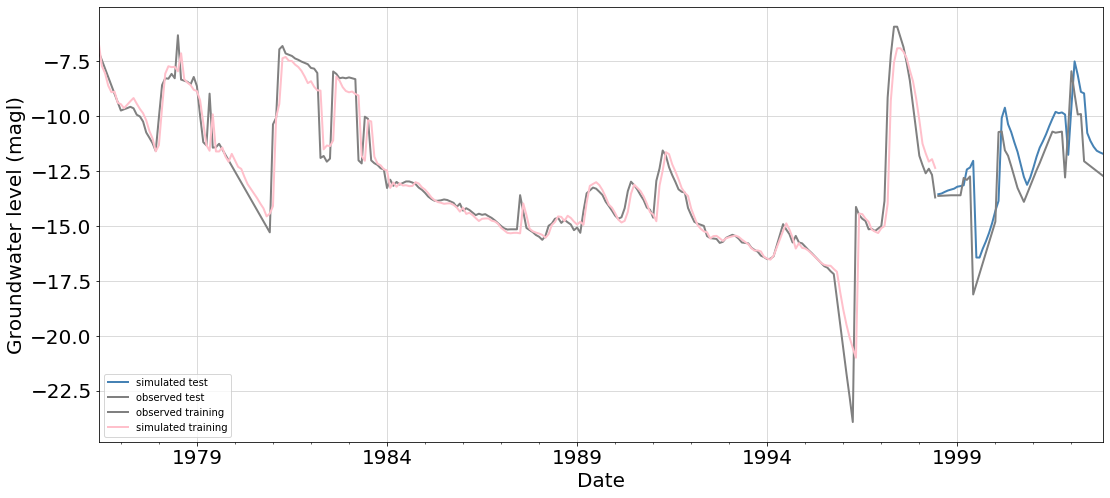

In [69]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))
print(round(stdv_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[265:318].index)
df1['observed test']      = pima.iloc[265:318, 0].values

df2 = pd.DataFrame(pima.iloc[0:265, 0].values, columns = ['observed training'],index =pima.iloc[0:265].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [70]:
y_gru = out_df['simulated test']

### FFNN

In [71]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(53, 6)

    #running function
    gwl = -0.1297075
    test_forecast = X_test
    steps_ahead = 53
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(265, 6)
Train on 265 samples, validate on 53 samples
Epoch 1/1000
 96/265 [=========>....................] - ETA: 6s - loss: 0.7703 - mean_squared_error: 0.7703
Epoch 00001: val_loss improved from inf to 0.28219, saving model to model.h5
265/265 [==============================] - 11s 42ms/sample - loss: 0.7843 - mean_squared_error: 0.7843 - val_loss: 0.2822 - val_mean_squared_error: 0.2822
Epoch 2/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.6256 - mean_squared_error: 0.6256
Epoch 00002: val_loss improved from 0.28219 to 0.22852, saving model to model.h5
265/265 [==============================] - 0s 333us/sample - loss: 0.5327 - mean_squared_error: 0.5327 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch 3/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.4208 - mean_squared_error: 0.4208
Epoch 00003: val_loss improved from 0.22852 to 0.19907, saving model to model.h5
265/265 [==============================] - 0s 285us/sample

Epoch 27/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1428 - mean_squared_error: 0.1428
Epoch 00027: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 197us/sample - loss: 0.1208 - mean_squared_error: 0.1208 - val_loss: 0.2603 - val_mean_squared_error: 0.2603
Epoch 28/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1129 - mean_squared_error: 0.1129
Epoch 00028: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 194us/sample - loss: 0.1158 - mean_squared_error: 0.1158 - val_loss: 0.2751 - val_mean_squared_error: 0.2751
Epoch 29/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1588 - mean_squared_error: 0.1588
Epoch 00029: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 137us/sample - loss: 0.1150 - mean_squared_error: 0.1150 - val_loss: 0.2581 - val_mean_squared_error: 0.2581
Epoch 30/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 00053: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 123us/sample - loss: 0.1038 - mean_squared_error: 0.1038 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 54/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1889 - mean_squared_error: 0.1889
Epoch 00054: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 136us/sample - loss: 0.1148 - mean_squared_error: 0.1148 - val_loss: 0.2431 - val_mean_squared_error: 0.2431
Epoch 55/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00055: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 119us/sample - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.2559 - val_mean_squared_error: 0.2559
Epoch 56/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00079: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 171us/sample - loss: 0.1138 - mean_squared_error: 0.1138 - val_loss: 0.2389 - val_mean_squared_error: 0.2389
Epoch 80/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0793 - mean_squared_error: 0.0793
Epoch 00080: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 208us/sample - loss: 0.1178 - mean_squared_error: 0.1178 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 81/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1138 - mean_squared_error: 0.1138
Epoch 00081: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 226us/sample - loss: 0.0987 - mean_squared_error: 0.0987 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 82/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 00105: val_loss did not improve from 0.18312
265/265 [==============================] - 0s 148us/sample - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.2191 - val_mean_squared_error: 0.2191
Running fold 2
(265, 6)
Train on 265 samples, validate on 53 samples
Epoch 1/1000
 96/265 [=========>....................] - ETA: 4s - loss: 0.7543 - mean_squared_error: 0.7543
Epoch 00001: val_loss improved from inf to 0.30208, saving model to model.h5
265/265 [==============================] - 7s 28ms/sample - loss: 0.7145 - mean_squared_error: 0.7145 - val_loss: 0.3021 - val_mean_squared_error: 0.3021
Epoch 2/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.6191 - mean_squared_error: 0.6191
Epoch 00002: val_loss improved from 0.30208 to 0.28824, saving model to model.h5
265/265 [==============================] - 0s 247us/sample - loss: 0.4812 - mean_squared_error: 0.4812

Epoch 25/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 00025: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 104us/sample - loss: 0.0982 - mean_squared_error: 0.0982 - val_loss: 0.2217 - val_mean_squared_error: 0.2217
Epoch 26/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1272 - mean_squared_error: 0.1272
Epoch 00026: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 150us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.2282 - val_mean_squared_error: 0.2282
Epoch 27/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1360 - mean_squared_error: 0.1360
Epoch 00027: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 104us/sample - loss: 0.1084 - mean_squared_error: 0.1084 - val_loss: 0.1953 - val_mean_squared_error: 0.1953
Epoch 28/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 00051: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 126us/sample - loss: 0.1026 - mean_squared_error: 0.1026 - val_loss: 0.2362 - val_mean_squared_error: 0.2362
Epoch 52/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1676 - mean_squared_error: 0.1676
Epoch 00052: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 125us/sample - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.1788 - val_mean_squared_error: 0.1788
Epoch 53/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1436 - mean_squared_error: 0.1436
Epoch 00053: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 107us/sample - loss: 0.1054 - mean_squared_error: 0.1054 - val_loss: 0.2216 - val_mean_squared_error: 0.2216
Epoch 54/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 00077: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 123us/sample - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.2005 - val_mean_squared_error: 0.2005
Epoch 78/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 00078: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 113us/sample - loss: 0.0955 - mean_squared_error: 0.0955 - val_loss: 0.1840 - val_mean_squared_error: 0.1840
Epoch 79/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0935 - mean_squared_error: 0.0935
Epoch 00079: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 109us/sample - loss: 0.1025 - mean_squared_error: 0.1025 - val_loss: 0.1848 - val_mean_squared_error: 0.1848
Epoch 80/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1158 - mean_squared_error: 0.1158
Epoch 00103: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 134us/sample - loss: 0.1137 - mean_squared_error: 0.1137 - val_loss: 0.2146 - val_mean_squared_error: 0.2146
Epoch 104/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 00104: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 131us/sample - loss: 0.1028 - mean_squared_error: 0.1028 - val_loss: 0.2030 - val_mean_squared_error: 0.2030
Epoch 105/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1271 - mean_squared_error: 0.1271
Epoch 00105: val_loss did not improve from 0.17200
265/265 [==============================] - 0s 137us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.1848 - val_mean_squared_error: 0.1848
Epoch 106/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 16/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00016: val_loss did not improve from 0.16345
265/265 [==============================] - 0s 111us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.1879 - val_mean_squared_error: 0.1879
Epoch 17/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0657 - mean_squared_error: 0.0657
Epoch 00017: val_loss did not improve from 0.16345
265/265 [==============================] - 0s 118us/sample - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.1905 - val_mean_squared_error: 0.1905
Epoch 18/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 00018: val_loss did not improve from 0.16345
265/265 [==============================] - 0s 125us/sample - loss: 0.1042 - mean_squared_error: 0.1042 - val_loss: 0.1968 - val_mean_squared_error: 0.1968
Epoch 19/1000
 96/265 [=========>....................] 

Epoch 42/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 00042: val_loss did not improve from 0.16165
265/265 [==============================] - 0s 120us/sample - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.2014 - val_mean_squared_error: 0.2014
Epoch 43/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 00043: val_loss did not improve from 0.16165
265/265 [==============================] - 0s 178us/sample - loss: 0.0997 - mean_squared_error: 0.0997 - val_loss: 0.2237 - val_mean_squared_error: 0.2237
Epoch 44/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1311 - mean_squared_error: 0.1311
Epoch 00044: val_loss did not improve from 0.16165
265/265 [==============================] - 0s 118us/sample - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 45/1000
 96/265 [=========>....................] 

Epoch 68/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 00068: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 164us/sample - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.1691 - val_mean_squared_error: 0.1691
Epoch 69/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1543 - mean_squared_error: 0.1543
Epoch 00069: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 122us/sample - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.1694 - val_mean_squared_error: 0.1694
Epoch 70/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00070: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 124us/sample - loss: 0.1022 - mean_squared_error: 0.1022 - val_loss: 0.2113 - val_mean_squared_error: 0.2113
Epoch 71/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.1254 - mean_squared_error: 0.1254
Epoch 00094: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 173us/sample - loss: 0.1198 - mean_squared_error: 0.1198 - val_loss: 0.1984 - val_mean_squared_error: 0.1984
Epoch 95/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 00095: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 153us/sample - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.1859 - val_mean_squared_error: 0.1859
Epoch 96/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1432 - mean_squared_error: 0.1432
Epoch 00096: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 144us/sample - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.2066 - val_mean_squared_error: 0.2066
Epoch 97/1000
 96/265 [=========>....................] - ETA: 0s - lo

Epoch 120/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00120: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 154us/sample - loss: 0.1074 - mean_squared_error: 0.1074 - val_loss: 0.2250 - val_mean_squared_error: 0.2250
Epoch 121/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 00121: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 140us/sample - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.1884 - val_mean_squared_error: 0.1884
Epoch 122/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00122: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 145us/sample - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.1956 - val_mean_squared_error: 0.1956
Epoch 123/1000
 96/265 [=========>..................

Epoch 146/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1260 - mean_squared_error: 0.1260
Epoch 00146: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 197us/sample - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.1630 - val_mean_squared_error: 0.1630
Epoch 147/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 00147: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 186us/sample - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.1720 - val_mean_squared_error: 0.1720
Epoch 148/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1523 - mean_squared_error: 0.1523
Epoch 00148: val_loss did not improve from 0.16092
265/265 [==============================] - 0s 243us/sample - loss: 0.0948 - mean_squared_error: 0.0948 - val_loss: 0.1741 - val_mean_squared_error: 0.1741
Epoch 149/1000
 96/265 [=========>..................

 96/265 [=========>....................] - ETA: 0s - loss: 0.0923 - mean_squared_error: 0.0923
Epoch 00017: val_loss did not improve from 0.16762
265/265 [==============================] - 0s 188us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.1970 - val_mean_squared_error: 0.1970
Epoch 18/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1631 - mean_squared_error: 0.1631
Epoch 00018: val_loss did not improve from 0.16762
265/265 [==============================] - 0s 139us/sample - loss: 0.1323 - mean_squared_error: 0.1323 - val_loss: 0.1961 - val_mean_squared_error: 0.1961
Epoch 19/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1295 - mean_squared_error: 0.1295
Epoch 00019: val_loss did not improve from 0.16762
265/265 [==============================] - 0s 125us/sample - loss: 0.1024 - mean_squared_error: 0.1024 - val_loss: 0.1881 - val_mean_squared_error: 0.1881
Epoch 20/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1100 - mean_squared_error: 0.1100
Epoch 00043: val_loss did not improve from 0.16762
265/265 [==============================] - 0s 142us/sample - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.2325 - val_mean_squared_error: 0.2325
Epoch 44/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1168 - mean_squared_error: 0.1168
Epoch 00044: val_loss did not improve from 0.16762
265/265 [==============================] - 0s 164us/sample - loss: 0.1202 - mean_squared_error: 0.1202 - val_loss: 0.1769 - val_mean_squared_error: 0.1769
Epoch 45/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 00045: val_loss did not improve from 0.16762
265/265 [==============================] - 0s 145us/sample - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.2071 - val_mean_squared_error: 0.2071
Epoch 46/1000
 96/265 [=========>....................] - ETA: 0s - lo

Epoch 69/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 00069: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 145us/sample - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.2220 - val_mean_squared_error: 0.2220
Epoch 70/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 00070: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 141us/sample - loss: 0.1104 - mean_squared_error: 0.1104 - val_loss: 0.1991 - val_mean_squared_error: 0.1991
Epoch 71/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 00071: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 136us/sample - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.2130 - val_mean_squared_error: 0.2130
Epoch 72/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 00095: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 147us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.1990 - val_mean_squared_error: 0.1990
Epoch 96/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 00096: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 149us/sample - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.2055 - val_mean_squared_error: 0.2055
Epoch 97/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 00097: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 139us/sample - loss: 0.1099 - mean_squared_error: 0.1099 - val_loss: 0.1798 - val_mean_squared_error: 0.1798
Epoch 98/1000
 96/265 [=========>....................] - ETA: 0s - lo

Epoch 121/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0842 - mean_squared_error: 0.0842
Epoch 00121: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 167us/sample - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.1835 - val_mean_squared_error: 0.1835
Epoch 122/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0868 - mean_squared_error: 0.0868
Epoch 00122: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 147us/sample - loss: 0.1034 - mean_squared_error: 0.1034 - val_loss: 0.1783 - val_mean_squared_error: 0.1783
Epoch 123/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1576 - mean_squared_error: 0.1576
Epoch 00123: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 163us/sample - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.1793 - val_mean_squared_error: 0.1793
Epoch 124/1000
 96/265 [=========>..................

Epoch 147/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0666 - mean_squared_error: 0.0666
Epoch 00147: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 197us/sample - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.2021 - val_mean_squared_error: 0.2021
Epoch 148/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00148: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 157us/sample - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.2163 - val_mean_squared_error: 0.2163
Epoch 149/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 00149: val_loss did not improve from 0.16226
265/265 [==============================] - 0s 163us/sample - loss: 0.1012 - mean_squared_error: 0.1012 - val_loss: 0.2002 - val_mean_squared_error: 0.2002
Epoch 150/1000
 96/265 [=========>..................

Epoch 11/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 00011: val_loss did not improve from 0.16657
265/265 [==============================] - 0s 140us/sample - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.1710 - val_mean_squared_error: 0.1710
Epoch 12/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1105 - mean_squared_error: 0.1105
Epoch 00012: val_loss did not improve from 0.16657
265/265 [==============================] - 0s 185us/sample - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.2393 - val_mean_squared_error: 0.2393
Epoch 13/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1207 - mean_squared_error: 0.1207
Epoch 00013: val_loss did not improve from 0.16657
265/265 [==============================] - 0s 193us/sample - loss: 0.1235 - mean_squared_error: 0.1235 - val_loss: 0.2061 - val_mean_squared_error: 0.2061
Epoch 14/1000
 96/265 [=========>....................] 

Epoch 37/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1603 - mean_squared_error: 0.1603
Epoch 00037: val_loss did not improve from 0.16031
265/265 [==============================] - 0s 139us/sample - loss: 0.1007 - mean_squared_error: 0.1007 - val_loss: 0.2069 - val_mean_squared_error: 0.2069
Epoch 38/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0571 - mean_squared_error: 0.0571
Epoch 00038: val_loss improved from 0.16031 to 0.15797, saving model to model.h5
265/265 [==============================] - 0s 502us/sample - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.1580 - val_mean_squared_error: 0.1580
Epoch 39/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1105 - mean_squared_error: 0.1105
Epoch 00039: val_loss did not improve from 0.15797
265/265 [==============================] - 0s 156us/sample - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.1822 - val_mean_squared_error: 0.1822
Epoch 40/1000
 96/265 [==

Epoch 63/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1741 - mean_squared_error: 0.1741
Epoch 00063: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 165us/sample - loss: 0.1077 - mean_squared_error: 0.1077 - val_loss: 0.1968 - val_mean_squared_error: 0.1968
Epoch 64/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00064: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 162us/sample - loss: 0.1036 - mean_squared_error: 0.1036 - val_loss: 0.1714 - val_mean_squared_error: 0.1714
Epoch 65/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 00065: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 157us/sample - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.1939 - val_mean_squared_error: 0.1939
Epoch 66/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0712 - mean_squared_error: 0.0712
Epoch 00089: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 230us/sample - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.1955 - val_mean_squared_error: 0.1955
Epoch 90/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 00090: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 167us/sample - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.1976 - val_mean_squared_error: 0.1976
Epoch 91/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 00091: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 166us/sample - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.1799 - val_mean_squared_error: 0.1799
Epoch 92/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 00115: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 164us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.1730 - val_mean_squared_error: 0.1730
Epoch 116/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 00116: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 161us/sample - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.2004 - val_mean_squared_error: 0.2004
Epoch 117/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 00117: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 176us/sample - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 118/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 141/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1367 - mean_squared_error: 0.1367
Epoch 00141: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 171us/sample - loss: 0.1030 - mean_squared_error: 0.1030 - val_loss: 0.1781 - val_mean_squared_error: 0.1781
Epoch 142/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1621 - mean_squared_error: 0.1621
Epoch 00142: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 213us/sample - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.2067 - val_mean_squared_error: 0.2067
Epoch 143/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 00143: val_loss did not improve from 0.15758
265/265 [==============================] - 0s 163us/sample - loss: 0.1170 - mean_squared_error: 0.1170 - val_loss: 0.1701 - val_mean_squared_error: 0.1701
Epoch 144/1000
 96/265 [=========>..................

Epoch 11/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2353 - mean_squared_error: 0.2353
Epoch 00011: val_loss did not improve from 0.30206
265/265 [==============================] - 0s 155us/sample - loss: 0.3938 - mean_squared_error: 0.3938 - val_loss: 0.3146 - val_mean_squared_error: 0.3146
Epoch 12/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3609 - mean_squared_error: 0.3609
Epoch 00012: val_loss improved from 0.30206 to 0.26382, saving model to model.h5
265/265 [==============================] - 0s 477us/sample - loss: 0.3769 - mean_squared_error: 0.3769 - val_loss: 0.2638 - val_mean_squared_error: 0.2638
Epoch 13/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3099 - mean_squared_error: 0.3099
Epoch 00013: val_loss improved from 0.26382 to 0.26141, saving model to model.h5
265/265 [==============================] - 0s 494us/sample - loss: 0.3724 - mean_squared_error: 0.3724 - val_loss: 0.2614 - val_mean_squared_error: 0.

 96/265 [=========>....................] - ETA: 0s - loss: 0.1147 - mean_squared_error: 0.1147
Epoch 00036: val_loss did not improve from 0.15768
265/265 [==============================] - 0s 155us/sample - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.2635 - val_mean_squared_error: 0.2635
Epoch 37/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00037: val_loss did not improve from 0.15768
265/265 [==============================] - 0s 168us/sample - loss: 0.1009 - mean_squared_error: 0.1009 - val_loss: 0.1952 - val_mean_squared_error: 0.1952
Epoch 38/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1237 - mean_squared_error: 0.1237
Epoch 00038: val_loss did not improve from 0.15768
265/265 [==============================] - 0s 158us/sample - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.1823 - val_mean_squared_error: 0.1823
Epoch 39/1000
 96/265 [=========>....................] - ETA: 0s - lo

Epoch 62/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1345 - mean_squared_error: 0.1345
Epoch 00062: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 168us/sample - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1884 - val_mean_squared_error: 0.1884
Epoch 63/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 00063: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 177us/sample - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.2136 - val_mean_squared_error: 0.2136
Epoch 64/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1179 - mean_squared_error: 0.1179
Epoch 00064: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 169us/sample - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.1733 - val_mean_squared_error: 0.1733
Epoch 65/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 00088: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 278us/sample - loss: 0.1281 - mean_squared_error: 0.1281 - val_loss: 0.1980 - val_mean_squared_error: 0.1980
Epoch 89/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1626 - mean_squared_error: 0.1626
Epoch 00089: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 240us/sample - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.1925 - val_mean_squared_error: 0.1925
Epoch 90/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0651 - mean_squared_error: 0.0651
Epoch 00090: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 238us/sample - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.1984 - val_mean_squared_error: 0.1984
Epoch 91/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 00114: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 183us/sample - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 115/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1252 - mean_squared_error: 0.1252
Epoch 00115: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 204us/sample - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.2007 - val_mean_squared_error: 0.2007
Epoch 116/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1125 - mean_squared_error: 0.1125
Epoch 00116: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 205us/sample - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.1955 - val_mean_squared_error: 0.1955
Epoch 117/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 140/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1285 - mean_squared_error: 0.1285
Epoch 00140: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 255us/sample - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.1825 - val_mean_squared_error: 0.1825
Epoch 141/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1105 - mean_squared_error: 0.1105
Epoch 00141: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 299us/sample - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.2186 - val_mean_squared_error: 0.2186
Epoch 142/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0588 - mean_squared_error: 0.0588
Epoch 00142: val_loss did not improve from 0.15172
265/265 [==============================] - 0s 230us/sample - loss: 0.0971 - mean_squared_error: 0.0971 - val_loss: 0.1905 - val_mean_squared_error: 0.1905
Running fold 7
(265, 6)
Train on 265 samples, valida

 96/265 [=========>....................] - ETA: 0s - loss: 0.1287 - mean_squared_error: 0.1287
Epoch 00023: val_loss did not improve from 0.17720
265/265 [==============================] - 0s 178us/sample - loss: 0.0954 - mean_squared_error: 0.0954 - val_loss: 0.2403 - val_mean_squared_error: 0.2403
Epoch 24/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 00024: val_loss did not improve from 0.17720
265/265 [==============================] - 0s 287us/sample - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.1925 - val_mean_squared_error: 0.1925
Epoch 25/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1277 - mean_squared_error: 0.1277
Epoch 00025: val_loss did not improve from 0.17720
265/265 [==============================] - 0s 293us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.1783 - val_mean_squared_error: 0.1783
Epoch 26/1000
 96/265 [=========>....................] - ETA: 0s - lo

Epoch 49/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 00049: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 249us/sample - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 50/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1176 - mean_squared_error: 0.1176
Epoch 00050: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 208us/sample - loss: 0.1070 - mean_squared_error: 0.1070 - val_loss: 0.1819 - val_mean_squared_error: 0.1819
Epoch 51/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0783 - mean_squared_error: 0.0783
Epoch 00051: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 186us/sample - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.2096 - val_mean_squared_error: 0.2096
Epoch 52/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0758 - mean_squared_error: 0.0758
Epoch 00075: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 237us/sample - loss: 0.1052 - mean_squared_error: 0.1052 - val_loss: 0.2451 - val_mean_squared_error: 0.2451
Epoch 76/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00076: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 273us/sample - loss: 0.0989 - mean_squared_error: 0.0989 - val_loss: 0.1874 - val_mean_squared_error: 0.1874
Epoch 77/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0847 - mean_squared_error: 0.0847
Epoch 00077: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 319us/sample - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.2549 - val_mean_squared_error: 0.2549
Epoch 78/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1408 - mean_squared_error: 0.1408
Epoch 00101: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 300us/sample - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.1715 - val_mean_squared_error: 0.1715
Epoch 102/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 00102: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 353us/sample - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.2349 - val_mean_squared_error: 0.2349
Epoch 103/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 00103: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 268us/sample - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.1954 - val_mean_squared_error: 0.1954
Epoch 104/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 127/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0938 - mean_squared_error: 0.0938
Epoch 00127: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 308us/sample - loss: 0.1076 - mean_squared_error: 0.1076 - val_loss: 0.1872 - val_mean_squared_error: 0.1872
Epoch 128/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00128: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 247us/sample - loss: 0.1017 - mean_squared_error: 0.1017 - val_loss: 0.2330 - val_mean_squared_error: 0.2330
Epoch 129/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1106 - mean_squared_error: 0.1106
Epoch 00129: val_loss did not improve from 0.16520
265/265 [==============================] - 0s 276us/sample - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.1842 - val_mean_squared_error: 0.1842
Epoch 130/1000
 96/265 [=========>..................

Epoch 153/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1232 - mean_squared_error: 0.1232
Epoch 00153: val_loss did not improve from 0.16450
265/265 [==============================] - 0s 240us/sample - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.2037 - val_mean_squared_error: 0.2037
Epoch 154/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00154: val_loss did not improve from 0.16450
265/265 [==============================] - 0s 301us/sample - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1925 - val_mean_squared_error: 0.1925
Epoch 155/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0890 - mean_squared_error: 0.0890
Epoch 00155: val_loss did not improve from 0.16450
265/265 [==============================] - 0s 231us/sample - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.1844 - val_mean_squared_error: 0.1844
Epoch 156/1000
 96/265 [=========>..................

Epoch 179/1000
192/265 [====================>.........] - ETA: 0s - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 00179: val_loss did not improve from 0.16159
265/265 [==============================] - 0s 1ms/sample - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.1755 - val_mean_squared_error: 0.1755
Epoch 180/1000
192/265 [====================>.........] - ETA: 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 00180: val_loss did not improve from 0.16159
265/265 [==============================] - 0s 792us/sample - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1891 - val_mean_squared_error: 0.1891
Epoch 181/1000
192/265 [====================>.........] - ETA: 0s - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 00181: val_loss did not improve from 0.16159
265/265 [==============================] - 0s 2ms/sample - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.1929 - val_mean_squared_error: 0.1929
Epoch 182/1000
192/265 [====================>.........] 

Epoch 205/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 00205: val_loss did not improve from 0.16159
265/265 [==============================] - 0s 242us/sample - loss: 0.0948 - mean_squared_error: 0.0948 - val_loss: 0.1781 - val_mean_squared_error: 0.1781
Epoch 206/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 00206: val_loss did not improve from 0.16159
265/265 [==============================] - 0s 251us/sample - loss: 0.0950 - mean_squared_error: 0.0950 - val_loss: 0.1990 - val_mean_squared_error: 0.1990
Epoch 207/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1408 - mean_squared_error: 0.1408
Epoch 00207: val_loss did not improve from 0.16159
265/265 [==============================] - 0s 208us/sample - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.1701 - val_mean_squared_error: 0.1701
Epoch 208/1000
 96/265 [=========>..................

Epoch 231/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00231: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 206us/sample - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.1992 - val_mean_squared_error: 0.1992
Epoch 232/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1206 - mean_squared_error: 0.1206
Epoch 00232: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 232us/sample - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.2032 - val_mean_squared_error: 0.2032
Epoch 233/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 00233: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 215us/sample - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.1835 - val_mean_squared_error: 0.1835
Epoch 234/1000
 96/265 [=========>..................

Epoch 257/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1194 - mean_squared_error: 0.1194
Epoch 00257: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 233us/sample - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.2093 - val_mean_squared_error: 0.2093
Epoch 258/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1681 - mean_squared_error: 0.1681
Epoch 00258: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 287us/sample - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.1976 - val_mean_squared_error: 0.1976
Epoch 259/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1418 - mean_squared_error: 0.1418
Epoch 00259: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 219us/sample - loss: 0.1108 - mean_squared_error: 0.1108 - val_loss: 0.1778 - val_mean_squared_error: 0.1778
Epoch 260/1000
 96/265 [=========>..................

Epoch 283/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00283: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 299us/sample - loss: 0.0953 - mean_squared_error: 0.0953 - val_loss: 0.2074 - val_mean_squared_error: 0.2074
Epoch 284/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00284: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 228us/sample - loss: 0.1067 - mean_squared_error: 0.1067 - val_loss: 0.2211 - val_mean_squared_error: 0.2211
Epoch 285/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 00285: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 247us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.2141 - val_mean_squared_error: 0.2141
Epoch 286/1000
 96/265 [=========>..................

Epoch 309/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1811 - mean_squared_error: 0.1811
Epoch 00309: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 218us/sample - loss: 0.1277 - mean_squared_error: 0.1277 - val_loss: 0.2329 - val_mean_squared_error: 0.2329
Epoch 310/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0953 - mean_squared_error: 0.0953
Epoch 00310: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 222us/sample - loss: 0.1029 - mean_squared_error: 0.1029 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 311/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00311: val_loss did not improve from 0.16065
265/265 [==============================] - 0s 186us/sample - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.2114 - val_mean_squared_error: 0.2114
Epoch 312/1000
 96/265 [=========>..................

265/265 [==============================] - 0s 649us/sample - loss: 0.3065 - mean_squared_error: 0.3065 - val_loss: 0.2273 - val_mean_squared_error: 0.2273
Epoch 12/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2575 - mean_squared_error: 0.2575
Epoch 00012: val_loss improved from 0.22731 to 0.20006, saving model to model.h5
265/265 [==============================] - 0s 772us/sample - loss: 0.1602 - mean_squared_error: 0.1602 - val_loss: 0.2001 - val_mean_squared_error: 0.2001
Epoch 13/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1049 - mean_squared_error: 0.1049
Epoch 00013: val_loss did not improve from 0.20006
265/265 [==============================] - 0s 199us/sample - loss: 0.1205 - mean_squared_error: 0.1205 - val_loss: 0.2002 - val_mean_squared_error: 0.2002
Epoch 14/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 00014: val_loss did not improve from 0.20006
265/265 [================

 96/265 [=========>....................] - ETA: 0s - loss: 0.1334 - mean_squared_error: 0.1334
Epoch 00037: val_loss did not improve from 0.16028
265/265 [==============================] - 0s 223us/sample - loss: 0.1101 - mean_squared_error: 0.1101 - val_loss: 0.2485 - val_mean_squared_error: 0.2485
Epoch 38/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 00038: val_loss did not improve from 0.16028
265/265 [==============================] - 0s 224us/sample - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.2817 - val_mean_squared_error: 0.2817
Epoch 39/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1298 - mean_squared_error: 0.1298
Epoch 00039: val_loss did not improve from 0.16028
265/265 [==============================] - 0s 263us/sample - loss: 0.1323 - mean_squared_error: 0.1323 - val_loss: 0.2005 - val_mean_squared_error: 0.2005
Epoch 40/1000
 96/265 [=========>....................] - ETA: 0s - lo

Epoch 63/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 00063: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 286us/sample - loss: 0.1006 - mean_squared_error: 0.1006 - val_loss: 0.2141 - val_mean_squared_error: 0.2141
Epoch 64/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1566 - mean_squared_error: 0.1566
Epoch 00064: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 204us/sample - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.2328 - val_mean_squared_error: 0.2328
Epoch 65/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 00065: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 318us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.1721 - val_mean_squared_error: 0.1721
Epoch 66/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.1442 - mean_squared_error: 0.1442
Epoch 00089: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 263us/sample - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.2173 - val_mean_squared_error: 0.2173
Epoch 90/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 00090: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 237us/sample - loss: 0.0878 - mean_squared_error: 0.0878 - val_loss: 0.1702 - val_mean_squared_error: 0.1702
Epoch 91/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 00091: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 251us/sample - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.2258 - val_mean_squared_error: 0.2258
Epoch 92/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 00115: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 227us/sample - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.1880 - val_mean_squared_error: 0.1880
Epoch 116/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 00116: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 271us/sample - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.2216 - val_mean_squared_error: 0.2216
Epoch 117/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00117: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 205us/sample - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.2470 - val_mean_squared_error: 0.2470
Epoch 118/1000
 96/265 [=========>....................] - ETA: 0s -

Epoch 141/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 00141: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 273us/sample - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.1681 - val_mean_squared_error: 0.1681
Epoch 142/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1091 - mean_squared_error: 0.1091
Epoch 00142: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 262us/sample - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 143/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 00143: val_loss did not improve from 0.16017
265/265 [==============================] - 0s 273us/sample - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.1914 - val_mean_squared_error: 0.1914
Epoch 144/1000
 96/265 [=========>..................

265/265 [==============================] - 0s 2ms/sample - loss: 0.4623 - mean_squared_error: 0.4623 - val_loss: 0.3364 - val_mean_squared_error: 0.3364
Epoch 5/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.2414 - mean_squared_error: 0.2414
Epoch 00005: val_loss did not improve from 0.33637
265/265 [==============================] - 0s 249us/sample - loss: 0.4426 - mean_squared_error: 0.4426 - val_loss: 0.3710 - val_mean_squared_error: 0.3710
Epoch 6/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3367 - mean_squared_error: 0.3367
Epoch 00006: val_loss improved from 0.33637 to 0.28776, saving model to model.h5
265/265 [==============================] - 1s 3ms/sample - loss: 0.4331 - mean_squared_error: 0.4331 - val_loss: 0.2878 - val_mean_squared_error: 0.2878
Epoch 7/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.3588 - mean_squared_error: 0.3588
Epoch 00007: val_loss did not improve from 0.28776
265/265 [=======================

Epoch 30/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 00030: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 221us/sample - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.1820 - val_mean_squared_error: 0.1820
Epoch 31/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1479 - mean_squared_error: 0.1479
Epoch 00031: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 272us/sample - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.2106 - val_mean_squared_error: 0.2106
Epoch 32/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0976 - mean_squared_error: 0.0976
Epoch 00032: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 224us/sample - loss: 0.1129 - mean_squared_error: 0.1129 - val_loss: 0.2411 - val_mean_squared_error: 0.2411
Epoch 33/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.1379 - mean_squared_error: 0.1379
Epoch 00056: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 205us/sample - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.1863 - val_mean_squared_error: 0.1863
Epoch 57/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0525 - mean_squared_error: 0.0525
Epoch 00057: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 188us/sample - loss: 0.0999 - mean_squared_error: 0.0999 - val_loss: 0.2644 - val_mean_squared_error: 0.2644
Epoch 58/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 00058: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 192us/sample - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 59/1000
 96/265 [=========>....................] - ETA: 0s - lo

 96/265 [=========>....................] - ETA: 0s - loss: 0.1320 - mean_squared_error: 0.1320
Epoch 00082: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 207us/sample - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.2725 - val_mean_squared_error: 0.2725
Epoch 83/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1443 - mean_squared_error: 0.1443
Epoch 00083: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 402us/sample - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.1910 - val_mean_squared_error: 0.1910
Epoch 84/1000
192/265 [====================>.........] - ETA: 0s - loss: 0.0959 - mean_squared_error: 0.0959
Epoch 00084: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 1ms/sample - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.2404 - val_mean_squared_error: 0.2404
Epoch 85/1000
 96/265 [=========>....................] - ETA: 0s - loss

 96/265 [=========>....................] - ETA: 0s - loss: 0.0794 - mean_squared_error: 0.0794
Epoch 00108: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 289us/sample - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 109/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0620 - mean_squared_error: 0.0620
Epoch 00109: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 271us/sample - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.2137 - val_mean_squared_error: 0.2137
Epoch 110/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 00110: val_loss did not improve from 0.16607
265/265 [==============================] - 0s 239us/sample - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.1990 - val_mean_squared_error: 0.1990
Epoch 111/1000
 96/265 [=========>....................] - ETA: 0s -

 96/265 [=========>....................] - ETA: 0s - loss: 0.1327 - mean_squared_error: 0.1327
Epoch 00015: val_loss did not improve from 0.17351
265/265 [==============================] - 0s 289us/sample - loss: 0.0967 - mean_squared_error: 0.0967 - val_loss: 0.2436 - val_mean_squared_error: 0.2436
Epoch 16/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00016: val_loss improved from 0.17351 to 0.16758, saving model to model.h5
265/265 [==============================] - 0s 1ms/sample - loss: 0.1180 - mean_squared_error: 0.1180 - val_loss: 0.1676 - val_mean_squared_error: 0.1676
Epoch 17/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1694 - mean_squared_error: 0.1694
Epoch 00017: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 308us/sample - loss: 0.1117 - mean_squared_error: 0.1117 - val_loss: 0.2234 - val_mean_squared_error: 0.2234
Epoch 18/1000
 96/265 [=========>........

Epoch 41/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 00041: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 652us/sample - loss: 0.1164 - mean_squared_error: 0.1164 - val_loss: 0.2571 - val_mean_squared_error: 0.2571
Epoch 42/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0926 - mean_squared_error: 0.0926
Epoch 00042: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 345us/sample - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.1884 - val_mean_squared_error: 0.1884
Epoch 43/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 00043: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 289us/sample - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.2078 - val_mean_squared_error: 0.2078
Epoch 44/1000
 96/265 [=========>....................] 

 96/265 [=========>....................] - ETA: 0s - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 00067: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 443us/sample - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.2450 - val_mean_squared_error: 0.2450
Epoch 68/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 00068: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 390us/sample - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.2381 - val_mean_squared_error: 0.2381
Epoch 69/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00069: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 499us/sample - loss: 0.1064 - mean_squared_error: 0.1064 - val_loss: 0.1689 - val_mean_squared_error: 0.1689
Epoch 70/1000
 96/265 [=========>....................] - ETA: 0s - lo

Epoch 93/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1570 - mean_squared_error: 0.1570
Epoch 00093: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 281us/sample - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.2526 - val_mean_squared_error: 0.2526
Epoch 94/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.1302 - mean_squared_error: 0.1302
Epoch 00094: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 309us/sample - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.1951 - val_mean_squared_error: 0.1951
Epoch 95/1000
 96/265 [=========>....................] - ETA: 0s - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 00095: val_loss did not improve from 0.16758
265/265 [==============================] - 0s 265us/sample - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.2432 - val_mean_squared_error: 0.2432
Epoch 96/1000
192/265 [====================>.........] 

In [72]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.215    0.464  0.550   0.340
1   Iteration_2   0.171    0.414  0.643   0.251
2   Iteration_3   0.166    0.407  0.653   0.215
3   Iteration_4   0.159    0.399  0.668   0.200
4   Iteration_5   0.180    0.424  0.624   0.233
5   Iteration_6   0.178    0.422  0.627   0.231
6   Iteration_7   0.175    0.418  0.635   0.244
7   Iteration_8   0.230    0.479  0.520   0.280
8   Iteration_9   0.202    0.449  0.579   0.248
9  Iteration_10   0.176    0.420  0.632   0.233

In [73]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:265, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      2.128548    1.960951    1.972295    1.823275    2.060435    2.070502   
1      1.632880    1.546251    1.634983    1.522881    1.742787    1.781940   
2      1.625191    1.582522    1.645636    1.542633    1.756979    1.785845   
3      1.440452    1.326516    1.318504    1.221743    1.489932    1.430507   
4      1.337241    1.224468    1.212569    1.117991    1.363648    1.308069   
..          ...         ...         ...         ...         ...         ...   
260    0.539772    0.443659    0.390014    0.351642    0.405054    0.345870   
261    0.400831    0.326895    0.294513    0.263432    0.302127    0.228030   
262    0.269937    0.166954    0.090920    0.063259    0.097010    0.020101   
263    0.320315    0.262725    0.247994    0.214252    0.251943    0.196509   
264    0.173774    0.048096   -0.048910   -0.045904   -0.042871   -0.069939   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.941118    2.049393    1.745082  1.972400  0.116764  2.089164   
1      1.690850    1.745088    1.530498  1.647573  0.093332  1.740905   
2      1.672958    1.701481    1.504862  1.646456  0.088659  1.735115   
3      1.365281    1.440325    1.235533  1.363199  0.089545  1.452744   
4      1.245013    1.310211    1.123698  1.249212  0.083649  1.332861   
..          ...         ...         ...       ...       ...       ...   
260    0.328515    0.265259    0.264059  0.370427  0.082132  0.452559   
261    0.231121    0.216989    0.236183  0.277791  0.056480  0.334272   
262    0.125029    0.060704    0.108897  0.111424  0.068526  0.179949   
263    0.217258    0.221591    0.246063  0.242072  0.034290  0.276362   
264    0.003604   -0.012608    0.048948  0.006021  0.071477  0.077499   

          Min    actual  
0    1.855636  1.965741  
1    1.554241  1.838818  
2    1.557798  1.707664  
3    1.273655  1.576510  
4    1.165562  1.449587  
..        ...       ...  
260  0.288296  0.221468  
261  0.221311  0.093061  
262  0.042898  0.164086  
263  0.207782  0.069386  
264 -0.065456 -0.278976  

[265 rows x 14 columns]

In [74]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[265:318, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -0.158680   -0.244669   -0.326573   -0.331788   -0.352311   -0.444514   
1    -0.139941   -0.214963   -0.268024   -0.253886   -0.254241   -0.320664   
2    -0.124393   -0.203247   -0.260858   -0.252365   -0.259730   -0.334907   
3    -0.112525   -0.191919   -0.247939   -0.236538   -0.240428   -0.315916   
4    -0.104448   -0.184252   -0.240091   -0.228552   -0.232184   -0.309507   
5    -0.097059   -0.175111   -0.228649   -0.214073   -0.213409   -0.279454   
6    -0.073915   -0.158827   -0.214650   -0.200908   -0.200000   -0.253249   
7    -0.071909   -0.155735   -0.210267   -0.195077   -0.193155   -0.220581   
8    -0.066370   -0.149103   -0.202756   -0.187880   -0.185509   -0.209228   
9     0.165433    0.091238    0.080567    0.111465    0.154060    0.148976   
10    0.154377    0.040221   -0.042352   -0.003733    0.021579   -0.033516   
11    0.241626    0.184806    0.213729    0.216425    0.272646    0.261455   
12   -1.334458   -1.508955   -1.792990   -1.820481   -1.874635   -2.146451   
13   -1.265607   -1.307565   -1.399732   -1.317920   -1.279185   -1.295353   
14   -1.117614   -1.166040   -1.284382   -1.242357   -1.236455   -1.334594   
15   -0.996528   -1.046051   -1.155658   -1.113291   -1.103887   -1.163643   
16   -0.855090   -0.903678   -1.002950   -0.965769   -0.959702   -1.017021   
17   -0.689180   -0.738654   -0.825104   -0.791744   -0.785919   -0.828991   
18   -0.466791   -0.559673   -0.653961   -0.631395   -0.630928   -0.687109   
19   -0.299410   -0.399555   -0.480262   -0.461978   -0.462398   -0.514409   
20    0.981899    1.018445    1.069064    1.051153    1.277036    1.274535   
21    1.025194    0.916369    0.845908    0.798880    0.862069    0.790964   
22    0.772996    0.646666    0.586081    0.551298    0.622709    0.583721   
23    0.686209    0.571449    0.517576    0.486188    0.547777    0.500694   
24    0.533630    0.411210    0.355455    0.332332    0.365530    0.293795   
25    0.391394    0.260285    0.188843    0.140005    0.146149    0.102565   
26    0.209145   -0.015018   -0.084714   -0.085996   -0.102621   -0.109564   
27    0.045091   -0.099313   -0.173716   -0.172170   -0.174680   -0.274280   
28   -0.058598   -0.185115   -0.271921   -0.277484   -0.296618   -0.381865   
29    0.053261   -0.085591   -0.133143   -0.122844   -0.123537   -0.109597   
30    0.196525    0.023114   -0.062240   -0.067553   -0.076734   -0.089490   
31    0.345238    0.250507    0.237174    0.222669    0.277940    0.217028   
32    0.471999    0.379326    0.341916    0.331629    0.379093    0.340533   
33    0.562861    0.469857    0.431953    0.414020    0.477377    0.439121   
34    0.665293    0.577054    0.538633    0.516318    0.592614    0.553866   
35    0.790986    0.695443    0.648506    0.614278    0.700092    0.657047   
36    0.905940    0.802982    0.748360    0.704889    0.800961    0.754488   
37    0.998369    0.899356    0.846450    0.801975    0.912649    0.866592   
38    0.958215    0.856921    0.802284    0.761775    0.857467    0.808222   
39    0.970550    0.875033    0.825442    0.785725    0.893568    0.848836   
40    0.952657    0.851595    0.794378    0.751386    0.844097    0.792427   
41    0.334532    0.107390   -0.068015   -0.085423   -0.110041   -0.121879   
42    1.148726    1.075785    1.061536    1.003314    1.201174    1.166635   
43    1.733299    1.670189    1.612563    1.534022    1.758375    1.718859   
44    1.491840    1.344121    1.233397    1.141744    1.241135    1.162249   
45    1.277459    1.118095    1.023777    0.946261    1.061290    1.007212   
46    1.278197    1.139720    1.057719    0.984363    1.110585    1.054232   
47    0.668354    0.461500    0.344702    0.280377    0.195183    0.070811   
48    0.604922    0.448870    0.379381    0.339537    0.407861    0.380064   
49    0.535435    0.371760    0.290218    0.219607    0.177712    0.081508   
50    0.482393    0.317889

In [75]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:265]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[265:318]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.113
Root mean squared error is: 0.337
Mean absolute error is: 0.236
R^2 score is:  0.897

The model performance for the test set
--------------------------------------
R^2 score is:  0.613
Mean squared error is: 0.185
Root mean squared error is: 0.43
Mean absolute error is: 0.247
Stdv    0.083
dtype: float32


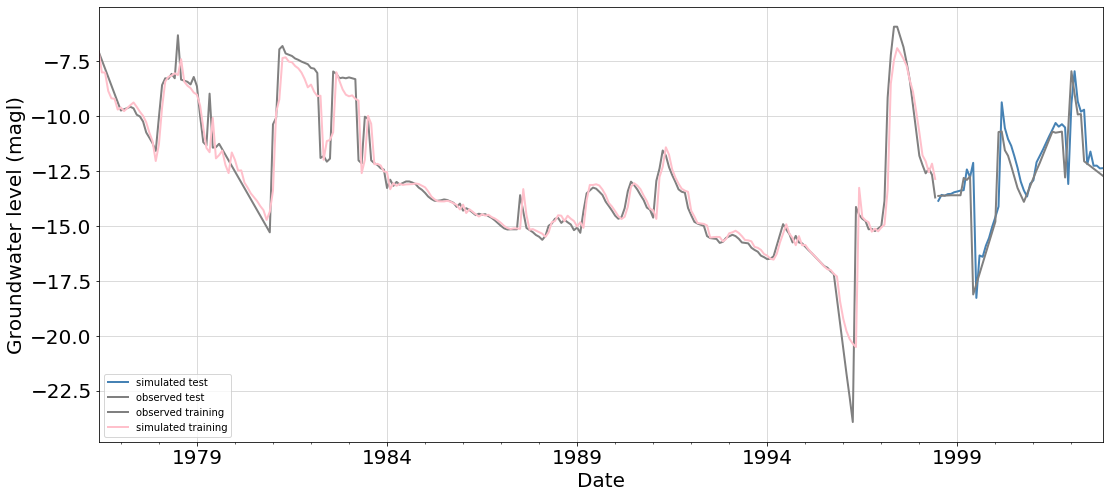

In [76]:
mse_ff  = summary['mse_ff'].mean(axis=0)
rmse_ff = summary['rmse_ff'].mean(axis=0)
mae_ff  = summary['mae_ff'].mean(axis=0)
r2_ff   = summary['r2_ff'].mean(axis=0)
stdv_ff = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))
print(round(stdv_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[265:318].index)
df1['observed test']      = pima.iloc[265:318, 0].values

df2 = pd.DataFrame(pima.iloc[0:265, 0].values, columns = ['observed training'],index =pima.iloc[0:265].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [77]:
y_ff = out_df['simulated test']

## Static Models

In [78]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0130']]

In [79]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0130'].values
y = y.reshape(-1,1)

In [80]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(265, 6) (265, 1)
(53, 6) (53, 1)


In [81]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [82]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(265, 6)
Running fold 2
(265, 6)
Running fold 3
(265, 6)
Running fold 4
(265, 6)
Running fold 5
(265, 6)
Running fold 6
(265, 6)
Running fold 7
(265, 6)
Running fold 8
(265, 6)
Running fold 9
(265, 6)
Running fold 10
(265, 6)


In [83]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   2.272    1.507  0.457   1.070
1   Iteration_2   2.364    1.537  0.435   1.057
2   Iteration_3   2.104    1.450  0.497   1.000
3   Iteration_4   2.466    1.570  0.411   1.129
4   Iteration_5   2.158    1.469  0.484   1.038
5   Iteration_6   2.358    1.536  0.436   1.104
6   Iteration_7   2.034    1.426  0.514   0.981
7   Iteration_8   2.589    1.609  0.381   1.077
8   Iteration_9   2.294    1.515  0.452   1.042
9  Iteration_10   3.172    1.781  0.242   1.149

In [84]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:265, 6].values

In [85]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[265:318, 6].values

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.431
Mean squared error is: 2.381
Root mean squared error is: 1.54
Mean absolute error is: 1.065


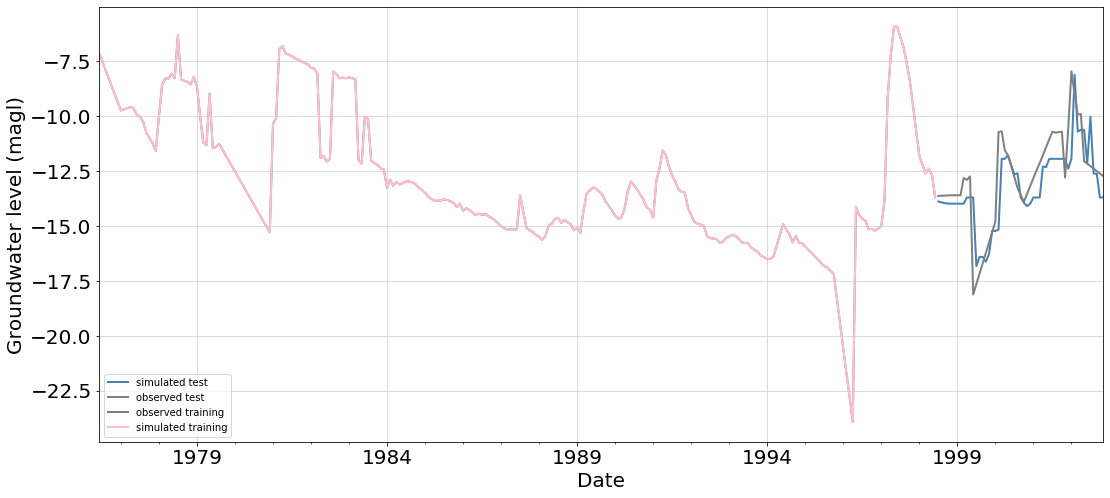

In [86]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[265:318].index)
df1['observed test']      = pima.iloc[265:318, 0].values

df2 = pd.DataFrame(pima.iloc[0:265, 0].values, columns = ['observed training'],index =pima.iloc[0:265].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [87]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(265, 6)
Running fold 2
(265, 6)
Running fold 3
(265, 6)
Running fold 4
(265, 6)
Running fold 5
(265, 6)
Running fold 6
(265, 6)
Running fold 7
(265, 6)
Running fold 8
(265, 6)
Running fold 9
(265, 6)
Running fold 10
(265, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [88]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1      1.8     1.342    0.57    0.736
1   Iteration_2      1.8     1.342    0.57    0.736
2   Iteration_3      1.8     1.342    0.57    0.736
3   Iteration_4      1.8     1.342    0.57    0.736
4   Iteration_5      1.8     1.342    0.57    0.736
5   Iteration_6      1.8     1.342    0.57    0.736
6   Iteration_7      1.8     1.342    0.57    0.736
7   Iteration_8      1.8     1.342    0.57    0.736
8   Iteration_9      1.8     1.342    0.57    0.736
9  Iteration_10      1.8     1.342    0.57    0.736

In [89]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:265, 6].values

In [90]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 1.682
Root mean squared error is: 1.297
Mean absolute error is: 0.518
R^2 score is:  0.826

The model performance for the test set
--------------------------------------
R^2 score is:  0.57
Mean squared error is: 1.8
Root mean squared error is: 1.342
Mean absolute error is: 0.736


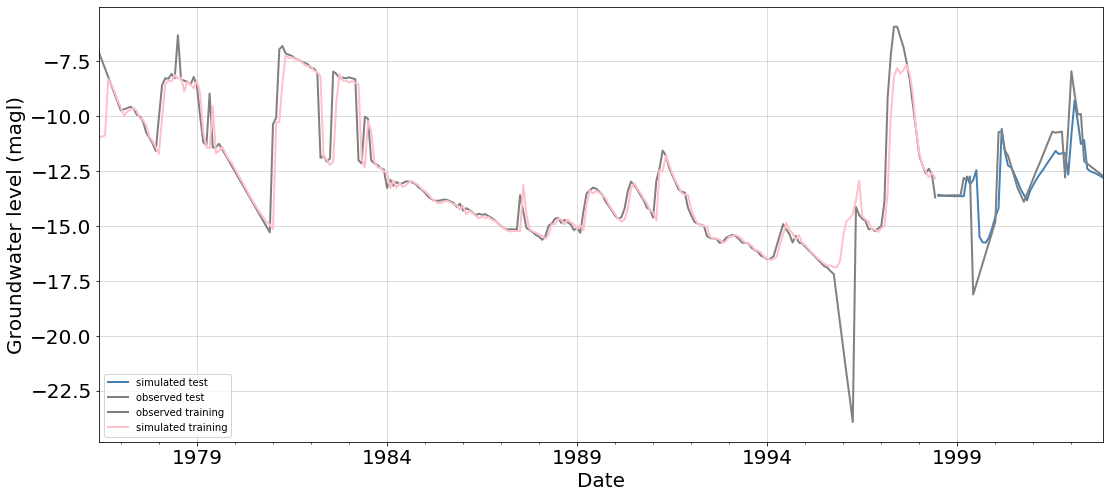

In [91]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[265:318].index)
df1['observed test']      = pima.iloc[265:318, 0].values

df2 = pd.DataFrame(pima.iloc[0:265, 0].values, columns = ['observed training'],index =pima.iloc[0:265].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(265, 6)
Running fold 2
(265, 6)
Running fold 3
(265, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 4
(265, 6)
Running fold 5
(265, 6)
Running fold 6
(265, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 7
(265, 6)
Running fold 8
(265, 6)
Running fold 9
(265, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 10
(265, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [93]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   1.555    1.247  0.628   0.808
1   Iteration_2   1.502    1.225  0.641   0.777
2   Iteration_3   1.521    1.233  0.636   0.770
3   Iteration_4   1.486    1.219  0.645   0.775
4   Iteration_5   1.639    1.280  0.608   0.825
5   Iteration_6   1.531    1.237  0.634   0.798
6   Iteration_7   1.506    1.227  0.640   0.780
7   Iteration_8   1.538    1.240  0.633   0.777
8   Iteration_9   1.528    1.236  0.635   0.777
9  Iteration_10   1.521    1.233  0.636   0.784

In [94]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:265, 6].values

In [95]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.075
Root mean squared error is: 0.273
Mean absolute error is: 0.177
R^2 score is:  0.992

The model performance for the test set
--------------------------------------
R^2 score is:  0.634
Mean squared error is: 1.533
Root mean squared error is: 1.238
Mean absolute error is: 0.787


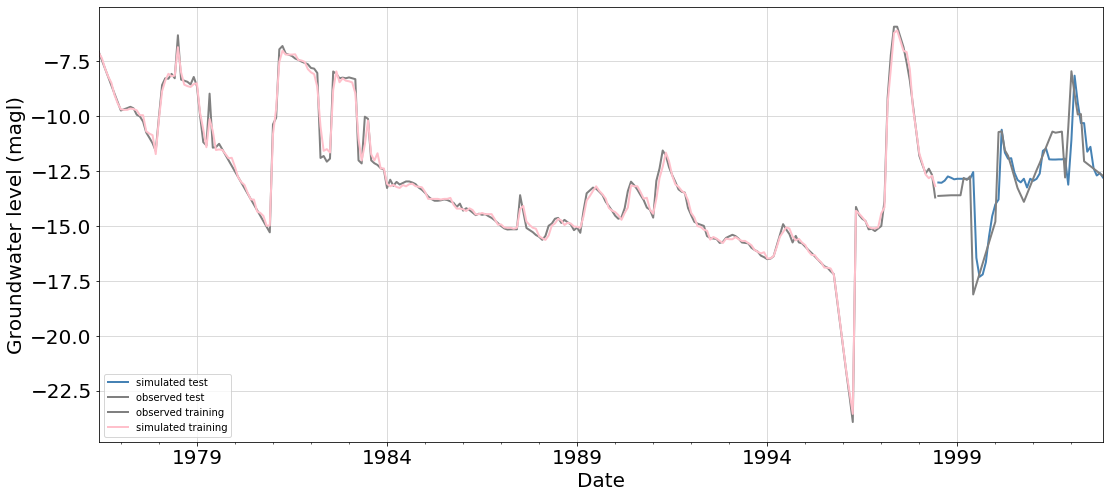

In [96]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[265:318].index)
df1['observed test']      = pima.iloc[265:318, 0].values

df2 = pd.DataFrame(pima.iloc[0:265, 0].values, columns = ['observed training'],index =pima.iloc[0:265].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(265, 6)
Running fold 2
(265, 6)
Running fold 3
(265, 6)
Running fold 4
(265, 6)
Running fold 5
(265, 6)
Running fold 6
(265, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 7
(265, 6)
Running fold 8
(265, 6)
Running fold 9
(265, 6)
Running fold 10
(265, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [98]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   1.695    1.302  0.595   0.871
1   Iteration_2   1.496    1.223  0.642   0.742
2   Iteration_3   1.918    1.385  0.542   0.854
3   Iteration_4   1.609    1.269  0.615   0.807
4   Iteration_5   2.188    1.479  0.477   0.947
5   Iteration_6   1.711    1.308  0.591   0.820
6   Iteration_7   1.457    1.207  0.652   0.795
7   Iteration_8   1.805    1.343  0.569   0.850
8   Iteration_9   1.761    1.327  0.579   0.864
9  Iteration_10   2.211    1.487  0.472   0.947

In [99]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:265, 6].values

In [100]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.075
Root mean squared error is: 0.273
Mean absolute error is: 0.177
R^2 score is:  0.992

The model performance for the test set
--------------------------------------
R^2 score is:  0.573
Mean squared error is: 1.785
Root mean squared error is: 1.333
Mean absolute error is: 0.85


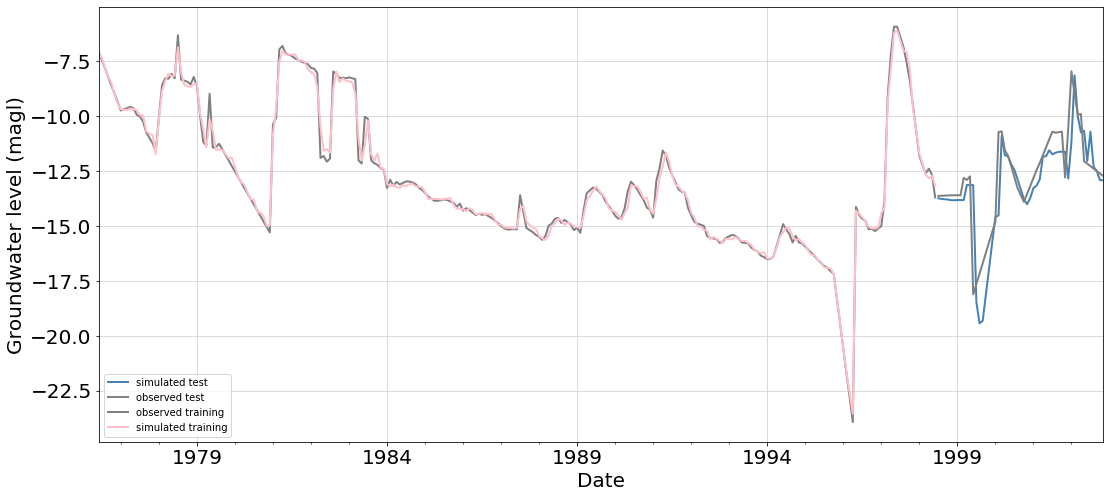

In [101]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[265:318].index)
df1['observed test']      = pima.iloc[265:318, 0].values

df2 = pd.DataFrame(pima.iloc[0:265, 0].values, columns = ['observed training'],index =pima.iloc[0:265].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=3)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=3)
out_df['observed training'].plot(color='grey', linewidth=3)
out_df['simulated training'].plot(color='pink', linewidth=3)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [102]:
vs = pd.DataFrame(pima.iloc[265:318, 0].values, columns = ['Observed'],index =pima.iloc[265:318].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru
vs['FFNN'] = y_ff

Text(0, 0.5, 'Groundwater levels (magl)')

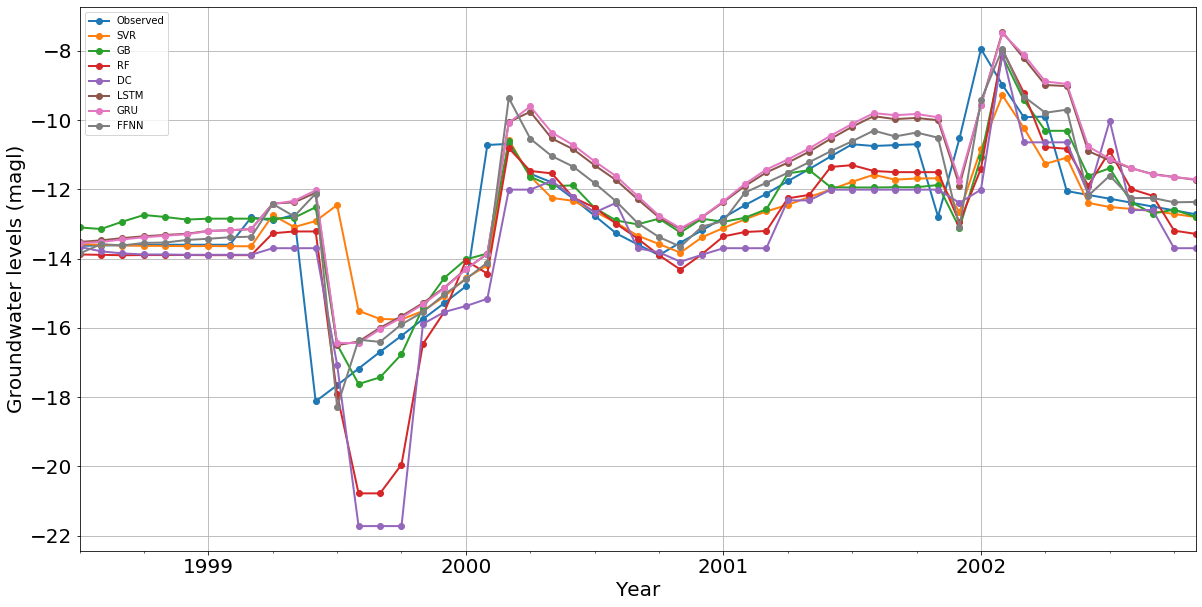

In [103]:
vs.plot(figsize=(20,10), linewidth=3, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)